<a href="https://colab.research.google.com/github/yadavanushka266/Women_Clothing-_Recommender_System/blob/main/Women_Clothing_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Women's Clothing Recommender System**

Women’s clothing represents a diverse and dynamic segment of the fashion industry, blending creativity, culture, and comfort. It encompasses a wide range of styles, fabrics, and designs that reflect individuality, cultural heritage, and evolving social trends. Over the years, women’s fashion has continuously adapted to changes in lifestyle, technology, and global influences, making it not only a means of personal expression but also a reflection of societal transformation.

**Introduction**

In this project, a Convolutional Neural Network (CNN) model is developed to classify images of women’s clothing into various categories based on visual features such as color, texture, and design patterns. The primary objective is to automate the recognition process, reducing manual effort in cataloging and enhancing fashion recommendation systems. By training the CNN on a diverse dataset of women’s apparel, the model learns to identify intricate patterns and fabric details, thereby contributing to smarter retail solutions and improved user experiences in the fashion industry.

**Techniques Used- CNN**

Convolutional Neural Networks (CNNs) are highly relevant for women’s clothing classification as they excel in automatically learning visual features from images. They can effectively identify intricate patterns, colors, textures, and shapes that distinguish different apparel categories. By capturing both low-level and high-level image details, CNNs eliminate the need for manual feature extraction and provide high accuracy in classifying diverse clothing types, making them ideal for fashion analysis and automated recognition tasks.

**Importing  Standard Libraries**

1.Random

2.Numpy

3.Tensorflow

4.Os

5.Json

6.Matplotlib

In [1]:
import random
random.seed(0)
import numpy as np
np.random.seed(0)

import tensorflow
tensorflow.random.set_seed(0)


In [ ]:
!pip install tensorflow

In [2]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing  import image
from tensorflow.keras.layers import MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input

**Loading The Kaggle.Json File**

In [4]:
kaggle_credentails = json.load(open("kaggle.json"))

In [5]:
os.environ['KAGGLE_USERNAME'] = kaggle_credentails['username']
os.environ['KAGGLE_KEY'] = kaggle_credentails['key']

**Loading The Kaggle.Json File**

In [6]:
!kaggle datasets download -d rizzsum/basic-pattern-women-clothing-dataset

Dataset URL: https://www.kaggle.com/datasets/rizzsum/basic-pattern-women-clothing-dataset
License(s): unknown
  0% 0.00/130M [00:00<?, ?B/s]
100% 130M/130M [00:00<00:00, 1.39GB/s]


**Taking a sneak peek into the Zipped Dataset**

In [7]:
!ls

basic-pattern-women-clothing-dataset.zip  kaggle.json  sample_data


**Unzipping the Dataset**

In [8]:
with ZipFile('basic-pattern-women-clothing-dataset.zip', 'r') as zip_ref:
   zip_ref.extractall()

**Viewing the contents of the dataset**

In [9]:
print(os.listdir('basicpattern_3800'))


['floral', 'check', 'polka dots', 'animal', 'heart', 'diamond', 'stripes', 'chevron', 'paisley', 'leaf']


In [10]:
print(len(os.listdir('basicpattern_3800/animal')))
print(os.listdir('basicpattern_3800/animal')[:5])

print(len(os.listdir('basicpattern_3800/check')))
print(os.listdir('basicpattern_3800/check')[:5])

print(len(os.listdir('basicpattern_3800/chevron')))
print(os.listdir('basicpattern_3800/chevron')[:5])

print(len(os.listdir('basicpattern_3800/diamond')))
print(os.listdir('basicpattern_3800/diamond')[:5])

print(len(os.listdir('basicpattern_3800/floral')))
print(os.listdir('basicpattern_3800/floral')[:5])

print(len(os.listdir('basicpattern_3800/heart')))
print(os.listdir('basicpattern_3800/heart')[:5])

print(len(os.listdir('basicpattern_3800/leaf')))
print(os.listdir('basicpattern_3800/leaf')[:5])

print(len(os.listdir('basicpattern_3800/paisley')))
print(os.listdir('basicpattern_3800/paisley')[:5])

print(len(os.listdir('basicpattern_3800/polka dots')))
print(os.listdir('basicpattern_3800/polka dots')[:5])

print(len(os.listdir('basicpattern_3800/stripes')))
print(os.listdir('basicpattern_3800/stripes')[:5])

380
['imgg_6.jpg', 'img_35.jpg', 'jmmg_28.jpg', 'jmmg_6.jpg', 'imgg_230.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['imgg_6.jpg', 'imgg_230.jpg', 'imgg_19.jpg', 'imgg_224.jpg', 'jmgg_15.jpg']
380
['img_153.jpg', 'imgg_6.jpg', 'img_35.jpg', 'img_163.jpg', 'imgg_19.jpg']


**Training the Model**

In [11]:
model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


**Printing the Summary of the Model**

In [12]:
model=tensorflow.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

None


**Preparing the image for prediction**

In [13]:
img=image.load_img('basicpattern_3800/animal/img_1.jpg',target_size=(224,224))

In [14]:
img_array=image.img_to_array(img)

In [15]:
expanded_img_array=np.expand_dims(img_array,axis=0)
print(expanded_img_array.shape)

(1, 224, 224, 3)


In [16]:
expanded_img_array

array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [254., 254., 254.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
       

In [17]:
preprocessed_img=preprocess_input(expanded_img_array)
print(preprocessed_img.shape)

(1, 224, 224, 3)


In [18]:
preprocessed_img

array([[[[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [150.061  , 137.22101, 130.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [150.061  , 137.22101, 130.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,
         [150.061  , 137.22101, 130.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ]],

        ...,

        [[151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         [151.061  , 138.22101, 131.32   ],
         ...,


In [19]:
model.predict(preprocessed_img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[ 0.8619839,  6.8815327,  0.       , ...,  2.432443 ,  0.0691396,
        14.021327 ]], dtype=float32)

In [20]:
model.predict(preprocessed_img).shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


(1, 2048)

**Prediction of Model and Conversion into 1D Vector by Flatten**

In [21]:
model.predict(preprocessed_img).flatten()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


array([ 0.8619839,  6.8815327,  0.       , ...,  2.432443 ,  0.0691396,
       14.021327 ], dtype=float32)

In [22]:
model.predict(preprocessed_img).flatten().shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


(2048,)

**Computation of the Euclidean Norm of the Vector**

In [25]:
from numpy.linalg import norm

In [23]:
np.sqrt(np.dot(model.predict(preprocessed_img).flatten(),model.predict(preprocessed_img).flatten()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 757ms/step


np.float32(271.6858)

In [26]:
norm(model.predict(preprocessed_img).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


np.float32(271.6858)

In [27]:
model.predict(preprocessed_img).flatten()/norm(model.predict(preprocessed_img).flatten())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


array([0.00317272, 0.02532901, 0.        , ..., 0.00895315, 0.00025448,
       0.05160861], dtype=float32)

**This function converts an input image into a fixed-size feature vector using a pre-trained CNN, which can then be used for image similarity, retrieval, or classification.**

In [28]:

def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    result = model.predict(preprocessed_img).flatten()
    normalized_result = result / norm(result)

    return normalized_result


In [29]:
filenames = []
data_dir = 'basicpattern_3800'

for subdir in os.listdir(data_dir):
    subdir_path = os.path.join(data_dir, subdir)
    if os.path.isdir(subdir_path):
        for file in os.listdir(subdir_path):
            filenames.append(os.path.join(subdir_path, file))

print(len(filenames))

3800


**Importing tqdm to show the progress for your loops**

In [30]:
 from tqdm import tqdm

In [32]:
feature_list=[]
for file in tqdm(filenames):
    feature_list.append(extract_features(file,model))
print(np.array(feature_list).shape)

  0%|          | 0/3800 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  0%|          | 1/3800 [00:00<17:26,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  0%|          | 2/3800 [00:00<17:04,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  0%|          | 3/3800 [00:00<19:55,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  0%|          | 4/3800 [00:01<21:07,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  0%|          | 5/3800 [00:01<21:51,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  0%|          | 6/3800 [00:01<19:37,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  0%|          | 7/3800 [00:02<18:36,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  0%|          | 8/3800 [00:02<17:57,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


  0%|          | 9/3800 [00:02<19:45,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  0%|          | 10/3800 [00:03<21:44,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  0%|          | 11/3800 [00:03<28:54,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


  0%|          | 12/3800 [00:04<33:43,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


  0%|          | 13/3800 [00:05<31:18,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  0%|          | 14/3800 [00:05<26:41,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  0%|          | 15/3800 [00:05<23:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  0%|          | 16/3800 [00:05<23:32,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  0%|          | 17/3800 [00:06<23:23,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  0%|          | 18/3800 [00:06<23:14,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  0%|          | 19/3800 [00:06<21:08,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  1%|          | 20/3800 [00:07<19:35,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  1%|          | 21/3800 [00:07<18:30,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  1%|          | 22/3800 [00:07<20:00,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  1%|          | 23/3800 [00:08<18:46,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|          | 24/3800 [00:08<17:50,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  1%|          | 25/3800 [00:08<19:26,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  1%|          | 26/3800 [00:09<20:45,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  1%|          | 27/3800 [00:09<21:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  1%|          | 28/3800 [00:09<19:54,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  1%|          | 29/3800 [00:10<21:04,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|          | 30/3800 [00:10<19:18,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  1%|          | 31/3800 [00:10<20:35,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  1%|          | 32/3800 [00:11<21:25,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|          | 33/3800 [00:11<19:37,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|          | 34/3800 [00:11<20:39,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  1%|          | 35/3800 [00:11<19:34,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  1%|          | 36/3800 [00:12<20:39,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  1%|          | 37/3800 [00:12<19:15,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  1%|          | 38/3800 [00:12<18:05,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|          | 39/3800 [00:13<19:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|          | 40/3800 [00:13<20:43,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|          | 41/3800 [00:13<19:22,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  1%|          | 42/3800 [00:14<18:20,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  1%|          | 43/3800 [00:14<17:31,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|          | 44/3800 [00:14<19:10,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


  1%|          | 45/3800 [00:15<20:21,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  1%|          | 46/3800 [00:15<22:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  1%|          | 47/3800 [00:15<22:58,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  1%|▏         | 48/3800 [00:16<29:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  1%|▏         | 49/3800 [00:17<33:58,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  1%|▏         | 50/3800 [00:17<30:34,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step


  1%|▏         | 51/3800 [00:17<25:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  1%|▏         | 52/3800 [00:18<22:59,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  1%|▏         | 53/3800 [00:18<20:40,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  1%|▏         | 54/3800 [00:18<21:18,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  1%|▏         | 55/3800 [00:18<19:38,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  1%|▏         | 56/3800 [00:19<20:36,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  2%|▏         | 57/3800 [00:19<19:15,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  2%|▏         | 58/3800 [00:19<18:14,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 59/3800 [00:20<17:54,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  2%|▏         | 60/3800 [00:20<17:22,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▏         | 61/3800 [00:20<19:01,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  2%|▏         | 62/3800 [00:21<18:13,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


  2%|▏         | 63/3800 [00:21<19:41,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  2%|▏         | 64/3800 [00:21<18:29,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  2%|▏         | 65/3800 [00:22<19:46,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  2%|▏         | 66/3800 [00:22<20:39,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  2%|▏         | 67/3800 [00:22<21:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  2%|▏         | 68/3800 [00:23<19:51,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  2%|▏         | 69/3800 [00:23<20:48,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  2%|▏         | 70/3800 [00:23<21:27,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  2%|▏         | 71/3800 [00:24<21:52,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  2%|▏         | 72/3800 [00:24<20:11,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  2%|▏         | 73/3800 [00:24<21:01,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  2%|▏         | 74/3800 [00:25<19:10,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  2%|▏         | 75/3800 [00:25<17:58,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  2%|▏         | 76/3800 [00:25<17:24,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  2%|▏         | 77/3800 [00:25<16:42,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  2%|▏         | 78/3800 [00:26<16:13,  3.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  2%|▏         | 79/3800 [00:26<16:02,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  2%|▏         | 80/3800 [00:26<16:15,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  2%|▏         | 81/3800 [00:26<16:03,  3.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  2%|▏         | 82/3800 [00:27<15:53,  3.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  2%|▏         | 83/3800 [00:27<17:17,  3.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  2%|▏         | 84/3800 [00:27<20:00,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


  2%|▏         | 85/3800 [00:28<21:34,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  2%|▏         | 86/3800 [00:28<22:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


  2%|▏         | 87/3800 [00:29<23:24,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  2%|▏         | 88/3800 [00:29<23:39,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step


  2%|▏         | 89/3800 [00:29<23:43,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  2%|▏         | 90/3800 [00:30<23:16,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  2%|▏         | 91/3800 [00:30<21:36,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  2%|▏         | 92/3800 [00:30<20:15,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  2%|▏         | 93/3800 [00:30<18:56,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  2%|▏         | 94/3800 [00:31<20:04,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  2%|▎         | 95/3800 [00:31<18:54,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  3%|▎         | 96/3800 [00:31<18:22,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 97/3800 [00:32<17:25,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|▎         | 98/3800 [00:32<16:46,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 99/3800 [00:32<18:32,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 100/3800 [00:33<19:53,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  3%|▎         | 101/3800 [00:33<20:45,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  3%|▎         | 102/3800 [00:33<19:11,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  3%|▎         | 103/3800 [00:34<18:26,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  3%|▎         | 104/3800 [00:34<17:34,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 105/3800 [00:34<16:59,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  3%|▎         | 106/3800 [00:34<16:33,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  3%|▎         | 107/3800 [00:35<16:35,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  3%|▎         | 108/3800 [00:35<16:25,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 109/3800 [00:35<16:09,  3.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 110/3800 [00:35<18:12,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 111/3800 [00:36<17:18,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|▎         | 112/3800 [00:36<18:55,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  3%|▎         | 113/3800 [00:36<19:58,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  3%|▎         | 114/3800 [00:37<18:32,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  3%|▎         | 115/3800 [00:37<19:57,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  3%|▎         | 116/3800 [00:37<18:42,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  3%|▎         | 117/3800 [00:38<19:57,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  3%|▎         | 118/3800 [00:38<20:51,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  3%|▎         | 119/3800 [00:38<19:24,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  3%|▎         | 120/3800 [00:39<18:33,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  3%|▎         | 121/3800 [00:39<19:53,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  3%|▎         | 122/3800 [00:39<18:34,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  3%|▎         | 123/3800 [00:40<20:13,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


  3%|▎         | 124/3800 [00:40<27:23,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  3%|▎         | 125/3800 [00:41<26:55,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


  3%|▎         | 126/3800 [00:41<26:05,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  3%|▎         | 127/3800 [00:42<32:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  3%|▎         | 128/3800 [00:42<29:20,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  3%|▎         | 129/3800 [00:43<25:06,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  3%|▎         | 130/3800 [00:43<22:27,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  3%|▎         | 131/3800 [00:43<22:28,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  3%|▎         | 132/3800 [00:43<20:22,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▎         | 133/3800 [00:44<21:04,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|▎         | 134/3800 [00:44<19:17,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|▎         | 135/3800 [00:44<20:12,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  4%|▎         | 136/3800 [00:45<18:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  4%|▎         | 137/3800 [00:45<20:06,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  4%|▎         | 138/3800 [00:45<18:43,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  4%|▎         | 139/3800 [00:46<17:38,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


  4%|▎         | 140/3800 [00:46<19:11,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  4%|▎         | 141/3800 [00:46<18:07,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▎         | 142/3800 [00:46<17:13,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  4%|▍         | 143/3800 [00:47<18:46,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 144/3800 [00:47<17:53,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 145/3800 [00:47<19:12,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|▍         | 146/3800 [00:48<17:52,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  4%|▍         | 147/3800 [00:48<17:22,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  4%|▍         | 148/3800 [00:48<18:49,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  4%|▍         | 149/3800 [00:49<19:56,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  4%|▍         | 150/3800 [00:49<18:46,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  4%|▍         | 151/3800 [00:49<17:56,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  4%|▍         | 152/3800 [00:50<19:19,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  4%|▍         | 153/3800 [00:50<20:20,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  4%|▍         | 154/3800 [00:50<18:53,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  4%|▍         | 155/3800 [00:50<17:55,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  4%|▍         | 156/3800 [00:51<19:14,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  4%|▍         | 157/3800 [00:51<18:19,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  4%|▍         | 158/3800 [00:51<19:30,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


  4%|▍         | 159/3800 [00:52<20:18,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


  4%|▍         | 160/3800 [00:52<27:12,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  4%|▍         | 161/3800 [00:53<31:56,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  4%|▍         | 162/3800 [00:54<29:28,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


  4%|▍         | 163/3800 [00:54<27:01,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  4%|▍         | 164/3800 [00:54<25:40,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  4%|▍         | 165/3800 [00:55<22:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  4%|▍         | 166/3800 [00:55<22:32,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  4%|▍         | 167/3800 [00:55<20:45,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  4%|▍         | 168/3800 [00:55<19:10,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  4%|▍         | 169/3800 [00:56<20:09,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  4%|▍         | 170/3800 [00:56<18:53,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  4%|▍         | 171/3800 [00:56<20:04,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▍         | 172/3800 [00:57<18:33,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  5%|▍         | 173/3800 [00:57<17:19,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  5%|▍         | 174/3800 [00:57<16:48,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  5%|▍         | 175/3800 [00:57<16:28,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  5%|▍         | 176/3800 [00:58<18:13,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▍         | 177/3800 [00:58<19:29,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▍         | 178/3800 [00:58<18:16,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  5%|▍         | 179/3800 [00:59<19:28,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▍         | 180/3800 [00:59<20:16,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  5%|▍         | 181/3800 [00:59<18:58,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▍         | 182/3800 [01:00<17:50,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|▍         | 183/3800 [01:00<19:07,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  5%|▍         | 184/3800 [01:00<19:57,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|▍         | 185/3800 [01:01<18:30,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|▍         | 186/3800 [01:01<17:26,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  5%|▍         | 187/3800 [01:01<19:00,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  5%|▍         | 188/3800 [01:02<18:07,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  5%|▍         | 189/3800 [01:02<17:19,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  5%|▌         | 190/3800 [01:02<18:47,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  5%|▌         | 191/3800 [01:03<18:02,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  5%|▌         | 192/3800 [01:03<17:08,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|▌         | 193/3800 [01:03<18:43,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


  5%|▌         | 194/3800 [01:04<19:44,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  5%|▌         | 195/3800 [01:04<20:24,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  5%|▌         | 196/3800 [01:04<21:56,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  5%|▌         | 197/3800 [01:05<22:58,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  5%|▌         | 198/3800 [01:05<28:49,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


  5%|▌         | 199/3800 [01:06<33:32,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  5%|▌         | 200/3800 [01:06<28:05,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


  5%|▌         | 201/3800 [01:07<26:25,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  5%|▌         | 202/3800 [01:07<25:13,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  5%|▌         | 203/3800 [01:08<24:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  5%|▌         | 204/3800 [01:08<21:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  5%|▌         | 205/3800 [01:08<19:42,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  5%|▌         | 206/3800 [01:08<20:29,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  5%|▌         | 207/3800 [01:09<20:55,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  5%|▌         | 208/3800 [01:09<21:15,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  6%|▌         | 209/3800 [01:09<19:26,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|▌         | 210/3800 [01:10<20:11,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 211/3800 [01:10<20:49,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  6%|▌         | 212/3800 [01:11<21:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  6%|▌         | 213/3800 [01:11<19:49,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  6%|▌         | 214/3800 [01:11<18:32,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  6%|▌         | 215/3800 [01:11<17:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  6%|▌         | 216/3800 [01:12<19:07,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  6%|▌         | 217/3800 [01:12<20:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  6%|▌         | 218/3800 [01:12<20:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  6%|▌         | 219/3800 [01:13<18:58,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


  6%|▌         | 220/3800 [01:13<19:53,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|▌         | 221/3800 [01:13<20:25,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 222/3800 [01:14<18:44,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 223/3800 [01:14<19:51,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  6%|▌         | 224/3800 [01:14<18:30,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 225/3800 [01:15<17:23,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  6%|▌         | 226/3800 [01:15<18:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  6%|▌         | 227/3800 [01:15<17:37,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  6%|▌         | 228/3800 [01:15<16:46,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  6%|▌         | 229/3800 [01:16<18:24,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  6%|▌         | 230/3800 [01:16<17:40,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


  6%|▌         | 231/3800 [01:16<18:51,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  6%|▌         | 232/3800 [01:17<20:45,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


  6%|▌         | 233/3800 [01:17<22:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


  6%|▌         | 234/3800 [01:18<22:48,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


  6%|▌         | 235/3800 [01:18<23:34,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  6%|▌         | 236/3800 [01:19<24:00,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


  6%|▌         | 237/3800 [01:19<24:02,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


  6%|▋         | 238/3800 [01:19<23:25,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  6%|▋         | 239/3800 [01:20<23:05,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  6%|▋         | 240/3800 [01:20<20:33,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  6%|▋         | 241/3800 [01:20<19:05,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  6%|▋         | 242/3800 [01:20<17:50,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  6%|▋         | 243/3800 [01:21<16:51,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  6%|▋         | 244/3800 [01:21<16:09,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  6%|▋         | 245/3800 [01:21<15:55,  3.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


  6%|▋         | 246/3800 [01:22<17:42,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  6%|▋         | 247/3800 [01:22<17:05,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  7%|▋         | 248/3800 [01:22<16:30,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


  7%|▋         | 249/3800 [01:22<16:29,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  7%|▋         | 250/3800 [01:23<18:09,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  7%|▋         | 251/3800 [01:23<19:20,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  7%|▋         | 252/3800 [01:24<20:03,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  7%|▋         | 253/3800 [01:24<18:28,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  7%|▋         | 254/3800 [01:24<17:21,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  7%|▋         | 255/3800 [01:24<16:32,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  7%|▋         | 256/3800 [01:25<18:24,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  7%|▋         | 257/3800 [01:25<19:20,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  7%|▋         | 258/3800 [01:25<17:55,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  7%|▋         | 259/3800 [01:26<19:26,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  7%|▋         | 260/3800 [01:26<18:11,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


  7%|▋         | 261/3800 [01:26<19:17,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


  7%|▋         | 262/3800 [01:27<19:59,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


  7%|▋         | 263/3800 [01:27<20:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  7%|▋         | 264/3800 [01:27<18:51,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


  7%|▋         | 265/3800 [01:28<19:44,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  7%|▋         | 266/3800 [01:28<18:16,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  7%|▋         | 267/3800 [01:28<17:13,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  7%|▋         | 268/3800 [01:29<18:33,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  7%|▋         | 269/3800 [01:29<17:19,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


  7%|▋         | 270/3800 [01:29<18:59,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


  7%|▋         | 271/3800 [01:30<20:39,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


  7%|▋         | 272/3800 [01:30<26:59,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


  7%|▋         | 273/3800 [01:31<26:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


  7%|▋         | 274/3800 [01:31<25:27,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


  7%|▋         | 275/3800 [01:31<24:07,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


  7%|▋         | 276/3800 [01:32<21:42,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  7%|▋         | 277/3800 [01:32<21:42,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


  7%|▋         | 278/3800 [01:32<21:40,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


  7%|▋         | 279/3800 [01:33<21:36,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  7%|▋         | 280/3800 [01:33<21:36,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  7%|▋         | 281/3800 [01:34<21:34,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  7%|▋         | 282/3800 [01:34<19:47,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  7%|▋         | 283/3800 [01:34<20:28,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  7%|▋         | 284/3800 [01:34<18:55,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  8%|▊         | 285/3800 [01:35<19:48,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  8%|▊         | 286/3800 [01:35<20:22,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  8%|▊         | 287/3800 [01:35<18:43,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  8%|▊         | 288/3800 [01:36<17:44,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


  8%|▊         | 289/3800 [01:36<17:13,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|▊         | 290/3800 [01:36<16:22,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  8%|▊         | 291/3800 [01:37<18:00,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  8%|▊         | 292/3800 [01:37<17:21,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  8%|▊         | 293/3800 [01:37<18:34,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|▊         | 294/3800 [01:38<17:20,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 295/3800 [01:38<16:37,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


  8%|▊         | 296/3800 [01:38<18:12,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|▊         | 297/3800 [01:38<17:11,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  8%|▊         | 298/3800 [01:39<16:31,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|▊         | 299/3800 [01:39<15:58,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|▊         | 300/3800 [01:39<15:48,  3.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 301/3800 [01:39<15:32,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


  8%|▊         | 302/3800 [01:40<15:11,  3.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  8%|▊         | 303/3800 [01:40<17:04,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 304/3800 [01:40<16:21,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|▊         | 305/3800 [01:41<15:53,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  8%|▊         | 306/3800 [01:41<15:24,  3.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  8%|▊         | 307/3800 [01:41<15:42,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  8%|▊         | 308/3800 [01:41<17:35,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  8%|▊         | 309/3800 [01:42<19:42,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  8%|▊         | 310/3800 [01:42<21:31,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


  8%|▊         | 311/3800 [01:43<22:33,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


  8%|▊         | 312/3800 [01:43<23:16,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


  8%|▊         | 313/3800 [01:44<23:32,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step


  8%|▊         | 314/3800 [01:44<23:26,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


  8%|▊         | 315/3800 [01:44<21:01,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step


  8%|▊         | 316/3800 [01:45<18:59,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|▊         | 317/3800 [01:45<19:41,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


  8%|▊         | 318/3800 [01:45<18:09,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  8%|▊         | 319/3800 [01:45<17:32,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 320/3800 [01:46<16:40,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  8%|▊         | 321/3800 [01:46<18:10,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


  8%|▊         | 322/3800 [01:46<19:12,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  8%|▊         | 323/3800 [01:47<19:52,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


  9%|▊         | 324/3800 [01:47<20:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


  9%|▊         | 325/3800 [01:47<19:07,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  9%|▊         | 326/3800 [01:48<17:49,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|▊         | 327/3800 [01:48<16:54,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


  9%|▊         | 328/3800 [01:48<18:10,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▊         | 329/3800 [01:49<19:06,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|▊         | 330/3800 [01:49<17:41,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|▊         | 331/3800 [01:49<16:58,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


  9%|▊         | 332/3800 [01:50<18:22,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


  9%|▉         | 333/3800 [01:50<19:19,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|▉         | 334/3800 [01:50<19:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


  9%|▉         | 335/3800 [01:51<20:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


  9%|▉         | 336/3800 [01:51<20:38,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|▉         | 337/3800 [01:51<20:57,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  9%|▉         | 338/3800 [01:52<19:19,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  9%|▉         | 339/3800 [01:52<19:58,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  9%|▉         | 340/3800 [01:52<18:20,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


  9%|▉         | 341/3800 [01:53<19:11,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


  9%|▉         | 342/3800 [01:53<19:48,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  9%|▉         | 343/3800 [01:53<20:21,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


  9%|▉         | 344/3800 [01:54<20:44,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


  9%|▉         | 345/3800 [01:54<20:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


  9%|▉         | 346/3800 [01:55<26:40,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


  9%|▉         | 347/3800 [01:56<31:11,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


  9%|▉         | 348/3800 [01:56<34:33,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


  9%|▉         | 349/3800 [01:57<28:36,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▉         | 350/3800 [01:57<26:23,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|▉         | 351/3800 [01:57<24:44,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|▉         | 352/3800 [01:58<21:34,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


  9%|▉         | 353/3800 [01:58<21:32,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


  9%|▉         | 354/3800 [01:58<21:19,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


  9%|▉         | 355/3800 [01:59<19:16,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


  9%|▉         | 356/3800 [01:59<19:55,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


  9%|▉         | 357/3800 [01:59<18:28,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


  9%|▉         | 358/3800 [02:00<19:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


  9%|▉         | 359/3800 [02:00<17:58,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


  9%|▉         | 360/3800 [02:00<17:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 10%|▉         | 361/3800 [02:00<16:29,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 10%|▉         | 362/3800 [02:01<16:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 10%|▉         | 363/3800 [02:01<15:47,  3.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|▉         | 364/3800 [02:01<15:37,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|▉         | 365/3800 [02:02<17:13,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|▉         | 366/3800 [02:02<18:23,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 10%|▉         | 367/3800 [02:02<19:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 10%|▉         | 368/3800 [02:03<20:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 10%|▉         | 369/3800 [02:03<20:26,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 10%|▉         | 370/3800 [02:03<20:39,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|▉         | 371/3800 [02:04<20:46,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 10%|▉         | 372/3800 [02:04<19:08,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 10%|▉         | 373/3800 [02:04<19:49,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|▉         | 374/3800 [02:05<18:10,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 10%|▉         | 375/3800 [02:05<17:07,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 10%|▉         | 376/3800 [02:05<18:24,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 10%|▉         | 377/3800 [02:06<19:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|▉         | 378/3800 [02:06<19:47,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 10%|▉         | 379/3800 [02:07<26:01,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 10%|█         | 380/3800 [02:07<25:32,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 10%|█         | 381/3800 [02:08<25:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 10%|█         | 382/3800 [02:08<24:54,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 10%|█         | 383/3800 [02:09<29:50,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 10%|█         | 384/3800 [02:09<25:14,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 10%|█         | 385/3800 [02:09<22:13,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|█         | 386/3800 [02:10<21:52,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 10%|█         | 387/3800 [02:10<19:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 10%|█         | 388/3800 [02:10<18:09,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 10%|█         | 389/3800 [02:11<18:57,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 10%|█         | 390/3800 [02:11<19:27,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 10%|█         | 391/3800 [02:11<19:59,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 10%|█         | 392/3800 [02:12<18:30,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 10%|█         | 393/3800 [02:12<19:16,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 10%|█         | 394/3800 [02:12<17:52,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 10%|█         | 395/3800 [02:13<18:46,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 10%|█         | 396/3800 [02:13<19:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 10%|█         | 397/3800 [02:13<19:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 10%|█         | 398/3800 [02:14<20:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 10%|█         | 399/3800 [02:14<18:25,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 11%|█         | 400/3800 [02:14<17:16,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|█         | 401/3800 [02:14<18:26,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 402/3800 [02:15<19:04,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 403/3800 [02:15<19:45,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 11%|█         | 404/3800 [02:16<20:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|█         | 405/3800 [02:16<20:20,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|█         | 406/3800 [02:16<20:36,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 11%|█         | 407/3800 [02:17<18:58,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 408/3800 [02:17<19:32,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|█         | 409/3800 [02:17<17:57,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|█         | 410/3800 [02:17<16:46,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 11%|█         | 411/3800 [02:18<18:17,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 11%|█         | 412/3800 [02:18<19:03,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 11%|█         | 413/3800 [02:19<19:32,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 11%|█         | 414/3800 [02:19<20:39,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 11%|█         | 415/3800 [02:19<21:42,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 11%|█         | 416/3800 [02:20<27:31,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step


 11%|█         | 417/3800 [02:21<26:24,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


 11%|█         | 418/3800 [02:21<24:38,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|█         | 419/3800 [02:21<23:33,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 11%|█         | 420/3800 [02:22<22:45,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 421/3800 [02:22<20:37,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|█         | 422/3800 [02:22<18:52,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 11%|█         | 423/3800 [02:23<19:32,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 11%|█         | 424/3800 [02:23<19:53,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█         | 425/3800 [02:23<18:15,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 11%|█         | 426/3800 [02:24<17:04,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 11%|█         | 427/3800 [02:24<18:18,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 11%|█▏        | 428/3800 [02:24<19:05,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|█▏        | 429/3800 [02:25<19:39,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 11%|█▏        | 430/3800 [02:25<20:02,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|█▏        | 431/3800 [02:25<18:21,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 11%|█▏        | 432/3800 [02:26<17:12,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 11%|█▏        | 433/3800 [02:26<16:20,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 11%|█▏        | 434/3800 [02:26<17:40,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 11%|█▏        | 435/3800 [02:27<18:32,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 11%|█▏        | 436/3800 [02:27<19:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 12%|█▏        | 437/3800 [02:27<17:47,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 12%|█▏        | 438/3800 [02:28<18:38,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|█▏        | 439/3800 [02:28<19:20,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 12%|█▏        | 440/3800 [02:28<18:04,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 12%|█▏        | 441/3800 [02:28<17:01,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|█▏        | 442/3800 [02:29<16:13,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 12%|█▏        | 443/3800 [02:29<15:40,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 12%|█▏        | 444/3800 [02:29<15:32,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 12%|█▏        | 445/3800 [02:30<17:10,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|█▏        | 446/3800 [02:30<18:08,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 12%|█▏        | 447/3800 [02:30<17:11,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 12%|█▏        | 448/3800 [02:31<18:09,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 12%|█▏        | 449/3800 [02:31<17:19,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 12%|█▏        | 450/3800 [02:31<18:54,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 12%|█▏        | 451/3800 [02:32<20:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 12%|█▏        | 452/3800 [02:32<26:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 12%|█▏        | 453/3800 [02:33<31:04,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 12%|█▏        | 454/3800 [02:34<28:15,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 12%|█▏        | 455/3800 [02:34<24:08,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|█▏        | 456/3800 [02:34<21:22,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 12%|█▏        | 457/3800 [02:34<21:13,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 12%|█▏        | 458/3800 [02:35<19:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|█▏        | 459/3800 [02:35<19:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 12%|█▏        | 460/3800 [02:35<18:14,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|█▏        | 461/3800 [02:36<17:02,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 12%|█▏        | 462/3800 [02:36<18:05,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 12%|█▏        | 463/3800 [02:36<17:04,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 12%|█▏        | 464/3800 [02:37<16:29,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 12%|█▏        | 465/3800 [02:37<15:58,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 12%|█▏        | 466/3800 [02:37<17:24,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 12%|█▏        | 467/3800 [02:37<16:46,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 12%|█▏        | 468/3800 [02:38<16:03,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 12%|█▏        | 469/3800 [02:38<17:26,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|█▏        | 470/3800 [02:38<16:20,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 12%|█▏        | 471/3800 [02:39<17:53,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 12%|█▏        | 472/3800 [02:39<18:38,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 12%|█▏        | 473/3800 [02:39<19:09,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 12%|█▏        | 474/3800 [02:40<19:32,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 12%|█▎        | 475/3800 [02:40<18:09,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█▎        | 476/3800 [02:40<18:54,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█▎        | 477/3800 [02:41<19:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 13%|█▎        | 478/3800 [02:41<19:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 479/3800 [02:42<19:59,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|█▎        | 480/3800 [02:42<18:11,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 13%|█▎        | 481/3800 [02:42<16:57,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 13%|█▎        | 482/3800 [02:42<16:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 13%|█▎        | 483/3800 [02:43<15:41,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 13%|█▎        | 484/3800 [02:43<17:03,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 13%|█▎        | 485/3800 [02:43<18:04,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 13%|█▎        | 486/3800 [02:44<19:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 13%|█▎        | 487/3800 [02:44<25:20,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 13%|█▎        | 488/3800 [02:45<24:39,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 13%|█▎        | 489/3800 [02:46<29:26,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 13%|█▎        | 490/3800 [02:46<25:13,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 13%|█▎        | 491/3800 [02:46<22:02,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█▎        | 492/3800 [02:46<19:48,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 13%|█▎        | 493/3800 [02:47<20:05,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 13%|█▎        | 494/3800 [02:47<18:16,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█▎        | 495/3800 [02:47<17:05,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 13%|█▎        | 496/3800 [02:48<16:15,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 13%|█▎        | 497/3800 [02:48<15:52,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 13%|█▎        | 498/3800 [02:48<17:14,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 13%|█▎        | 499/3800 [02:49<18:18,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 13%|█▎        | 500/3800 [02:49<17:23,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 501/3800 [02:49<18:28,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 502/3800 [02:50<17:18,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 503/3800 [02:50<18:15,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 13%|█▎        | 504/3800 [02:50<17:05,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 13%|█▎        | 505/3800 [02:51<18:11,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 13%|█▎        | 506/3800 [02:51<16:55,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 13%|█▎        | 507/3800 [02:51<17:58,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 13%|█▎        | 508/3800 [02:51<16:48,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 13%|█▎        | 509/3800 [02:52<16:05,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 13%|█▎        | 510/3800 [02:52<15:33,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 13%|█▎        | 511/3800 [02:52<15:20,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 13%|█▎        | 512/3800 [02:52<15:02,  3.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 14%|█▎        | 513/3800 [02:53<16:39,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 14%|█▎        | 514/3800 [02:53<16:08,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█▎        | 515/3800 [02:53<15:30,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█▎        | 516/3800 [02:54<16:57,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 14%|█▎        | 517/3800 [02:54<17:53,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 14%|█▎        | 518/3800 [02:54<18:34,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 14%|█▎        | 519/3800 [02:55<17:12,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 14%|█▎        | 520/3800 [02:55<18:08,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 14%|█▎        | 521/3800 [02:55<18:41,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 14%|█▎        | 522/3800 [02:56<19:45,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 14%|█▍        | 523/3800 [02:56<20:51,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 14%|█▍        | 524/3800 [02:57<26:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 14%|█▍        | 525/3800 [02:57<26:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 14%|█▍        | 526/3800 [02:58<25:14,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 14%|█▍        | 527/3800 [02:58<22:33,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 14%|█▍        | 528/3800 [02:59<21:55,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 14%|█▍        | 529/3800 [02:59<21:24,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 14%|█▍        | 530/3800 [02:59<19:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 14%|█▍        | 531/3800 [02:59<17:48,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 14%|█▍        | 532/3800 [03:00<16:41,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


 14%|█▍        | 533/3800 [03:00<15:42,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 14%|█▍        | 534/3800 [03:00<17:06,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 14%|█▍        | 535/3800 [03:01<18:06,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 14%|█▍        | 536/3800 [03:01<17:15,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 14%|█▍        | 537/3800 [03:01<16:41,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 14%|█▍        | 538/3800 [03:02<15:58,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 14%|█▍        | 539/3800 [03:02<15:28,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 14%|█▍        | 540/3800 [03:02<15:12,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 14%|█▍        | 541/3800 [03:02<15:06,  3.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 14%|█▍        | 542/3800 [03:03<14:45,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 14%|█▍        | 543/3800 [03:03<16:23,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 14%|█▍        | 544/3800 [03:03<15:39,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 14%|█▍        | 545/3800 [03:04<17:00,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 14%|█▍        | 546/3800 [03:04<15:54,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 14%|█▍        | 547/3800 [03:04<15:39,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 14%|█▍        | 548/3800 [03:04<15:33,  3.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 14%|█▍        | 549/3800 [03:05<15:15,  3.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 14%|█▍        | 550/3800 [03:05<16:50,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 14%|█▍        | 551/3800 [03:05<17:46,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 15%|█▍        | 552/3800 [03:06<16:36,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 15%|█▍        | 553/3800 [03:06<15:51,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 15%|█▍        | 554/3800 [03:06<17:11,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 15%|█▍        | 555/3800 [03:07<17:59,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█▍        | 556/3800 [03:07<16:39,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 15%|█▍        | 557/3800 [03:07<15:46,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 15%|█▍        | 558/3800 [03:08<17:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 15%|█▍        | 559/3800 [03:08<16:05,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 15%|█▍        | 560/3800 [03:08<17:12,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 15%|█▍        | 561/3800 [03:09<23:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 15%|█▍        | 562/3800 [03:09<23:19,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 15%|█▍        | 563/3800 [03:10<23:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 15%|█▍        | 564/3800 [03:11<27:49,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 15%|█▍        | 565/3800 [03:11<25:29,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 15%|█▍        | 566/3800 [03:11<23:49,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 15%|█▍        | 567/3800 [03:12<22:37,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 15%|█▍        | 568/3800 [03:12<20:11,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█▍        | 569/3800 [03:12<18:13,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step


 15%|█▌        | 570/3800 [03:12<16:47,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 15%|█▌        | 571/3800 [03:13<16:09,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 15%|█▌        | 572/3800 [03:13<17:31,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 15%|█▌        | 573/3800 [03:13<18:17,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█▌        | 574/3800 [03:14<18:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 15%|█▌        | 575/3800 [03:14<19:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 15%|█▌        | 576/3800 [03:15<19:21,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 15%|█▌        | 577/3800 [03:15<17:55,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 15%|█▌        | 578/3800 [03:15<18:30,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 15%|█▌        | 579/3800 [03:16<18:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 15%|█▌        | 580/3800 [03:16<17:11,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 15%|█▌        | 581/3800 [03:16<16:15,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 15%|█▌        | 582/3800 [03:16<17:20,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 15%|█▌        | 583/3800 [03:17<16:22,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 15%|█▌        | 584/3800 [03:17<17:31,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 15%|█▌        | 585/3800 [03:17<16:25,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 15%|█▌        | 586/3800 [03:18<17:32,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 15%|█▌        | 587/3800 [03:18<18:14,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 15%|█▌        | 588/3800 [03:18<16:52,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 16%|█▌        | 589/3800 [03:19<16:00,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 16%|█▌        | 590/3800 [03:19<15:25,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 16%|█▌        | 591/3800 [03:19<16:44,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 16%|█▌        | 592/3800 [03:20<17:41,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 16%|█▌        | 593/3800 [03:20<18:15,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 16%|█▌        | 594/3800 [03:20<18:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 16%|█▌        | 595/3800 [03:21<20:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 16%|█▌        | 596/3800 [03:21<21:03,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 16%|█▌        | 597/3800 [03:22<26:37,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 16%|█▌        | 598/3800 [03:22<25:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 16%|█▌        | 599/3800 [03:23<29:43,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 16%|█▌        | 600/3800 [03:23<25:16,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 16%|█▌        | 601/3800 [03:24<23:38,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 16%|█▌        | 602/3800 [03:24<22:26,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 16%|█▌        | 603/3800 [03:24<20:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 16%|█▌        | 604/3800 [03:25<18:03,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 16%|█▌        | 605/3800 [03:25<16:40,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 16%|█▌        | 606/3800 [03:25<15:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 16%|█▌        | 607/3800 [03:25<15:30,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 16%|█▌        | 608/3800 [03:26<16:49,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 16%|█▌        | 609/3800 [03:26<17:40,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 16%|█▌        | 610/3800 [03:27<18:24,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 16%|█▌        | 611/3800 [03:27<18:51,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 16%|█▌        | 612/3800 [03:27<17:15,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 16%|█▌        | 613/3800 [03:28<18:03,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 16%|█▌        | 614/3800 [03:28<16:41,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 16%|█▌        | 615/3800 [03:28<17:34,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 16%|█▌        | 616/3800 [03:29<18:09,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 16%|█▌        | 617/3800 [03:29<18:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 16%|█▋        | 618/3800 [03:29<18:48,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 16%|█▋        | 619/3800 [03:30<19:13,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 16%|█▋        | 620/3800 [03:30<19:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 16%|█▋        | 621/3800 [03:30<19:29,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 16%|█▋        | 622/3800 [03:31<19:53,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 16%|█▋        | 623/3800 [03:31<19:55,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 16%|█▋        | 624/3800 [03:31<18:07,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 16%|█▋        | 625/3800 [03:32<17:12,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 16%|█▋        | 626/3800 [03:32<17:59,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 16%|█▋        | 627/3800 [03:32<16:42,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|█▋        | 628/3800 [03:33<17:37,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 17%|█▋        | 629/3800 [03:33<23:42,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 17%|█▋        | 630/3800 [03:34<28:18,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 17%|█▋        | 631/3800 [03:35<26:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step


 17%|█▋        | 632/3800 [03:35<25:19,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|█▋        | 633/3800 [03:35<23:46,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 17%|█▋        | 634/3800 [03:36<20:48,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 17%|█▋        | 635/3800 [03:36<18:50,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 17%|█▋        | 636/3800 [03:36<19:04,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 17%|█▋        | 637/3800 [03:37<19:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 17%|█▋        | 638/3800 [03:37<17:37,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 17%|█▋        | 639/3800 [03:37<18:09,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 17%|█▋        | 640/3800 [03:38<18:28,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 17%|█▋        | 641/3800 [03:38<18:41,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 17%|█▋        | 642/3800 [03:38<17:03,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|█▋        | 643/3800 [03:39<17:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 17%|█▋        | 644/3800 [03:39<18:23,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 17%|█▋        | 645/3800 [03:39<17:08,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 17%|█▋        | 646/3800 [03:40<17:54,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 17%|█▋        | 647/3800 [03:40<18:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 17%|█▋        | 648/3800 [03:40<18:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 17%|█▋        | 649/3800 [03:41<18:50,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 17%|█▋        | 650/3800 [03:41<19:01,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 17%|█▋        | 651/3800 [03:42<19:07,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 17%|█▋        | 652/3800 [03:42<19:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 17%|█▋        | 653/3800 [03:42<17:44,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 17%|█▋        | 654/3800 [03:42<16:28,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 17%|█▋        | 655/3800 [03:43<17:28,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 656/3800 [03:43<18:10,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 17%|█▋        | 657/3800 [03:44<16:50,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 17%|█▋        | 658/3800 [03:44<17:44,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 17%|█▋        | 659/3800 [03:44<18:18,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 17%|█▋        | 660/3800 [03:45<18:40,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 17%|█▋        | 661/3800 [03:45<18:56,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 17%|█▋        | 662/3800 [03:45<20:03,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 17%|█▋        | 663/3800 [03:46<25:25,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 17%|█▋        | 664/3800 [03:47<24:21,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 18%|█▊        | 665/3800 [03:47<23:41,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 18%|█▊        | 666/3800 [03:47<23:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 667/3800 [03:48<22:40,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 18%|█▊        | 668/3800 [03:48<20:01,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 18%|█▊        | 669/3800 [03:48<18:27,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|█▊        | 670/3800 [03:49<17:04,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 671/3800 [03:49<17:50,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 18%|█▊        | 672/3800 [03:49<16:57,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 18%|█▊        | 673/3800 [03:50<16:10,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 674/3800 [03:50<17:08,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|█▊        | 675/3800 [03:50<16:00,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 18%|█▊        | 676/3800 [03:51<17:06,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 18%|█▊        | 677/3800 [03:51<17:46,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|█▊        | 678/3800 [03:51<16:20,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 18%|█▊        | 679/3800 [03:52<17:26,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 18%|█▊        | 680/3800 [03:52<18:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 681/3800 [03:52<18:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|█▊        | 682/3800 [03:53<17:10,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 18%|█▊        | 683/3800 [03:53<16:10,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 684/3800 [03:53<15:26,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 18%|█▊        | 685/3800 [03:53<15:06,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 686/3800 [03:54<16:24,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 18%|█▊        | 687/3800 [03:54<15:44,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 18%|█▊        | 688/3800 [03:54<15:01,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 18%|█▊        | 689/3800 [03:55<14:52,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 18%|█▊        | 690/3800 [03:55<16:10,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|█▊        | 691/3800 [03:55<17:13,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 18%|█▊        | 692/3800 [03:56<17:52,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|█▊        | 693/3800 [03:56<16:36,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 18%|█▊        | 694/3800 [03:56<17:28,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 18%|█▊        | 695/3800 [03:57<16:35,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 18%|█▊        | 696/3800 [03:57<17:26,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 18%|█▊        | 697/3800 [03:57<16:17,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 18%|█▊        | 698/3800 [03:58<16:24,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 18%|█▊        | 699/3800 [03:58<22:48,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 18%|█▊        | 700/3800 [03:59<27:12,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 18%|█▊        | 701/3800 [04:00<25:31,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 18%|█▊        | 702/3800 [04:00<23:52,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 18%|█▊        | 703/3800 [04:00<22:34,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 19%|█▊        | 704/3800 [04:01<20:06,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|█▊        | 705/3800 [04:01<18:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 19%|█▊        | 706/3800 [04:01<18:54,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 19%|█▊        | 707/3800 [04:02<17:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 19%|█▊        | 708/3800 [04:02<18:16,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|█▊        | 709/3800 [04:02<18:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▊        | 710/3800 [04:03<16:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 19%|█▊        | 711/3800 [04:03<17:36,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 19%|█▊        | 712/3800 [04:03<16:30,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 19%|█▉        | 713/3800 [04:03<15:24,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 19%|█▉        | 714/3800 [04:04<14:41,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|█▉        | 715/3800 [04:04<16:06,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 19%|█▉        | 716/3800 [04:04<15:23,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 19%|█▉        | 717/3800 [04:05<15:00,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 19%|█▉        | 718/3800 [04:05<16:18,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▉        | 719/3800 [04:05<15:31,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 19%|█▉        | 720/3800 [04:06<16:40,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▉        | 721/3800 [04:06<18:01,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 19%|█▉        | 722/3800 [04:06<18:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▉        | 723/3800 [04:07<18:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|█▉        | 724/3800 [04:07<17:10,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▉        | 725/3800 [04:07<16:04,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 19%|█▉        | 726/3800 [04:08<16:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 19%|█▉        | 727/3800 [04:08<16:05,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 19%|█▉        | 728/3800 [04:08<15:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 19%|█▉        | 729/3800 [04:09<15:06,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|█▉        | 730/3800 [04:09<14:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 19%|█▉        | 731/3800 [04:09<16:06,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 19%|█▉        | 732/3800 [04:10<16:59,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 19%|█▉        | 733/3800 [04:10<17:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 19%|█▉        | 734/3800 [04:10<18:35,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 19%|█▉        | 735/3800 [04:11<19:48,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 19%|█▉        | 736/3800 [04:11<24:52,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 19%|█▉        | 737/3800 [04:12<23:58,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 19%|█▉        | 738/3800 [04:12<23:08,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 19%|█▉        | 739/3800 [04:13<20:29,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 19%|█▉        | 740/3800 [04:13<20:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|█▉        | 741/3800 [04:13<18:08,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 20%|█▉        | 742/3800 [04:14<17:01,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|█▉        | 743/3800 [04:14<17:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|█▉        | 744/3800 [04:14<18:03,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 20%|█▉        | 745/3800 [04:15<16:40,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 20%|█▉        | 746/3800 [04:15<17:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 20%|█▉        | 747/3800 [04:15<15:55,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 20%|█▉        | 748/3800 [04:15<15:28,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 20%|█▉        | 749/3800 [04:16<14:39,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 20%|█▉        | 750/3800 [04:16<15:51,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 20%|█▉        | 751/3800 [04:16<15:10,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 20%|█▉        | 752/3800 [04:17<16:21,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 20%|█▉        | 753/3800 [04:17<17:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 20%|█▉        | 754/3800 [04:17<16:01,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 20%|█▉        | 755/3800 [04:18<15:27,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 20%|█▉        | 756/3800 [04:18<14:50,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 20%|█▉        | 757/3800 [04:18<14:22,  3.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 20%|█▉        | 758/3800 [04:18<14:01,  3.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|█▉        | 759/3800 [04:19<14:04,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 20%|██        | 760/3800 [04:19<15:28,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 20%|██        | 761/3800 [04:19<14:44,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|██        | 762/3800 [04:20<16:00,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 20%|██        | 763/3800 [04:20<15:13,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|██        | 764/3800 [04:20<14:36,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 20%|██        | 765/3800 [04:21<14:28,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 20%|██        | 766/3800 [04:21<14:24,  3.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 20%|██        | 767/3800 [04:21<14:11,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|██        | 768/3800 [04:21<15:37,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 20%|██        | 769/3800 [04:22<15:23,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 20%|██        | 770/3800 [04:22<16:27,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 20%|██        | 771/3800 [04:22<17:06,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 20%|██        | 772/3800 [04:23<22:48,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 20%|██        | 773/3800 [04:24<26:55,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 20%|██        | 774/3800 [04:25<29:38,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 20%|██        | 775/3800 [04:25<26:30,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 20%|██        | 776/3800 [04:25<24:16,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 20%|██        | 777/3800 [04:26<20:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 20%|██        | 778/3800 [04:26<18:55,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 20%|██        | 779/3800 [04:26<17:13,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 21%|██        | 780/3800 [04:26<15:57,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██        | 781/3800 [04:27<15:13,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 21%|██        | 782/3800 [04:27<16:18,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|██        | 783/3800 [04:27<15:16,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|██        | 784/3800 [04:28<16:19,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|██        | 785/3800 [04:28<15:31,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


 21%|██        | 786/3800 [04:28<14:38,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|██        | 787/3800 [04:29<16:02,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██        | 788/3800 [04:29<15:13,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██        | 789/3800 [04:29<14:55,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|██        | 790/3800 [04:29<14:30,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 21%|██        | 791/3800 [04:30<15:50,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 21%|██        | 792/3800 [04:30<16:42,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 21%|██        | 793/3800 [04:30<15:47,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 21%|██        | 794/3800 [04:31<15:16,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|██        | 795/3800 [04:31<14:50,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 21%|██        | 796/3800 [04:31<14:31,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|██        | 797/3800 [04:32<14:01,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 21%|██        | 798/3800 [04:32<14:07,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 21%|██        | 799/3800 [04:32<15:40,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 21%|██        | 800/3800 [04:33<14:55,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|██        | 801/3800 [04:33<16:06,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 21%|██        | 802/3800 [04:33<16:54,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 21%|██        | 803/3800 [04:34<15:42,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|██        | 804/3800 [04:34<14:57,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|██        | 805/3800 [04:34<16:04,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 21%|██        | 806/3800 [04:35<17:04,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 21%|██        | 807/3800 [04:35<22:53,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 21%|██▏       | 808/3800 [04:36<27:09,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 21%|██▏       | 809/3800 [04:36<25:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 21%|██▏       | 810/3800 [04:37<23:42,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██▏       | 811/3800 [04:37<22:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 21%|██▏       | 812/3800 [04:38<19:51,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 21%|██▏       | 813/3800 [04:38<19:32,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 21%|██▏       | 814/3800 [04:38<17:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 21%|██▏       | 815/3800 [04:39<17:57,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 21%|██▏       | 816/3800 [04:39<16:31,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|██▏       | 817/3800 [04:39<17:07,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 22%|██▏       | 818/3800 [04:39<15:45,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 22%|██▏       | 819/3800 [04:40<16:57,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|██▏       | 820/3800 [04:40<17:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 22%|██▏       | 821/3800 [04:40<15:53,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 22%|██▏       | 822/3800 [04:41<16:52,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|██▏       | 823/3800 [04:41<17:23,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 22%|██▏       | 824/3800 [04:42<17:43,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 22%|██▏       | 825/3800 [04:42<17:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 22%|██▏       | 826/3800 [04:42<16:34,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 22%|██▏       | 827/3800 [04:43<15:37,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 22%|██▏       | 828/3800 [04:43<15:11,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 22%|██▏       | 829/3800 [04:43<14:45,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 22%|██▏       | 830/3800 [04:43<15:59,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 22%|██▏       | 831/3800 [04:44<16:39,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 22%|██▏       | 832/3800 [04:44<17:09,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 22%|██▏       | 833/3800 [04:45<17:26,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 22%|██▏       | 834/3800 [04:45<17:42,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|██▏       | 835/3800 [04:45<16:22,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 22%|██▏       | 836/3800 [04:45<15:25,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 22%|██▏       | 837/3800 [04:46<16:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 22%|██▏       | 838/3800 [04:46<16:56,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 22%|██▏       | 839/3800 [04:47<17:20,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


 22%|██▏       | 840/3800 [04:47<17:22,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 22%|██▏       | 841/3800 [04:47<18:27,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 22%|██▏       | 842/3800 [04:48<19:27,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 22%|██▏       | 843/3800 [04:49<24:22,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 22%|██▏       | 844/3800 [04:49<23:21,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 22%|██▏       | 845/3800 [04:49<22:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 22%|██▏       | 846/3800 [04:50<21:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 22%|██▏       | 847/3800 [04:50<19:03,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 22%|██▏       | 848/3800 [04:50<18:56,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 22%|██▏       | 849/3800 [04:51<17:18,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 22%|██▏       | 850/3800 [04:51<17:43,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 22%|██▏       | 851/3800 [04:51<17:53,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|██▏       | 852/3800 [04:52<16:25,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 22%|██▏       | 853/3800 [04:52<15:33,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 22%|██▏       | 854/3800 [04:52<15:01,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 22%|██▎       | 855/3800 [04:53<14:21,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 23%|██▎       | 856/3800 [04:53<15:33,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 23%|██▎       | 857/3800 [04:53<14:54,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 23%|██▎       | 858/3800 [04:53<14:18,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|██▎       | 859/3800 [04:54<15:38,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 23%|██▎       | 860/3800 [04:54<16:29,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 23%|██▎       | 861/3800 [04:54<15:35,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 23%|██▎       | 862/3800 [04:55<16:28,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 23%|██▎       | 863/3800 [04:55<15:30,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|██▎       | 864/3800 [04:56<16:35,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 23%|██▎       | 865/3800 [04:56<15:57,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 23%|██▎       | 866/3800 [04:56<16:47,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 23%|██▎       | 867/3800 [04:56<15:38,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 23%|██▎       | 868/3800 [04:57<14:52,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 23%|██▎       | 869/3800 [04:57<14:15,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 23%|██▎       | 870/3800 [04:57<15:25,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 23%|██▎       | 871/3800 [04:58<14:47,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 23%|██▎       | 872/3800 [04:58<14:17,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 23%|██▎       | 873/3800 [04:58<15:30,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 23%|██▎       | 874/3800 [04:59<14:52,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 23%|██▎       | 875/3800 [04:59<14:22,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 23%|██▎       | 876/3800 [04:59<15:35,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


 23%|██▎       | 877/3800 [05:00<16:07,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 23%|██▎       | 878/3800 [05:00<17:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 23%|██▎       | 879/3800 [05:00<18:21,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 23%|██▎       | 880/3800 [05:01<23:37,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 23%|██▎       | 881/3800 [05:02<22:34,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 23%|██▎       | 882/3800 [05:02<26:28,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 23%|██▎       | 883/3800 [05:03<22:25,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 23%|██▎       | 884/3800 [05:03<19:48,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 23%|██▎       | 885/3800 [05:03<19:25,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 23%|██▎       | 886/3800 [05:03<17:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 23%|██▎       | 887/3800 [05:04<17:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 23%|██▎       | 888/3800 [05:04<16:15,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 23%|██▎       | 889/3800 [05:05<16:56,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 23%|██▎       | 890/3800 [05:05<15:55,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 23%|██▎       | 891/3800 [05:05<15:10,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 23%|██▎       | 892/3800 [05:05<16:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 24%|██▎       | 893/3800 [05:06<16:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 24%|██▎       | 894/3800 [05:06<17:05,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 24%|██▎       | 895/3800 [05:06<15:54,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 24%|██▎       | 896/3800 [05:07<15:08,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|██▎       | 897/3800 [05:07<14:41,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|██▎       | 898/3800 [05:07<14:06,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|██▎       | 899/3800 [05:08<15:26,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 24%|██▎       | 900/3800 [05:08<14:51,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 24%|██▎       | 901/3800 [05:08<15:52,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 24%|██▎       | 902/3800 [05:09<16:27,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 24%|██▍       | 903/3800 [05:09<16:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|██▍       | 904/3800 [05:09<15:33,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 24%|██▍       | 905/3800 [05:10<16:14,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 24%|██▍       | 906/3800 [05:10<16:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 24%|██▍       | 907/3800 [05:10<17:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 24%|██▍       | 908/3800 [05:11<15:54,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 24%|██▍       | 909/3800 [05:11<15:23,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 24%|██▍       | 910/3800 [05:11<16:10,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 24%|██▍       | 911/3800 [05:12<16:42,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 24%|██▍       | 912/3800 [05:12<17:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 24%|██▍       | 913/3800 [05:13<18:11,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 24%|██▍       | 914/3800 [05:13<19:32,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 24%|██▍       | 915/3800 [05:14<23:54,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 24%|██▍       | 916/3800 [05:14<23:09,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 24%|██▍       | 917/3800 [05:15<21:15,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|██▍       | 918/3800 [05:15<20:13,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 24%|██▍       | 919/3800 [05:15<18:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 24%|██▍       | 920/3800 [05:16<18:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|██▍       | 921/3800 [05:16<16:37,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 24%|██▍       | 922/3800 [05:16<15:31,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 24%|██▍       | 923/3800 [05:16<16:20,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 24%|██▍       | 924/3800 [05:17<15:14,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 24%|██▍       | 925/3800 [05:17<14:32,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 24%|██▍       | 926/3800 [05:17<15:40,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 24%|██▍       | 927/3800 [05:18<16:14,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|██▍       | 928/3800 [05:18<15:05,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 24%|██▍       | 929/3800 [05:18<15:55,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 24%|██▍       | 930/3800 [05:19<16:26,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 24%|██▍       | 931/3800 [05:19<16:57,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 25%|██▍       | 932/3800 [05:20<17:14,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 25%|██▍       | 933/3800 [05:20<17:27,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 25%|██▍       | 934/3800 [05:20<17:34,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 25%|██▍       | 935/3800 [05:21<16:28,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|██▍       | 936/3800 [05:21<16:55,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|██▍       | 937/3800 [05:21<17:09,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 25%|██▍       | 938/3800 [05:22<17:20,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|██▍       | 939/3800 [05:22<17:27,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|██▍       | 940/3800 [05:22<15:57,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 25%|██▍       | 941/3800 [05:23<16:37,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 25%|██▍       | 942/3800 [05:23<15:24,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 25%|██▍       | 943/3800 [05:23<16:21,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 25%|██▍       | 944/3800 [05:24<16:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|██▍       | 945/3800 [05:24<17:04,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 25%|██▍       | 946/3800 [05:24<15:39,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 25%|██▍       | 947/3800 [05:25<21:17,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 25%|██▍       | 948/3800 [05:25<20:46,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 25%|██▍       | 949/3800 [05:26<20:38,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


 25%|██▌       | 950/3800 [05:26<20:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 25%|██▌       | 951/3800 [05:27<20:01,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step


 25%|██▌       | 952/3800 [05:27<19:06,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 25%|██▌       | 953/3800 [05:27<18:39,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 25%|██▌       | 954/3800 [05:28<16:40,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▌       | 955/3800 [05:28<15:57,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|██▌       | 956/3800 [05:28<16:38,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 25%|██▌       | 957/3800 [05:29<15:28,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 25%|██▌       | 958/3800 [05:29<14:53,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 25%|██▌       | 959/3800 [05:29<14:18,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 25%|██▌       | 960/3800 [05:30<15:27,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 25%|██▌       | 961/3800 [05:30<16:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 25%|██▌       | 962/3800 [05:30<15:05,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 25%|██▌       | 963/3800 [05:31<15:59,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 25%|██▌       | 964/3800 [05:31<16:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 25%|██▌       | 965/3800 [05:31<16:54,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 25%|██▌       | 966/3800 [05:32<15:26,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 25%|██▌       | 967/3800 [05:32<14:48,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 25%|██▌       | 968/3800 [05:32<14:44,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██▌       | 969/3800 [05:33<15:38,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██▌       | 970/3800 [05:33<14:39,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 26%|██▌       | 971/3800 [05:33<15:33,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██▌       | 972/3800 [05:34<16:09,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 26%|██▌       | 973/3800 [05:34<16:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██▌       | 974/3800 [05:34<15:24,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 26%|██▌       | 975/3800 [05:35<14:33,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██▌       | 976/3800 [05:35<14:05,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██▌       | 977/3800 [05:35<15:10,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 26%|██▌       | 978/3800 [05:36<15:49,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 26%|██▌       | 979/3800 [05:36<16:23,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 26%|██▌       | 980/3800 [05:36<15:30,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██▌       | 981/3800 [05:37<16:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 26%|██▌       | 982/3800 [05:37<16:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 26%|██▌       | 983/3800 [05:38<21:58,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 26%|██▌       | 984/3800 [05:38<25:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 26%|██▌       | 985/3800 [05:39<28:23,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 26%|██▌       | 986/3800 [05:40<25:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██▌       | 987/3800 [05:40<22:44,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 26%|██▌       | 988/3800 [05:40<19:40,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 26%|██▌       | 989/3800 [05:40<17:45,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██▌       | 990/3800 [05:41<16:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 26%|██▌       | 991/3800 [05:41<15:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 26%|██▌       | 992/3800 [05:41<15:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 26%|██▌       | 993/3800 [05:42<14:52,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 26%|██▌       | 994/3800 [05:42<14:19,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██▌       | 995/3800 [05:42<13:45,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 26%|██▌       | 996/3800 [05:43<13:38,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██▌       | 997/3800 [05:43<13:11,  3.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 26%|██▋       | 998/3800 [05:43<12:59,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 26%|██▋       | 999/3800 [05:43<12:47,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 26%|██▋       | 1000/3800 [05:44<14:10,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 26%|██▋       | 1001/3800 [05:44<13:31,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 26%|██▋       | 1002/3800 [05:44<14:39,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 26%|██▋       | 1003/3800 [05:45<15:32,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██▋       | 1004/3800 [05:45<14:37,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 26%|██▋       | 1005/3800 [05:45<14:02,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 26%|██▋       | 1006/3800 [05:46<15:04,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 26%|██▋       | 1007/3800 [05:46<14:08,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██▋       | 1008/3800 [05:46<13:37,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 27%|██▋       | 1009/3800 [05:46<13:11,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 27%|██▋       | 1010/3800 [05:47<14:26,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 27%|██▋       | 1011/3800 [05:47<13:40,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 1012/3800 [05:47<14:47,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██▋       | 1013/3800 [05:48<14:00,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 1014/3800 [05:48<14:58,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██▋       | 1015/3800 [05:48<15:44,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 27%|██▋       | 1016/3800 [05:49<16:15,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██▋       | 1017/3800 [05:49<16:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 27%|██▋       | 1018/3800 [05:50<21:52,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 27%|██▋       | 1019/3800 [05:50<21:23,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 27%|██▋       | 1020/3800 [05:51<21:09,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 27%|██▋       | 1021/3800 [05:52<25:16,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 27%|██▋       | 1022/3800 [05:52<21:26,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 27%|██▋       | 1023/3800 [05:52<20:24,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 27%|██▋       | 1024/3800 [05:52<17:48,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 27%|██▋       | 1025/3800 [05:53<17:37,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 27%|██▋       | 1026/3800 [05:53<16:17,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 27%|██▋       | 1027/3800 [05:53<15:15,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██▋       | 1028/3800 [05:54<14:27,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 27%|██▋       | 1029/3800 [05:54<15:22,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██▋       | 1030/3800 [05:54<14:26,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 27%|██▋       | 1031/3800 [05:55<13:40,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 1032/3800 [05:55<14:51,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 27%|██▋       | 1033/3800 [05:55<14:10,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██▋       | 1034/3800 [05:56<15:08,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 27%|██▋       | 1035/3800 [05:56<14:15,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 27%|██▋       | 1036/3800 [05:56<15:09,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 27%|██▋       | 1037/3800 [05:57<15:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 27%|██▋       | 1038/3800 [05:57<16:00,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 27%|██▋       | 1039/3800 [05:57<15:04,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 27%|██▋       | 1040/3800 [05:57<14:13,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 27%|██▋       | 1041/3800 [05:58<13:40,  3.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██▋       | 1042/3800 [05:58<13:11,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██▋       | 1043/3800 [05:58<13:06,  3.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 27%|██▋       | 1044/3800 [05:59<12:53,  3.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 28%|██▊       | 1045/3800 [05:59<12:31,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1046/3800 [05:59<12:21,  3.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1047/3800 [05:59<12:27,  3.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 28%|██▊       | 1048/3800 [06:00<12:17,  3.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 28%|██▊       | 1049/3800 [06:00<12:13,  3.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██▊       | 1050/3800 [06:00<12:15,  3.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 28%|██▊       | 1051/3800 [06:00<12:29,  3.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 28%|██▊       | 1052/3800 [06:01<12:21,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██▊       | 1053/3800 [06:01<12:23,  3.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 28%|██▊       | 1054/3800 [06:01<12:29,  3.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 28%|██▊       | 1055/3800 [06:02<13:19,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 28%|██▊       | 1056/3800 [06:02<15:43,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 28%|██▊       | 1057/3800 [06:03<21:07,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 28%|██▊       | 1058/3800 [06:03<20:45,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 28%|██▊       | 1059/3800 [06:04<20:36,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step


 28%|██▊       | 1060/3800 [06:04<19:52,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 28%|██▊       | 1061/3800 [06:04<19:01,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1062/3800 [06:05<16:46,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 28%|██▊       | 1063/3800 [06:05<15:29,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██▊       | 1064/3800 [06:05<15:59,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 28%|██▊       | 1065/3800 [06:06<15:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██▊       | 1066/3800 [06:06<16:15,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██▊       | 1067/3800 [06:06<16:33,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 28%|██▊       | 1068/3800 [06:07<15:10,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 28%|██▊       | 1069/3800 [06:07<15:44,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 28%|██▊       | 1070/3800 [06:07<16:04,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 28%|██▊       | 1071/3800 [06:08<14:55,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██▊       | 1072/3800 [06:08<14:01,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1073/3800 [06:08<13:18,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1074/3800 [06:09<14:26,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██▊       | 1075/3800 [06:09<15:17,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 28%|██▊       | 1076/3800 [06:09<14:19,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 28%|██▊       | 1077/3800 [06:10<13:42,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 28%|██▊       | 1078/3800 [06:10<13:25,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 28%|██▊       | 1079/3800 [06:10<14:35,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 28%|██▊       | 1080/3800 [06:10<14:02,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 28%|██▊       | 1081/3800 [06:11<14:02,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 28%|██▊       | 1082/3800 [06:11<13:17,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 28%|██▊       | 1083/3800 [06:11<12:52,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 29%|██▊       | 1084/3800 [06:12<12:32,  3.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 29%|██▊       | 1085/3800 [06:12<12:35,  3.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|██▊       | 1086/3800 [06:12<12:23,  3.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 29%|██▊       | 1087/3800 [06:13<13:49,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 29%|██▊       | 1088/3800 [06:13<13:29,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 29%|██▊       | 1089/3800 [06:13<14:37,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 29%|██▊       | 1090/3800 [06:14<15:15,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 29%|██▊       | 1091/3800 [06:14<15:45,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step


 29%|██▊       | 1092/3800 [06:14<16:04,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 29%|██▉       | 1093/3800 [06:15<21:34,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 29%|██▉       | 1094/3800 [06:16<24:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 29%|██▉       | 1095/3800 [06:16<23:35,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|██▉       | 1096/3800 [06:17<20:23,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 29%|██▉       | 1097/3800 [06:17<17:44,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▉       | 1098/3800 [06:17<17:28,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|██▉       | 1099/3800 [06:17<15:49,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|██▉       | 1100/3800 [06:18<14:38,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|██▉       | 1101/3800 [06:18<15:22,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|██▉       | 1102/3800 [06:18<14:15,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 29%|██▉       | 1103/3800 [06:19<13:39,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 29%|██▉       | 1104/3800 [06:19<14:35,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 29%|██▉       | 1105/3800 [06:19<15:21,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|██▉       | 1106/3800 [06:20<14:12,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 29%|██▉       | 1107/3800 [06:20<13:25,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 29%|██▉       | 1108/3800 [06:20<13:13,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|██▉       | 1109/3800 [06:21<14:19,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 29%|██▉       | 1110/3800 [06:21<13:29,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 29%|██▉       | 1111/3800 [06:21<13:06,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|██▉       | 1112/3800 [06:21<14:25,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|██▉       | 1113/3800 [06:22<15:06,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 29%|██▉       | 1114/3800 [06:22<14:14,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 29%|██▉       | 1115/3800 [06:22<15:13,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 29%|██▉       | 1116/3800 [06:23<15:39,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 29%|██▉       | 1117/3800 [06:23<16:00,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 29%|██▉       | 1118/3800 [06:24<16:11,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 29%|██▉       | 1119/3800 [06:24<16:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 29%|██▉       | 1120/3800 [06:24<15:04,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|██▉       | 1121/3800 [06:25<15:31,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|██▉       | 1122/3800 [06:25<14:16,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 30%|██▉       | 1123/3800 [06:25<15:09,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 30%|██▉       | 1124/3800 [06:26<14:07,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 30%|██▉       | 1125/3800 [06:26<15:00,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 30%|██▉       | 1126/3800 [06:26<15:34,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 30%|██▉       | 1127/3800 [06:27<16:20,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 30%|██▉       | 1128/3800 [06:27<17:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 30%|██▉       | 1129/3800 [06:28<18:34,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 30%|██▉       | 1130/3800 [06:28<23:04,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 30%|██▉       | 1131/3800 [06:29<25:57,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 30%|██▉       | 1132/3800 [06:29<21:40,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 30%|██▉       | 1133/3800 [06:30<18:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 30%|██▉       | 1134/3800 [06:30<18:16,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 30%|██▉       | 1135/3800 [06:30<16:22,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 30%|██▉       | 1136/3800 [06:31<15:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 30%|██▉       | 1137/3800 [06:31<15:53,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 30%|██▉       | 1138/3800 [06:31<16:05,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 30%|██▉       | 1139/3800 [06:32<15:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 30%|███       | 1140/3800 [06:32<15:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 30%|███       | 1141/3800 [06:32<14:26,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 30%|███       | 1142/3800 [06:33<13:54,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 30%|███       | 1143/3800 [06:33<14:45,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 30%|███       | 1144/3800 [06:33<13:49,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███       | 1145/3800 [06:33<13:05,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 30%|███       | 1146/3800 [06:34<12:55,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 30%|███       | 1147/3800 [06:34<12:39,  3.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 30%|███       | 1148/3800 [06:34<13:56,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 30%|███       | 1149/3800 [06:35<13:37,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 30%|███       | 1150/3800 [06:35<14:31,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 30%|███       | 1151/3800 [06:35<15:08,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 30%|███       | 1152/3800 [06:36<15:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 30%|███       | 1153/3800 [06:36<14:29,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 30%|███       | 1154/3800 [06:36<13:36,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 30%|███       | 1155/3800 [06:37<14:32,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 30%|███       | 1156/3800 [06:37<15:00,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 30%|███       | 1157/3800 [06:37<13:51,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 30%|███       | 1158/3800 [06:38<14:38,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 30%|███       | 1159/3800 [06:38<13:52,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|███       | 1160/3800 [06:38<14:43,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███       | 1161/3800 [06:39<15:13,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 31%|███       | 1162/3800 [06:40<20:21,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 31%|███       | 1163/3800 [06:40<19:56,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 31%|███       | 1164/3800 [06:41<23:21,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 31%|███       | 1165/3800 [06:41<26:20,  1.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 31%|███       | 1166/3800 [06:42<23:20,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 1167/3800 [06:42<19:54,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 31%|███       | 1168/3800 [06:42<18:54,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 31%|███       | 1169/3800 [06:43<16:35,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 31%|███       | 1170/3800 [06:43<15:01,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|███       | 1171/3800 [06:43<16:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 31%|███       | 1172/3800 [06:44<16:09,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███       | 1173/3800 [06:44<16:10,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 31%|███       | 1174/3800 [06:44<16:10,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███       | 1175/3800 [06:45<16:11,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 31%|███       | 1176/3800 [06:45<16:36,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 31%|███       | 1177/3800 [06:46<15:17,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 31%|███       | 1178/3800 [06:46<16:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 31%|███       | 1179/3800 [06:46<16:14,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 31%|███       | 1180/3800 [06:47<16:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 31%|███       | 1181/3800 [06:47<16:13,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 31%|███       | 1182/3800 [06:47<14:52,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███       | 1183/3800 [06:48<15:24,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 31%|███       | 1184/3800 [06:48<14:14,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 31%|███       | 1185/3800 [06:48<13:49,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 31%|███       | 1186/3800 [06:49<14:33,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|███       | 1187/3800 [06:49<13:38,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 31%|███▏      | 1188/3800 [06:49<13:08,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 31%|███▏      | 1189/3800 [06:49<12:49,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███▏      | 1190/3800 [06:50<13:52,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███▏      | 1191/3800 [06:50<14:33,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 31%|███▏      | 1192/3800 [06:51<13:53,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 31%|███▏      | 1193/3800 [06:51<13:25,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 31%|███▏      | 1194/3800 [06:51<14:17,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 31%|███▏      | 1195/3800 [06:52<15:49,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 31%|███▏      | 1196/3800 [06:52<16:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 32%|███▏      | 1197/3800 [06:53<17:46,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 32%|███▏      | 1198/3800 [06:53<21:52,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 32%|███▏      | 1199/3800 [06:54<21:06,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 32%|███▏      | 1200/3800 [06:54<18:15,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|███▏      | 1201/3800 [06:54<16:15,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 32%|███▏      | 1202/3800 [06:55<16:19,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 1203/3800 [06:55<16:23,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 32%|███▏      | 1204/3800 [06:55<16:18,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 32%|███▏      | 1205/3800 [06:56<16:13,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 32%|███▏      | 1206/3800 [06:56<14:38,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|███▏      | 1207/3800 [06:56<15:12,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 32%|███▏      | 1208/3800 [06:57<14:23,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 32%|███▏      | 1209/3800 [06:57<15:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|███▏      | 1210/3800 [06:57<15:40,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 32%|███▏      | 1211/3800 [06:58<15:47,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 32%|███▏      | 1212/3800 [06:58<14:22,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 32%|███▏      | 1213/3800 [06:58<13:28,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 32%|███▏      | 1214/3800 [06:59<14:16,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 32%|███▏      | 1215/3800 [06:59<14:46,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 32%|███▏      | 1216/3800 [06:59<15:06,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 32%|███▏      | 1217/3800 [07:00<14:08,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 32%|███▏      | 1218/3800 [07:00<14:46,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 32%|███▏      | 1219/3800 [07:00<13:51,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|███▏      | 1220/3800 [07:01<13:19,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 32%|███▏      | 1221/3800 [07:01<13:00,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 32%|███▏      | 1222/3800 [07:01<13:59,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 1223/3800 [07:02<14:39,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 1224/3800 [07:02<15:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 32%|███▏      | 1225/3800 [07:02<15:31,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 32%|███▏      | 1226/3800 [07:03<15:39,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 32%|███▏      | 1227/3800 [07:03<14:44,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 32%|███▏      | 1228/3800 [07:04<15:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 32%|███▏      | 1229/3800 [07:04<14:46,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 32%|███▏      | 1230/3800 [07:04<15:43,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 32%|███▏      | 1231/3800 [07:05<16:31,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 32%|███▏      | 1232/3800 [07:05<20:50,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 32%|███▏      | 1233/3800 [07:06<24:05,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 32%|███▏      | 1234/3800 [07:07<21:38,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 32%|███▎      | 1235/3800 [07:07<18:35,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 33%|███▎      | 1236/3800 [07:07<16:51,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 33%|███▎      | 1237/3800 [07:07<16:43,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 33%|███▎      | 1238/3800 [07:08<16:27,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 33%|███▎      | 1239/3800 [07:08<16:15,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 33%|███▎      | 1240/3800 [07:08<14:40,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|███▎      | 1241/3800 [07:09<15:01,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 33%|███▎      | 1242/3800 [07:09<15:14,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 33%|███▎      | 1243/3800 [07:10<14:19,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 33%|███▎      | 1244/3800 [07:10<14:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 33%|███▎      | 1245/3800 [07:10<13:50,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|███▎      | 1246/3800 [07:11<14:44,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 33%|███▎      | 1247/3800 [07:11<15:07,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 33%|███▎      | 1248/3800 [07:11<14:04,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|███▎      | 1249/3800 [07:12<14:55,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|███▎      | 1250/3800 [07:12<13:51,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 33%|███▎      | 1251/3800 [07:12<13:12,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 33%|███▎      | 1252/3800 [07:13<14:05,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 33%|███▎      | 1253/3800 [07:13<14:34,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 33%|███▎      | 1254/3800 [07:13<14:55,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|███▎      | 1255/3800 [07:14<13:56,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|███▎      | 1256/3800 [07:14<14:34,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 33%|███▎      | 1257/3800 [07:14<13:58,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 33%|███▎      | 1258/3800 [07:15<13:34,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 33%|███▎      | 1259/3800 [07:15<13:03,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 33%|███▎      | 1260/3800 [07:15<12:38,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 33%|███▎      | 1261/3800 [07:15<14:02,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 33%|███▎      | 1262/3800 [07:16<14:32,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 33%|███▎      | 1263/3800 [07:16<13:35,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 33%|███▎      | 1264/3800 [07:17<18:45,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 33%|███▎      | 1265/3800 [07:17<18:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 33%|███▎      | 1266/3800 [07:18<18:36,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 33%|███▎      | 1267/3800 [07:18<22:39,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 33%|███▎      | 1268/3800 [07:19<20:39,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 33%|███▎      | 1269/3800 [07:19<18:14,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 33%|███▎      | 1270/3800 [07:20<17:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 33%|███▎      | 1271/3800 [07:20<17:03,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 33%|███▎      | 1272/3800 [07:20<16:40,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|███▎      | 1273/3800 [07:21<16:20,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 34%|███▎      | 1274/3800 [07:21<14:50,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 34%|███▎      | 1275/3800 [07:21<13:42,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 34%|███▎      | 1276/3800 [07:21<12:57,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|███▎      | 1277/3800 [07:22<13:48,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▎      | 1278/3800 [07:22<13:00,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|███▎      | 1279/3800 [07:22<13:57,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 34%|███▎      | 1280/3800 [07:23<13:14,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 34%|███▎      | 1281/3800 [07:23<12:54,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▎      | 1282/3800 [07:23<13:52,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|███▍      | 1283/3800 [07:24<14:26,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▍      | 1284/3800 [07:24<13:33,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 34%|███▍      | 1285/3800 [07:24<14:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▍      | 1286/3800 [07:25<14:41,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|███▍      | 1287/3800 [07:25<15:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|███▍      | 1288/3800 [07:26<15:10,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 34%|███▍      | 1289/3800 [07:26<15:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 34%|███▍      | 1290/3800 [07:26<13:52,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 34%|███▍      | 1291/3800 [07:27<13:27,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 34%|███▍      | 1292/3800 [07:27<12:49,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 34%|███▍      | 1293/3800 [07:27<13:46,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|███▍      | 1294/3800 [07:28<14:22,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 34%|███▍      | 1295/3800 [07:28<14:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|███▍      | 1296/3800 [07:28<15:13,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step


 34%|███▍      | 1297/3800 [07:29<15:21,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 34%|███▍      | 1298/3800 [07:29<16:15,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 34%|███▍      | 1299/3800 [07:30<20:22,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 34%|███▍      | 1300/3800 [07:30<19:34,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 34%|███▍      | 1301/3800 [07:31<18:59,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step


 34%|███▍      | 1302/3800 [07:31<22:20,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 34%|███▍      | 1303/3800 [07:32<20:26,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 34%|███▍      | 1304/3800 [07:32<18:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|███▍      | 1305/3800 [07:32<16:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 34%|███▍      | 1306/3800 [07:33<15:01,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 34%|███▍      | 1307/3800 [07:33<15:16,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 34%|███▍      | 1308/3800 [07:34<15:40,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 34%|███▍      | 1309/3800 [07:34<14:16,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 34%|███▍      | 1310/3800 [07:34<13:18,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 34%|███▍      | 1311/3800 [07:34<14:00,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|███▍      | 1312/3800 [07:35<13:07,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 35%|███▍      | 1313/3800 [07:35<13:52,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 35%|███▍      | 1314/3800 [07:35<14:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|███▍      | 1315/3800 [07:36<14:39,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|███▍      | 1316/3800 [07:36<13:42,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 35%|███▍      | 1317/3800 [07:36<14:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 35%|███▍      | 1318/3800 [07:37<14:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 35%|███▍      | 1319/3800 [07:37<13:38,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 35%|███▍      | 1320/3800 [07:37<13:00,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|███▍      | 1321/3800 [07:38<14:01,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 35%|███▍      | 1322/3800 [07:38<13:04,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 35%|███▍      | 1323/3800 [07:38<12:23,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 35%|███▍      | 1324/3800 [07:39<13:21,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 35%|███▍      | 1325/3800 [07:39<14:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 35%|███▍      | 1326/3800 [07:39<13:10,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 35%|███▍      | 1327/3800 [07:40<13:58,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 35%|███▍      | 1328/3800 [07:40<13:40,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 35%|███▍      | 1329/3800 [07:40<12:56,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 35%|███▌      | 1330/3800 [07:41<13:49,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 35%|███▌      | 1331/3800 [07:41<14:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 35%|███▌      | 1332/3800 [07:42<15:24,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 35%|███▌      | 1333/3800 [07:42<16:49,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 35%|███▌      | 1334/3800 [07:43<20:32,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 35%|███▌      | 1335/3800 [07:43<19:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 35%|███▌      | 1336/3800 [07:44<23:12,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 35%|███▌      | 1337/3800 [07:44<20:49,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 35%|███▌      | 1338/3800 [07:45<19:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 35%|███▌      | 1339/3800 [07:45<18:21,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 35%|███▌      | 1340/3800 [07:45<16:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 35%|███▌      | 1341/3800 [07:46<15:58,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|███▌      | 1342/3800 [07:46<14:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 35%|███▌      | 1343/3800 [07:46<13:37,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 35%|███▌      | 1344/3800 [07:47<12:48,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 35%|███▌      | 1345/3800 [07:47<12:29,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 35%|███▌      | 1346/3800 [07:47<13:29,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 35%|███▌      | 1347/3800 [07:48<13:58,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 35%|███▌      | 1348/3800 [07:48<13:00,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 36%|███▌      | 1349/3800 [07:48<13:52,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 36%|███▌      | 1350/3800 [07:49<14:13,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|███▌      | 1351/3800 [07:49<14:35,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 36%|███▌      | 1352/3800 [07:49<14:48,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|███▌      | 1353/3800 [07:50<14:56,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 1354/3800 [07:50<15:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 36%|███▌      | 1355/3800 [07:50<13:55,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|███▌      | 1356/3800 [07:51<13:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|███▌      | 1357/3800 [07:51<13:50,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|███▌      | 1358/3800 [07:51<12:54,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 36%|███▌      | 1359/3800 [07:52<13:39,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 36%|███▌      | 1360/3800 [07:52<14:04,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 36%|███▌      | 1361/3800 [07:52<14:41,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 36%|███▌      | 1362/3800 [07:53<15:04,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 36%|███▌      | 1363/3800 [07:53<15:14,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|███▌      | 1364/3800 [07:54<15:18,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 36%|███▌      | 1365/3800 [07:54<19:30,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 36%|███▌      | 1366/3800 [07:55<19:35,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 36%|███▌      | 1367/3800 [07:55<19:33,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 36%|███▌      | 1368/3800 [07:56<19:01,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 36%|███▌      | 1369/3800 [07:56<22:16,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|███▌      | 1370/3800 [07:57<18:51,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 36%|███▌      | 1371/3800 [07:57<17:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 36%|███▌      | 1372/3800 [07:57<15:55,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 36%|███▌      | 1373/3800 [07:58<14:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 36%|███▌      | 1374/3800 [07:58<14:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 36%|███▌      | 1375/3800 [07:58<13:46,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|███▌      | 1376/3800 [07:59<14:20,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 36%|███▌      | 1377/3800 [07:59<13:15,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 36%|███▋      | 1378/3800 [07:59<13:53,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 36%|███▋      | 1379/3800 [08:00<14:16,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 36%|███▋      | 1380/3800 [08:00<14:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 36%|███▋      | 1381/3800 [08:00<13:44,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 36%|███▋      | 1382/3800 [08:01<14:12,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|███▋      | 1383/3800 [08:01<13:08,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|███▋      | 1384/3800 [08:01<13:47,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 36%|███▋      | 1385/3800 [08:02<14:07,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 36%|███▋      | 1386/3800 [08:02<14:23,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 36%|███▋      | 1387/3800 [08:03<14:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|███▋      | 1388/3800 [08:03<15:10,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 37%|███▋      | 1389/3800 [08:03<15:11,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|███▋      | 1390/3800 [08:04<14:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 37%|███▋      | 1391/3800 [08:04<14:39,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 37%|███▋      | 1392/3800 [08:04<14:48,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 37%|███▋      | 1393/3800 [08:05<15:03,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|███▋      | 1394/3800 [08:05<15:07,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 37%|███▋      | 1395/3800 [08:06<15:04,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 37%|███▋      | 1396/3800 [08:06<15:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 37%|███▋      | 1397/3800 [08:06<14:19,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 37%|███▋      | 1398/3800 [08:07<15:55,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 37%|███▋      | 1399/3800 [08:08<20:05,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 37%|███▋      | 1400/3800 [08:08<23:14,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


 37%|███▋      | 1401/3800 [08:09<20:54,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|███▋      | 1402/3800 [08:09<18:11,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|███▋      | 1403/3800 [08:09<17:17,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 37%|███▋      | 1404/3800 [08:10<17:00,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 37%|███▋      | 1405/3800 [08:10<16:25,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 37%|███▋      | 1406/3800 [08:10<14:48,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 37%|███▋      | 1407/3800 [08:11<14:54,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|███▋      | 1408/3800 [08:11<14:52,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 37%|███▋      | 1409/3800 [08:12<15:03,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 37%|███▋      | 1410/3800 [08:12<15:19,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 37%|███▋      | 1411/3800 [08:12<14:04,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 37%|███▋      | 1412/3800 [08:13<13:07,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 37%|███▋      | 1413/3800 [08:13<12:34,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 37%|███▋      | 1414/3800 [08:13<13:31,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|███▋      | 1415/3800 [08:13<12:40,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 37%|███▋      | 1416/3800 [08:14<12:09,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 1417/3800 [08:14<11:56,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|███▋      | 1418/3800 [08:14<11:35,  3.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 37%|███▋      | 1419/3800 [08:15<11:16,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 37%|███▋      | 1420/3800 [08:15<11:07,  3.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 37%|███▋      | 1421/3800 [08:15<11:15,  3.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 37%|███▋      | 1422/3800 [08:15<12:22,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 37%|███▋      | 1423/3800 [08:16<11:55,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 37%|███▋      | 1424/3800 [08:16<12:16,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 38%|███▊      | 1425/3800 [08:16<13:11,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 38%|███▊      | 1426/3800 [08:17<12:24,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|███▊      | 1427/3800 [08:17<12:09,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|███▊      | 1428/3800 [08:17<13:05,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 1429/3800 [08:18<12:22,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 38%|███▊      | 1430/3800 [08:18<11:52,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 38%|███▊      | 1431/3800 [08:18<11:39,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 1432/3800 [08:19<11:24,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 38%|███▊      | 1433/3800 [08:19<16:49,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 38%|███▊      | 1434/3800 [08:20<16:45,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 38%|███▊      | 1435/3800 [08:20<17:15,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 38%|███▊      | 1436/3800 [08:21<21:04,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 1437/3800 [08:21<18:30,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|███▊      | 1438/3800 [08:22<16:17,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 38%|███▊      | 1439/3800 [08:22<14:53,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 38%|███▊      | 1440/3800 [08:22<14:02,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 38%|███▊      | 1441/3800 [08:23<14:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 1442/3800 [08:23<13:17,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 38%|███▊      | 1443/3800 [08:23<13:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 38%|███▊      | 1444/3800 [08:23<12:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 38%|███▊      | 1445/3800 [08:24<12:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 38%|███▊      | 1446/3800 [08:24<12:03,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 1447/3800 [08:24<13:00,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 38%|███▊      | 1448/3800 [08:25<13:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 38%|███▊      | 1449/3800 [08:25<13:02,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 38%|███▊      | 1450/3800 [08:25<12:29,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 38%|███▊      | 1451/3800 [08:26<13:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 38%|███▊      | 1452/3800 [08:26<12:44,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 38%|███▊      | 1453/3800 [08:26<13:26,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 38%|███▊      | 1454/3800 [08:27<12:27,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 38%|███▊      | 1455/3800 [08:27<11:51,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 38%|███▊      | 1456/3800 [08:27<11:23,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 38%|███▊      | 1457/3800 [08:28<11:18,  3.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 38%|███▊      | 1458/3800 [08:28<12:21,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 38%|███▊      | 1459/3800 [08:28<13:06,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 38%|███▊      | 1460/3800 [08:29<13:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 38%|███▊      | 1461/3800 [08:29<12:42,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 38%|███▊      | 1462/3800 [08:29<13:21,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 38%|███▊      | 1463/3800 [08:30<13:50,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 39%|███▊      | 1464/3800 [08:30<14:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▊      | 1465/3800 [08:30<14:16,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▊      | 1466/3800 [08:31<14:25,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 39%|███▊      | 1467/3800 [08:31<14:02,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 39%|███▊      | 1468/3800 [08:32<18:24,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 39%|███▊      | 1469/3800 [08:33<21:29,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 39%|███▊      | 1470/3800 [08:33<20:01,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 39%|███▊      | 1471/3800 [08:34<18:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 39%|███▊      | 1472/3800 [08:34<17:00,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███▉      | 1473/3800 [08:34<16:24,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 39%|███▉      | 1474/3800 [08:35<14:39,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 39%|███▉      | 1475/3800 [08:35<14:42,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 39%|███▉      | 1476/3800 [08:35<14:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 39%|███▉      | 1477/3800 [08:36<14:37,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▉      | 1478/3800 [08:36<14:34,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 39%|███▉      | 1479/3800 [08:36<14:36,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 39%|███▉      | 1480/3800 [08:37<13:12,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 39%|███▉      | 1481/3800 [08:37<13:38,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 39%|███▉      | 1482/3800 [08:37<13:48,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 39%|███▉      | 1483/3800 [08:38<12:49,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 39%|███▉      | 1484/3800 [08:38<12:25,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 39%|███▉      | 1485/3800 [08:38<11:54,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 39%|███▉      | 1486/3800 [08:39<11:49,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 39%|███▉      | 1487/3800 [08:39<11:30,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 39%|███▉      | 1488/3800 [08:39<11:22,  3.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 39%|███▉      | 1489/3800 [08:39<11:08,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▉      | 1490/3800 [08:40<12:13,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 39%|███▉      | 1491/3800 [08:40<12:51,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 39%|███▉      | 1492/3800 [08:40<12:18,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 39%|███▉      | 1493/3800 [08:41<11:42,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 39%|███▉      | 1494/3800 [08:41<11:11,  3.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 39%|███▉      | 1495/3800 [08:41<12:42,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 39%|███▉      | 1496/3800 [08:42<11:56,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 39%|███▉      | 1497/3800 [08:42<13:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 39%|███▉      | 1498/3800 [08:42<12:20,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 39%|███▉      | 1499/3800 [08:43<11:50,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 39%|███▉      | 1500/3800 [08:43<11:27,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 40%|███▉      | 1501/3800 [08:43<11:28,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 40%|███▉      | 1502/3800 [08:44<12:24,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 40%|███▉      | 1503/3800 [08:44<13:24,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 40%|███▉      | 1504/3800 [08:45<18:01,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 40%|███▉      | 1505/3800 [08:45<20:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 40%|███▉      | 1506/3800 [08:46<19:25,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|███▉      | 1507/3800 [08:46<18:11,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███▉      | 1508/3800 [08:47<15:47,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|███▉      | 1509/3800 [08:47<14:08,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███▉      | 1510/3800 [08:47<14:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|███▉      | 1511/3800 [08:48<13:20,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███▉      | 1512/3800 [08:48<12:31,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|███▉      | 1513/3800 [08:48<13:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 40%|███▉      | 1514/3800 [08:48<12:26,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 40%|███▉      | 1515/3800 [08:49<13:04,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███▉      | 1516/3800 [08:49<12:12,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|███▉      | 1517/3800 [08:49<11:42,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 40%|███▉      | 1518/3800 [08:50<11:21,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 40%|███▉      | 1519/3800 [08:50<12:27,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|████      | 1520/3800 [08:50<11:49,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 40%|████      | 1521/3800 [08:51<12:53,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 40%|████      | 1522/3800 [08:51<13:36,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|████      | 1523/3800 [08:52<14:04,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 40%|████      | 1524/3800 [08:52<12:57,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|████      | 1525/3800 [08:52<12:10,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 40%|████      | 1526/3800 [08:52<11:47,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 40%|████      | 1527/3800 [08:53<12:35,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|████      | 1528/3800 [08:53<12:03,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 40%|████      | 1529/3800 [08:53<13:21,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 40%|████      | 1530/3800 [08:54<12:35,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 40%|████      | 1531/3800 [08:54<13:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 40%|████      | 1532/3800 [08:55<13:37,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 40%|████      | 1533/3800 [08:55<14:06,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 40%|████      | 1534/3800 [08:55<14:10,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 40%|████      | 1535/3800 [08:56<14:17,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step


 40%|████      | 1536/3800 [08:56<14:20,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 40%|████      | 1537/3800 [08:57<14:51,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 40%|████      | 1538/3800 [08:57<16:01,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 40%|████      | 1539/3800 [08:57<16:10,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 41%|████      | 1540/3800 [08:58<19:35,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step


 41%|████      | 1541/3800 [08:59<18:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 41%|████      | 1542/3800 [08:59<17:02,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 41%|████      | 1543/3800 [08:59<16:12,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|████      | 1544/3800 [09:00<15:44,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 41%|████      | 1545/3800 [09:00<15:30,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|████      | 1546/3800 [09:01<15:17,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████      | 1547/3800 [09:01<13:55,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████      | 1548/3800 [09:01<13:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 41%|████      | 1549/3800 [09:01<12:17,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 41%|████      | 1550/3800 [09:02<13:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 41%|████      | 1551/3800 [09:02<13:21,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 41%|████      | 1552/3800 [09:03<13:31,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|████      | 1553/3800 [09:03<13:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 41%|████      | 1554/3800 [09:03<13:06,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████      | 1555/3800 [09:04<13:34,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 41%|████      | 1556/3800 [09:04<13:49,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████      | 1557/3800 [09:04<14:25,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████      | 1558/3800 [09:05<13:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 41%|████      | 1559/3800 [09:05<13:56,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 41%|████      | 1560/3800 [09:05<12:51,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|████      | 1561/3800 [09:06<13:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 41%|████      | 1562/3800 [09:06<12:19,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 41%|████      | 1563/3800 [09:06<12:01,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████      | 1564/3800 [09:07<11:50,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 41%|████      | 1565/3800 [09:07<11:21,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 41%|████      | 1566/3800 [09:07<11:21,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 41%|████      | 1567/3800 [09:08<12:22,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████▏     | 1568/3800 [09:08<11:41,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 41%|████▏     | 1569/3800 [09:08<11:22,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 41%|████▏     | 1570/3800 [09:09<11:25,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 41%|████▏     | 1571/3800 [09:09<16:31,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 41%|████▏     | 1572/3800 [09:10<16:32,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 41%|████▏     | 1573/3800 [09:10<16:24,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 41%|████▏     | 1574/3800 [09:11<19:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 41%|████▏     | 1575/3800 [09:11<18:47,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 41%|████▏     | 1576/3800 [09:12<16:40,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████▏     | 1577/3800 [09:12<14:49,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████▏     | 1578/3800 [09:12<13:31,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 42%|████▏     | 1579/3800 [09:13<13:50,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████▏     | 1580/3800 [09:13<13:53,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 42%|████▏     | 1581/3800 [09:13<14:09,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████▏     | 1582/3800 [09:14<14:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 42%|████▏     | 1583/3800 [09:14<14:17,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████▏     | 1584/3800 [09:15<14:10,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 42%|████▏     | 1585/3800 [09:15<14:27,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████▏     | 1586/3800 [09:15<14:17,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 1587/3800 [09:16<14:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 42%|████▏     | 1588/3800 [09:16<14:07,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 42%|████▏     | 1589/3800 [09:17<14:23,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████▏     | 1590/3800 [09:17<13:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 42%|████▏     | 1591/3800 [09:17<12:46,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 42%|████▏     | 1592/3800 [09:17<12:18,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 42%|████▏     | 1593/3800 [09:18<12:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 42%|████▏     | 1594/3800 [09:18<13:28,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 42%|████▏     | 1595/3800 [09:19<13:37,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 42%|████▏     | 1596/3800 [09:19<13:55,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 42%|████▏     | 1597/3800 [09:19<13:57,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 42%|████▏     | 1598/3800 [09:20<12:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████▏     | 1599/3800 [09:20<13:20,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 42%|████▏     | 1600/3800 [09:20<13:28,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 42%|████▏     | 1601/3800 [09:21<12:41,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████▏     | 1602/3800 [09:21<13:16,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 42%|████▏     | 1603/3800 [09:22<14:27,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 42%|████▏     | 1604/3800 [09:22<15:36,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 42%|████▏     | 1605/3800 [09:23<16:29,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 42%|████▏     | 1606/3800 [09:23<19:52,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 42%|████▏     | 1607/3800 [09:24<18:36,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 42%|████▏     | 1608/3800 [09:24<17:20,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 42%|████▏     | 1609/3800 [09:25<16:17,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████▏     | 1610/3800 [09:25<15:32,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 42%|████▏     | 1611/3800 [09:25<13:58,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 42%|████▏     | 1612/3800 [09:26<12:52,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 42%|████▏     | 1613/3800 [09:26<12:02,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 42%|████▏     | 1614/3800 [09:26<12:37,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 42%|████▎     | 1615/3800 [09:26<12:00,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 43%|████▎     | 1616/3800 [09:27<12:36,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 1617/3800 [09:27<13:01,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 43%|████▎     | 1618/3800 [09:28<13:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████▎     | 1619/3800 [09:28<13:24,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 1620/3800 [09:28<12:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 43%|████▎     | 1621/3800 [09:29<12:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████▎     | 1622/3800 [09:29<12:13,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 43%|████▎     | 1623/3800 [09:29<11:56,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 43%|████▎     | 1624/3800 [09:30<12:29,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 43%|████▎     | 1625/3800 [09:30<11:39,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 43%|████▎     | 1626/3800 [09:30<12:40,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████▎     | 1627/3800 [09:31<11:56,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 43%|████▎     | 1628/3800 [09:31<12:48,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 43%|████▎     | 1629/3800 [09:31<12:15,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 1630/3800 [09:32<11:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 43%|████▎     | 1631/3800 [09:32<11:21,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 43%|████▎     | 1632/3800 [09:32<12:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 43%|████▎     | 1633/3800 [09:33<11:45,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 43%|████▎     | 1634/3800 [09:33<11:17,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 43%|████▎     | 1635/3800 [09:33<12:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 43%|████▎     | 1636/3800 [09:34<12:55,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 43%|████▎     | 1637/3800 [09:34<13:33,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 43%|████▎     | 1638/3800 [09:35<17:27,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 43%|████▎     | 1639/3800 [09:36<20:50,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 43%|████▎     | 1640/3800 [09:36<19:23,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 43%|████▎     | 1641/3800 [09:36<17:15,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 43%|████▎     | 1642/3800 [09:37<16:13,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 43%|████▎     | 1643/3800 [09:37<14:27,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 43%|████▎     | 1644/3800 [09:37<13:13,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 43%|████▎     | 1645/3800 [09:38<12:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████▎     | 1646/3800 [09:38<12:56,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 43%|████▎     | 1647/3800 [09:38<11:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 43%|████▎     | 1648/3800 [09:39<12:36,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 43%|████▎     | 1649/3800 [09:39<13:06,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 43%|████▎     | 1650/3800 [09:40<13:25,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 43%|████▎     | 1651/3800 [09:40<12:40,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 43%|████▎     | 1652/3800 [09:40<13:05,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 44%|████▎     | 1653/3800 [09:41<13:15,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|████▎     | 1654/3800 [09:41<12:46,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 44%|████▎     | 1655/3800 [09:41<13:08,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 44%|████▎     | 1656/3800 [09:42<13:16,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████▎     | 1657/3800 [09:42<13:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 44%|████▎     | 1658/3800 [09:43<13:45,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 44%|████▎     | 1659/3800 [09:43<12:52,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|████▎     | 1660/3800 [09:43<12:01,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 44%|████▎     | 1661/3800 [09:43<12:35,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 44%|████▎     | 1662/3800 [09:44<11:56,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 44%|████▍     | 1663/3800 [09:44<11:51,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████▍     | 1664/3800 [09:44<11:17,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████▍     | 1665/3800 [09:45<12:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 44%|████▍     | 1666/3800 [09:45<12:34,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 44%|████▍     | 1667/3800 [09:45<11:55,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 44%|████▍     | 1668/3800 [09:46<11:40,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 44%|████▍     | 1669/3800 [09:46<11:22,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 44%|████▍     | 1670/3800 [09:46<12:04,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 44%|████▍     | 1671/3800 [09:47<13:09,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 44%|████▍     | 1672/3800 [09:47<14:12,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 44%|████▍     | 1673/3800 [09:48<17:53,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 44%|████▍     | 1674/3800 [09:49<17:35,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 44%|████▍     | 1675/3800 [09:49<16:36,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|████▍     | 1676/3800 [09:49<15:53,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 44%|████▍     | 1677/3800 [09:50<15:27,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 44%|████▍     | 1678/3800 [09:50<13:52,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 44%|████▍     | 1679/3800 [09:51<13:56,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 44%|████▍     | 1680/3800 [09:51<14:05,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 44%|████▍     | 1681/3800 [09:51<13:15,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|████▍     | 1682/3800 [09:52<12:14,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 44%|████▍     | 1683/3800 [09:52<12:40,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 44%|████▍     | 1684/3800 [09:52<12:50,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 44%|████▍     | 1685/3800 [09:53<13:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 44%|████▍     | 1686/3800 [09:53<13:24,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 44%|████▍     | 1687/3800 [09:53<13:51,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 44%|████▍     | 1688/3800 [09:54<13:46,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 44%|████▍     | 1689/3800 [09:54<12:43,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 44%|████▍     | 1690/3800 [09:55<13:03,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 44%|████▍     | 1691/3800 [09:55<12:02,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|████▍     | 1692/3800 [09:55<11:21,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 45%|████▍     | 1693/3800 [09:55<10:57,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 45%|████▍     | 1694/3800 [09:56<10:32,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 45%|████▍     | 1695/3800 [09:56<10:22,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 45%|████▍     | 1696/3800 [09:56<10:05,  3.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|████▍     | 1697/3800 [09:57<11:07,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 45%|████▍     | 1698/3800 [09:57<10:29,  3.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 45%|████▍     | 1699/3800 [09:57<11:25,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 45%|████▍     | 1700/3800 [09:58<11:05,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 45%|████▍     | 1701/3800 [09:58<10:49,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 45%|████▍     | 1702/3800 [09:58<10:40,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|████▍     | 1703/3800 [09:59<11:10,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 45%|████▍     | 1704/3800 [09:59<10:49,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 45%|████▍     | 1705/3800 [09:59<12:27,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 45%|████▍     | 1706/3800 [10:00<13:42,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 45%|████▍     | 1707/3800 [10:00<17:28,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 45%|████▍     | 1708/3800 [10:01<20:11,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 45%|████▍     | 1709/3800 [10:02<18:15,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 45%|████▌     | 1710/3800 [10:02<15:31,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|████▌     | 1711/3800 [10:02<13:53,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 45%|████▌     | 1712/3800 [10:03<13:43,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 45%|████▌     | 1713/3800 [10:03<12:34,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▌     | 1714/3800 [10:03<13:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▌     | 1715/3800 [10:04<12:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 45%|████▌     | 1716/3800 [10:04<12:57,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 45%|████▌     | 1717/3800 [10:04<13:12,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|████▌     | 1718/3800 [10:05<12:04,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 45%|████▌     | 1719/3800 [10:05<11:31,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 45%|████▌     | 1720/3800 [10:05<10:52,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 45%|████▌     | 1721/3800 [10:06<10:27,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 45%|████▌     | 1722/3800 [10:06<11:16,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 45%|████▌     | 1723/3800 [10:06<11:06,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 45%|████▌     | 1724/3800 [10:06<10:48,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 45%|████▌     | 1725/3800 [10:07<11:34,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 45%|████▌     | 1726/3800 [10:07<12:02,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 45%|████▌     | 1727/3800 [10:08<11:13,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 45%|████▌     | 1728/3800 [10:08<10:59,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 46%|████▌     | 1729/3800 [10:08<11:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▌     | 1730/3800 [10:09<12:24,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|████▌     | 1731/3800 [10:09<11:45,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 46%|████▌     | 1732/3800 [10:09<12:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 46%|████▌     | 1733/3800 [10:10<12:26,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|████▌     | 1734/3800 [10:10<12:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|████▌     | 1735/3800 [10:10<11:54,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 46%|████▌     | 1736/3800 [10:11<12:21,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 46%|████▌     | 1737/3800 [10:11<12:36,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 46%|████▌     | 1738/3800 [10:12<12:36,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 46%|████▌     | 1739/3800 [10:12<16:22,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 46%|████▌     | 1740/3800 [10:13<19:23,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 46%|████▌     | 1741/3800 [10:13<18:23,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 46%|████▌     | 1742/3800 [10:14<16:53,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 46%|████▌     | 1743/3800 [10:14<15:46,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 46%|████▌     | 1744/3800 [10:15<14:54,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 46%|████▌     | 1745/3800 [10:15<14:29,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▌     | 1746/3800 [10:15<13:09,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 46%|████▌     | 1747/3800 [10:16<13:27,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|████▌     | 1748/3800 [10:16<12:29,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 46%|████▌     | 1749/3800 [10:16<11:45,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▌     | 1750/3800 [10:17<12:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 46%|████▌     | 1751/3800 [10:17<11:19,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|████▌     | 1752/3800 [10:17<10:50,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 46%|████▌     | 1753/3800 [10:18<10:39,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 46%|████▌     | 1754/3800 [10:18<11:23,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 46%|████▌     | 1755/3800 [10:18<11:49,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 46%|████▌     | 1756/3800 [10:19<12:31,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 46%|████▌     | 1757/3800 [10:19<12:36,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 46%|████▋     | 1758/3800 [10:20<12:40,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 46%|████▋     | 1759/3800 [10:20<11:51,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 46%|████▋     | 1760/3800 [10:20<12:13,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 46%|████▋     | 1761/3800 [10:21<12:40,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 46%|████▋     | 1762/3800 [10:21<11:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 46%|████▋     | 1763/3800 [10:21<11:04,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 46%|████▋     | 1764/3800 [10:21<10:53,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 46%|████▋     | 1765/3800 [10:22<11:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 46%|████▋     | 1766/3800 [10:22<11:10,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 46%|████▋     | 1767/3800 [10:22<10:47,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 47%|████▋     | 1768/3800 [10:23<11:37,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|████▋     | 1769/3800 [10:23<11:57,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 47%|████▋     | 1770/3800 [10:24<11:30,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 47%|████▋     | 1771/3800 [10:24<12:34,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 47%|████▋     | 1772/3800 [10:25<16:08,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 47%|████▋     | 1773/3800 [10:25<16:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 47%|████▋     | 1774/3800 [10:26<19:03,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


 47%|████▋     | 1775/3800 [10:26<17:40,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 47%|████▋     | 1776/3800 [10:27<16:12,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 47%|████▋     | 1777/3800 [10:27<15:10,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 47%|████▋     | 1778/3800 [10:27<13:23,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 47%|████▋     | 1779/3800 [10:28<13:14,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 47%|████▋     | 1780/3800 [10:28<11:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 47%|████▋     | 1781/3800 [10:28<11:07,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 47%|████▋     | 1782/3800 [10:29<11:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 47%|████▋     | 1783/3800 [10:29<12:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 47%|████▋     | 1784/3800 [10:29<12:21,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 47%|████▋     | 1785/3800 [10:30<11:23,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 47%|████▋     | 1786/3800 [10:30<11:04,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 47%|████▋     | 1787/3800 [10:30<10:33,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 47%|████▋     | 1788/3800 [10:31<10:30,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 47%|████▋     | 1789/3800 [10:31<11:30,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 47%|████▋     | 1790/3800 [10:31<10:43,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 47%|████▋     | 1791/3800 [10:32<10:32,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 47%|████▋     | 1792/3800 [10:32<10:09,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 47%|████▋     | 1793/3800 [10:32<11:07,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 47%|████▋     | 1794/3800 [10:33<11:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|████▋     | 1795/3800 [10:33<11:58,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 47%|████▋     | 1796/3800 [10:33<11:11,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 47%|████▋     | 1797/3800 [10:34<12:05,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 47%|████▋     | 1798/3800 [10:34<12:27,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|████▋     | 1799/3800 [10:35<12:41,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 47%|████▋     | 1800/3800 [10:35<12:59,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 47%|████▋     | 1801/3800 [10:35<11:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 47%|████▋     | 1802/3800 [10:36<12:40,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 47%|████▋     | 1803/3800 [10:36<12:38,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step


 47%|████▋     | 1804/3800 [10:37<12:58,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step


 48%|████▊     | 1805/3800 [10:37<13:31,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 389ms/step


 48%|████▊     | 1806/3800 [10:37<13:59,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 48%|████▊     | 1807/3800 [10:38<17:20,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 48%|████▊     | 1808/3800 [10:39<16:40,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 48%|████▊     | 1809/3800 [10:39<15:56,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 48%|████▊     | 1810/3800 [10:39<14:58,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 48%|████▊     | 1811/3800 [10:40<13:23,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 48%|████▊     | 1812/3800 [10:40<13:15,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 48%|████▊     | 1813/3800 [10:40<12:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 48%|████▊     | 1814/3800 [10:41<11:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 48%|████▊     | 1815/3800 [10:41<11:50,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 48%|████▊     | 1816/3800 [10:41<12:07,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 48%|████▊     | 1817/3800 [10:42<12:19,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 48%|████▊     | 1818/3800 [10:42<12:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 48%|████▊     | 1819/3800 [10:43<12:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 48%|████▊     | 1820/3800 [10:43<11:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 48%|████▊     | 1821/3800 [10:43<10:50,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 48%|████▊     | 1822/3800 [10:44<10:31,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 48%|████▊     | 1823/3800 [10:44<10:16,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 48%|████▊     | 1824/3800 [10:44<10:21,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 48%|████▊     | 1825/3800 [10:44<09:57,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 48%|████▊     | 1826/3800 [10:45<11:14,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 48%|████▊     | 1827/3800 [10:45<11:34,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|████▊     | 1828/3800 [10:45<10:41,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|████▊     | 1829/3800 [10:46<11:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 48%|████▊     | 1830/3800 [10:46<10:48,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 48%|████▊     | 1831/3800 [10:46<10:36,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 48%|████▊     | 1832/3800 [10:47<11:17,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 48%|████▊     | 1833/3800 [10:47<11:40,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 48%|████▊     | 1834/3800 [10:48<11:55,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 48%|████▊     | 1835/3800 [10:48<12:05,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 48%|████▊     | 1836/3800 [10:48<11:24,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 48%|████▊     | 1837/3800 [10:49<10:56,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 48%|████▊     | 1838/3800 [10:49<11:38,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 48%|████▊     | 1839/3800 [10:49<12:40,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 48%|████▊     | 1840/3800 [10:50<13:45,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 48%|████▊     | 1841/3800 [10:50<14:03,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 48%|████▊     | 1842/3800 [10:51<16:55,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 48%|████▊     | 1843/3800 [10:52<16:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▊     | 1844/3800 [10:52<15:32,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 49%|████▊     | 1845/3800 [10:52<13:33,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 49%|████▊     | 1846/3800 [10:53<13:23,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 49%|████▊     | 1847/3800 [10:53<13:04,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 49%|████▊     | 1848/3800 [10:53<12:53,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 49%|████▊     | 1849/3800 [10:54<12:52,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 49%|████▊     | 1850/3800 [10:54<11:47,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 49%|████▊     | 1851/3800 [10:55<12:03,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 49%|████▊     | 1852/3800 [10:55<12:06,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 49%|████▉     | 1853/3800 [10:55<12:26,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 49%|████▉     | 1854/3800 [10:56<11:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 49%|████▉     | 1855/3800 [10:56<11:04,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 49%|████▉     | 1856/3800 [10:56<11:52,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 49%|████▉     | 1857/3800 [10:57<11:59,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 49%|████▉     | 1858/3800 [10:57<12:18,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 49%|████▉     | 1859/3800 [10:58<12:34,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 49%|████▉     | 1860/3800 [10:58<12:26,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 49%|████▉     | 1861/3800 [10:58<12:41,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 49%|████▉     | 1862/3800 [10:59<12:31,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 49%|████▉     | 1863/3800 [10:59<11:25,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 49%|████▉     | 1864/3800 [10:59<11:40,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 49%|████▉     | 1865/3800 [11:00<11:53,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 49%|████▉     | 1866/3800 [11:00<11:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|████▉     | 1867/3800 [11:00<11:12,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|████▉     | 1868/3800 [11:01<11:33,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 49%|████▉     | 1869/3800 [11:01<11:45,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 49%|████▉     | 1870/3800 [11:01<10:57,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 49%|████▉     | 1871/3800 [11:02<10:54,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 49%|████▉     | 1872/3800 [11:02<12:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 49%|████▉     | 1873/3800 [11:03<15:58,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 49%|████▉     | 1874/3800 [11:03<15:17,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 49%|████▉     | 1875/3800 [11:04<17:54,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 49%|████▉     | 1876/3800 [11:05<15:10,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 49%|████▉     | 1877/3800 [11:05<13:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 49%|████▉     | 1878/3800 [11:05<12:29,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 49%|████▉     | 1879/3800 [11:06<12:28,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 49%|████▉     | 1880/3800 [11:06<12:20,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 50%|████▉     | 1881/3800 [11:06<11:30,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 50%|████▉     | 1882/3800 [11:07<11:51,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 50%|████▉     | 1883/3800 [11:07<11:57,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|████▉     | 1884/3800 [11:07<10:59,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 50%|████▉     | 1885/3800 [11:08<11:19,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 50%|████▉     | 1886/3800 [11:08<11:35,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|████▉     | 1887/3800 [11:08<10:39,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 50%|████▉     | 1888/3800 [11:09<11:07,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 50%|████▉     | 1889/3800 [11:09<10:23,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 50%|████▉     | 1890/3800 [11:09<11:02,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 50%|████▉     | 1891/3800 [11:10<11:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|████▉     | 1892/3800 [11:10<11:42,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|████▉     | 1893/3800 [11:10<10:59,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 50%|████▉     | 1894/3800 [11:11<10:22,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 50%|████▉     | 1895/3800 [11:11<11:03,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 50%|████▉     | 1896/3800 [11:11<10:20,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|████▉     | 1897/3800 [11:12<09:52,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 50%|████▉     | 1898/3800 [11:12<10:43,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 50%|████▉     | 1899/3800 [11:12<11:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 50%|█████     | 1900/3800 [11:13<11:27,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 50%|█████     | 1901/3800 [11:13<10:27,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 50%|█████     | 1902/3800 [11:13<10:55,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 50%|█████     | 1903/3800 [11:14<10:34,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 50%|█████     | 1904/3800 [11:14<10:10,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 50%|█████     | 1905/3800 [11:14<10:20,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 50%|█████     | 1906/3800 [11:15<11:32,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 50%|█████     | 1907/3800 [11:15<12:24,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 50%|█████     | 1908/3800 [11:16<15:26,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 50%|█████     | 1909/3800 [11:16<14:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 50%|█████     | 1910/3800 [11:17<17:35,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 50%|█████     | 1911/3800 [11:18<15:49,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 50%|█████     | 1912/3800 [11:18<14:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 50%|█████     | 1913/3800 [11:18<13:52,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 50%|█████     | 1914/3800 [11:19<13:10,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 50%|█████     | 1915/3800 [11:19<11:50,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 50%|█████     | 1916/3800 [11:19<11:05,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|█████     | 1917/3800 [11:20<11:23,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 50%|█████     | 1918/3800 [11:20<11:36,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 50%|█████     | 1919/3800 [11:20<11:51,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 51%|█████     | 1920/3800 [11:21<10:51,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 51%|█████     | 1921/3800 [11:21<10:12,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 51%|█████     | 1922/3800 [11:21<09:54,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 1923/3800 [11:22<10:31,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 51%|█████     | 1924/3800 [11:22<09:58,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 51%|█████     | 1925/3800 [11:22<09:41,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 51%|█████     | 1926/3800 [11:23<10:22,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|█████     | 1927/3800 [11:23<09:53,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 51%|█████     | 1928/3800 [11:23<10:33,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 51%|█████     | 1929/3800 [11:24<10:59,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 51%|█████     | 1930/3800 [11:24<11:14,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████     | 1931/3800 [11:24<10:34,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 51%|█████     | 1932/3800 [11:25<11:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 51%|█████     | 1933/3800 [11:25<11:16,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 51%|█████     | 1934/3800 [11:25<10:37,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 1935/3800 [11:26<10:00,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|█████     | 1936/3800 [11:26<10:39,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 51%|█████     | 1937/3800 [11:26<10:08,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 51%|█████     | 1938/3800 [11:27<09:34,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 51%|█████     | 1939/3800 [11:27<10:21,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 51%|█████     | 1940/3800 [11:28<18:15,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 51%|█████     | 1941/3800 [11:29<16:53,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 51%|█████     | 1942/3800 [11:29<15:49,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 51%|█████     | 1943/3800 [11:30<15:23,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 51%|█████     | 1944/3800 [11:30<13:28,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 51%|█████     | 1945/3800 [11:30<13:16,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 51%|█████     | 1946/3800 [11:31<11:46,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 51%|█████     | 1947/3800 [11:31<11:59,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 51%|█████▏    | 1948/3800 [11:31<10:59,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 51%|█████▏    | 1949/3800 [11:32<10:19,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 51%|█████▏    | 1950/3800 [11:32<09:56,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 51%|█████▏    | 1951/3800 [11:32<10:30,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 51%|█████▏    | 1952/3800 [11:33<10:54,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 51%|█████▏    | 1953/3800 [11:33<11:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 51%|█████▏    | 1954/3800 [11:33<10:25,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 51%|█████▏    | 1955/3800 [11:34<10:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 51%|█████▏    | 1956/3800 [11:34<11:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 52%|█████▏    | 1957/3800 [11:34<10:20,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|█████▏    | 1958/3800 [11:35<10:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 52%|█████▏    | 1959/3800 [11:35<10:16,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 52%|█████▏    | 1960/3800 [11:35<11:03,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 52%|█████▏    | 1961/3800 [11:36<11:11,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 52%|█████▏    | 1962/3800 [11:36<10:25,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 1963/3800 [11:36<09:52,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 1964/3800 [11:37<10:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 52%|█████▏    | 1965/3800 [11:37<10:01,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 52%|█████▏    | 1966/3800 [11:37<09:36,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 52%|█████▏    | 1967/3800 [11:38<10:16,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 52%|█████▏    | 1968/3800 [11:38<09:48,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 52%|█████▏    | 1969/3800 [11:38<10:24,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 52%|█████▏    | 1970/3800 [11:39<10:43,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 52%|█████▏    | 1971/3800 [11:39<10:56,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 52%|█████▏    | 1972/3800 [11:39<10:08,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step


 52%|█████▏    | 1973/3800 [11:40<10:21,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 52%|█████▏    | 1974/3800 [11:40<11:22,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 52%|█████▏    | 1975/3800 [11:41<14:35,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 52%|█████▏    | 1976/3800 [11:42<17:00,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 52%|█████▏    | 1977/3800 [11:42<18:34,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 52%|█████▏    | 1978/3800 [11:43<15:29,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 52%|█████▏    | 1979/3800 [11:43<14:23,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 52%|█████▏    | 1980/3800 [11:43<12:48,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 52%|█████▏    | 1981/3800 [11:44<12:39,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|█████▏    | 1982/3800 [11:44<12:16,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 52%|█████▏    | 1983/3800 [11:45<12:08,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 1984/3800 [11:45<11:56,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 1985/3800 [11:45<11:47,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 52%|█████▏    | 1986/3800 [11:46<10:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 52%|█████▏    | 1987/3800 [11:46<10:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 52%|█████▏    | 1988/3800 [11:46<10:13,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 52%|█████▏    | 1989/3800 [11:47<09:55,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 52%|█████▏    | 1990/3800 [11:47<10:25,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 52%|█████▏    | 1991/3800 [11:47<10:43,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 52%|█████▏    | 1992/3800 [11:48<10:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|█████▏    | 1993/3800 [11:48<09:41,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 52%|█████▏    | 1994/3800 [11:48<09:23,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 52%|█████▎    | 1995/3800 [11:48<09:21,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 53%|█████▎    | 1996/3800 [11:49<09:06,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 53%|█████▎    | 1997/3800 [11:49<08:52,  3.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 53%|█████▎    | 1998/3800 [11:49<08:41,  3.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 53%|█████▎    | 1999/3800 [11:50<09:36,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 53%|█████▎    | 2000/3800 [11:50<10:12,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 53%|█████▎    | 2001/3800 [11:50<09:35,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 53%|█████▎    | 2002/3800 [11:51<10:11,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 53%|█████▎    | 2003/3800 [11:51<10:33,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 53%|█████▎    | 2004/3800 [11:51<09:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 53%|█████▎    | 2005/3800 [11:52<10:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 53%|█████▎    | 2006/3800 [11:52<09:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 53%|█████▎    | 2007/3800 [11:53<10:43,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 53%|█████▎    | 2008/3800 [11:53<11:37,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step


 53%|█████▎    | 2009/3800 [11:53<12:08,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 53%|█████▎    | 2010/3800 [11:54<12:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 53%|█████▎    | 2011/3800 [11:54<13:08,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 53%|█████▎    | 2012/3800 [11:55<13:16,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


 53%|█████▎    | 2013/3800 [11:55<13:23,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 53%|█████▎    | 2014/3800 [11:56<12:46,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 53%|█████▎    | 2015/3800 [11:56<11:32,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 53%|█████▎    | 2016/3800 [11:56<11:30,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 53%|█████▎    | 2017/3800 [11:57<10:28,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 53%|█████▎    | 2018/3800 [11:57<10:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 53%|█████▎    | 2019/3800 [11:57<10:30,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 53%|█████▎    | 2020/3800 [11:58<09:52,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 53%|█████▎    | 2021/3800 [11:58<09:24,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 53%|█████▎    | 2022/3800 [11:58<09:26,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 53%|█████▎    | 2023/3800 [11:58<09:09,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 53%|█████▎    | 2024/3800 [11:59<09:55,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 53%|█████▎    | 2025/3800 [11:59<09:35,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 53%|█████▎    | 2026/3800 [11:59<09:17,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 53%|█████▎    | 2027/3800 [12:00<09:04,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 53%|█████▎    | 2028/3800 [12:00<09:49,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 53%|█████▎    | 2029/3800 [12:00<09:24,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 53%|█████▎    | 2030/3800 [12:01<10:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 53%|█████▎    | 2031/3800 [12:01<09:41,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 53%|█████▎    | 2032/3800 [12:02<10:19,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 54%|█████▎    | 2033/3800 [12:02<09:40,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████▎    | 2034/3800 [12:02<10:11,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 54%|█████▎    | 2035/3800 [12:03<10:26,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████▎    | 2036/3800 [12:03<09:43,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|█████▎    | 2037/3800 [12:03<10:15,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████▎    | 2038/3800 [12:04<09:35,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 54%|█████▎    | 2039/3800 [12:04<10:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 54%|█████▎    | 2040/3800 [12:04<10:36,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 54%|█████▎    | 2041/3800 [12:05<09:53,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████▎    | 2042/3800 [12:05<09:25,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


 54%|█████▍    | 2043/3800 [12:05<09:58,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 54%|█████▍    | 2044/3800 [12:06<11:09,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 54%|█████▍    | 2045/3800 [12:06<14:11,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 54%|█████▍    | 2046/3800 [12:07<13:37,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 54%|█████▍    | 2047/3800 [12:07<13:14,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 54%|█████▍    | 2048/3800 [12:08<13:35,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 54%|█████▍    | 2049/3800 [12:08<12:20,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 54%|█████▍    | 2050/3800 [12:09<12:05,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 54%|█████▍    | 2051/3800 [12:09<10:54,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 54%|█████▍    | 2052/3800 [12:09<11:02,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████▍    | 2053/3800 [12:10<11:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|█████▍    | 2054/3800 [12:10<11:02,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 54%|█████▍    | 2055/3800 [12:10<11:01,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 54%|█████▍    | 2056/3800 [12:11<10:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████▍    | 2057/3800 [12:11<10:30,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 54%|█████▍    | 2058/3800 [12:11<09:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|█████▍    | 2059/3800 [12:12<10:07,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 54%|█████▍    | 2060/3800 [12:12<10:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 54%|█████▍    | 2061/3800 [12:12<10:37,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 54%|█████▍    | 2062/3800 [12:13<10:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 54%|█████▍    | 2063/3800 [12:13<10:48,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 54%|█████▍    | 2064/3800 [12:13<09:55,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 54%|█████▍    | 2065/3800 [12:14<09:33,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 54%|█████▍    | 2066/3800 [12:14<09:13,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 54%|█████▍    | 2067/3800 [12:14<08:51,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 54%|█████▍    | 2068/3800 [12:15<09:33,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 54%|█████▍    | 2069/3800 [12:15<09:54,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 54%|█████▍    | 2070/3800 [12:15<09:20,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████▍    | 2071/3800 [12:16<08:54,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▍    | 2072/3800 [12:16<08:50,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 55%|█████▍    | 2073/3800 [12:16<09:31,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▍    | 2074/3800 [12:17<09:57,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 55%|█████▍    | 2075/3800 [12:17<10:22,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 55%|█████▍    | 2076/3800 [12:17<10:29,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▍    | 2077/3800 [12:18<10:35,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 55%|█████▍    | 2078/3800 [12:18<10:51,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 55%|█████▍    | 2079/3800 [12:19<13:47,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 55%|█████▍    | 2080/3800 [12:20<16:04,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 55%|█████▍    | 2081/3800 [12:20<17:30,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▍    | 2082/3800 [12:21<15:43,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 55%|█████▍    | 2083/3800 [12:21<14:19,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▍    | 2084/3800 [12:22<13:21,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 55%|█████▍    | 2085/3800 [12:22<12:38,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 55%|█████▍    | 2086/3800 [12:22<12:07,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 55%|█████▍    | 2087/3800 [12:23<11:46,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 55%|█████▍    | 2088/3800 [12:23<10:50,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 55%|█████▍    | 2089/3800 [12:24<11:12,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 55%|█████▌    | 2090/3800 [12:24<11:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 55%|█████▌    | 2091/3800 [12:24<10:12,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████▌    | 2092/3800 [12:24<09:26,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▌    | 2093/3800 [12:25<09:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 55%|█████▌    | 2094/3800 [12:25<10:10,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 55%|█████▌    | 2095/3800 [12:25<09:23,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▌    | 2096/3800 [12:26<09:00,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 55%|█████▌    | 2097/3800 [12:26<08:42,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 55%|█████▌    | 2098/3800 [12:26<09:32,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 55%|█████▌    | 2099/3800 [12:27<09:57,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▌    | 2100/3800 [12:27<09:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 55%|█████▌    | 2101/3800 [12:27<09:06,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▌    | 2102/3800 [12:28<09:46,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 55%|█████▌    | 2103/3800 [12:28<10:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 55%|█████▌    | 2104/3800 [12:29<10:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▌    | 2105/3800 [12:29<09:35,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 55%|█████▌    | 2106/3800 [12:29<09:05,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 55%|█████▌    | 2107/3800 [12:30<09:35,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 55%|█████▌    | 2108/3800 [12:30<09:01,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 56%|█████▌    | 2109/3800 [12:30<09:34,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 56%|█████▌    | 2110/3800 [12:31<09:53,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step


 56%|█████▌    | 2111/3800 [12:31<13:09,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 56%|█████▌    | 2112/3800 [12:32<13:19,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 56%|█████▌    | 2113/3800 [12:32<13:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 56%|█████▌    | 2114/3800 [12:33<15:30,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▌    | 2115/3800 [12:33<13:12,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 56%|█████▌    | 2116/3800 [12:34<12:31,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 56%|█████▌    | 2117/3800 [12:34<11:05,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 56%|█████▌    | 2118/3800 [12:34<11:07,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 56%|█████▌    | 2119/3800 [12:35<10:14,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 56%|█████▌    | 2120/3800 [12:35<10:28,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 56%|█████▌    | 2121/3800 [12:35<10:32,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 56%|█████▌    | 2122/3800 [12:36<10:36,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 56%|█████▌    | 2123/3800 [12:36<10:36,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 56%|█████▌    | 2124/3800 [12:36<09:48,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 56%|█████▌    | 2125/3800 [12:37<09:27,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 56%|█████▌    | 2126/3800 [12:37<09:01,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▌    | 2127/3800 [12:37<09:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 56%|█████▌    | 2128/3800 [12:38<09:53,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 56%|█████▌    | 2129/3800 [12:38<10:04,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 56%|█████▌    | 2130/3800 [12:39<10:11,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 56%|█████▌    | 2131/3800 [12:39<10:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▌    | 2132/3800 [12:39<10:22,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▌    | 2133/3800 [12:40<10:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 56%|█████▌    | 2134/3800 [12:40<10:37,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 56%|█████▌    | 2135/3800 [12:41<10:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 56%|█████▌    | 2136/3800 [12:41<10:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 56%|█████▌    | 2137/3800 [12:41<10:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 56%|█████▋    | 2138/3800 [12:42<09:36,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 56%|█████▋    | 2139/3800 [12:42<09:05,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 56%|█████▋    | 2140/3800 [12:42<08:53,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 56%|█████▋    | 2141/3800 [12:43<09:26,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 56%|█████▋    | 2142/3800 [12:43<08:47,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 56%|█████▋    | 2143/3800 [12:43<12:03,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 56%|█████▋    | 2144/3800 [12:44<12:34,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 56%|█████▋    | 2145/3800 [12:44<12:49,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 56%|█████▋    | 2146/3800 [12:45<12:48,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 56%|█████▋    | 2147/3800 [12:45<12:55,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 57%|█████▋    | 2148/3800 [12:46<11:56,  2.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 2149/3800 [12:46<10:42,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 57%|█████▋    | 2150/3800 [12:46<10:50,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 57%|█████▋    | 2151/3800 [12:47<09:51,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 2152/3800 [12:47<10:05,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 2153/3800 [12:48<10:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 2154/3800 [12:48<10:18,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 57%|█████▋    | 2155/3800 [12:48<10:19,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 57%|█████▋    | 2156/3800 [12:49<09:32,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 57%|█████▋    | 2157/3800 [12:49<09:54,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 57%|█████▋    | 2158/3800 [12:49<10:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 57%|█████▋    | 2159/3800 [12:50<10:09,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 2160/3800 [12:50<10:14,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 57%|█████▋    | 2161/3800 [12:50<10:19,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 57%|█████▋    | 2162/3800 [12:51<10:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 57%|█████▋    | 2163/3800 [12:51<09:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 57%|█████▋    | 2164/3800 [12:51<09:06,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 57%|█████▋    | 2165/3800 [12:52<08:41,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 57%|█████▋    | 2166/3800 [12:52<09:14,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 57%|█████▋    | 2167/3800 [12:52<09:32,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 57%|█████▋    | 2168/3800 [12:53<09:48,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 57%|█████▋    | 2169/3800 [12:53<09:14,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 57%|█████▋    | 2170/3800 [12:54<09:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 57%|█████▋    | 2171/3800 [12:54<09:52,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 57%|█████▋    | 2172/3800 [12:54<09:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 57%|█████▋    | 2173/3800 [12:55<08:51,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 57%|█████▋    | 2174/3800 [12:55<09:23,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 57%|█████▋    | 2175/3800 [12:55<08:52,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 57%|█████▋    | 2176/3800 [12:56<09:24,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 57%|█████▋    | 2177/3800 [12:56<10:04,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 57%|█████▋    | 2178/3800 [12:57<12:52,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 57%|█████▋    | 2179/3800 [12:57<14:53,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 57%|█████▋    | 2180/3800 [12:58<14:11,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step


 57%|█████▋    | 2181/3800 [12:58<13:21,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 57%|█████▋    | 2182/3800 [12:59<12:24,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▋    | 2183/3800 [12:59<10:53,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 57%|█████▋    | 2184/3800 [12:59<10:46,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 57%|█████▊    | 2185/3800 [13:00<10:34,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 58%|█████▊    | 2186/3800 [13:00<09:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 58%|█████▊    | 2187/3800 [13:00<09:49,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 58%|█████▊    | 2188/3800 [13:01<09:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 58%|█████▊    | 2189/3800 [13:01<09:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 58%|█████▊    | 2190/3800 [13:02<10:00,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 58%|█████▊    | 2191/3800 [13:02<09:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|█████▊    | 2192/3800 [13:02<09:38,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 58%|█████▊    | 2193/3800 [13:03<08:58,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 58%|█████▊    | 2194/3800 [13:03<08:50,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|█████▊    | 2195/3800 [13:03<09:18,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 58%|█████▊    | 2196/3800 [13:03<08:41,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|█████▊    | 2197/3800 [13:04<09:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|█████▊    | 2198/3800 [13:04<09:29,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 58%|█████▊    | 2199/3800 [13:05<09:41,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 58%|█████▊    | 2200/3800 [13:05<09:12,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 58%|█████▊    | 2201/3800 [13:05<08:41,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|█████▊    | 2202/3800 [13:06<09:10,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 58%|█████▊    | 2203/3800 [13:06<09:04,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 58%|█████▊    | 2204/3800 [13:06<09:33,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 58%|█████▊    | 2205/3800 [13:07<09:02,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 58%|█████▊    | 2206/3800 [13:07<08:41,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 58%|█████▊    | 2207/3800 [13:07<09:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 58%|█████▊    | 2208/3800 [13:08<09:34,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 58%|█████▊    | 2209/3800 [13:08<09:43,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 58%|█████▊    | 2210/3800 [13:09<12:35,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 58%|█████▊    | 2211/3800 [13:10<14:37,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 58%|█████▊    | 2212/3800 [13:10<16:04,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|█████▊    | 2213/3800 [13:11<14:26,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 58%|█████▊    | 2214/3800 [13:11<13:05,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 58%|█████▊    | 2215/3800 [13:11<12:13,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|█████▊    | 2216/3800 [13:12<10:44,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 58%|█████▊    | 2217/3800 [13:12<09:50,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 58%|█████▊    | 2218/3800 [13:12<09:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 58%|█████▊    | 2219/3800 [13:13<09:56,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 58%|█████▊    | 2220/3800 [13:13<09:55,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 58%|█████▊    | 2221/3800 [13:14<10:02,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 58%|█████▊    | 2222/3800 [13:14<10:00,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 58%|█████▊    | 2223/3800 [13:14<09:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 59%|█████▊    | 2224/3800 [13:15<09:37,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 59%|█████▊    | 2225/3800 [13:15<09:43,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 59%|█████▊    | 2226/3800 [13:15<09:46,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 59%|█████▊    | 2227/3800 [13:16<09:46,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 59%|█████▊    | 2228/3800 [13:16<10:11,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 59%|█████▊    | 2229/3800 [13:17<10:08,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 59%|█████▊    | 2230/3800 [13:17<09:28,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 59%|█████▊    | 2231/3800 [13:17<09:43,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 59%|█████▊    | 2232/3800 [13:18<09:47,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 59%|█████▉    | 2233/3800 [13:18<09:56,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 59%|█████▉    | 2234/3800 [13:18<09:09,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 59%|█████▉    | 2235/3800 [13:19<08:47,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 59%|█████▉    | 2236/3800 [13:19<09:16,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 59%|█████▉    | 2237/3800 [13:19<09:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 59%|█████▉    | 2238/3800 [13:20<09:38,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 59%|█████▉    | 2239/3800 [13:20<08:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 59%|█████▉    | 2240/3800 [13:20<09:18,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 59%|█████▉    | 2241/3800 [13:21<10:22,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 59%|█████▉    | 2242/3800 [13:22<12:52,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 59%|█████▉    | 2243/3800 [13:22<12:39,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 59%|█████▉    | 2244/3800 [13:23<14:36,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 59%|█████▉    | 2245/3800 [13:23<13:10,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 59%|█████▉    | 2246/3800 [13:24<12:11,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 59%|█████▉    | 2247/3800 [13:24<11:48,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 59%|█████▉    | 2248/3800 [13:24<10:32,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 59%|█████▉    | 2249/3800 [13:25<10:22,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 59%|█████▉    | 2250/3800 [13:25<09:18,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 59%|█████▉    | 2251/3800 [13:25<09:32,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 59%|█████▉    | 2252/3800 [13:26<08:48,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 59%|█████▉    | 2253/3800 [13:26<08:29,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 59%|█████▉    | 2254/3800 [13:26<08:58,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 59%|█████▉    | 2255/3800 [13:27<09:13,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 59%|█████▉    | 2256/3800 [13:27<09:32,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 59%|█████▉    | 2257/3800 [13:28<09:36,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 59%|█████▉    | 2258/3800 [13:28<09:39,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 59%|█████▉    | 2259/3800 [13:28<08:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 59%|█████▉    | 2260/3800 [13:28<08:28,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 60%|█████▉    | 2261/3800 [13:29<08:06,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 60%|█████▉    | 2262/3800 [13:29<08:41,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|█████▉    | 2263/3800 [13:30<08:58,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 60%|█████▉    | 2264/3800 [13:30<08:31,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|█████▉    | 2265/3800 [13:30<08:23,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 60%|█████▉    | 2266/3800 [13:31<08:53,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|█████▉    | 2267/3800 [13:31<09:09,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|█████▉    | 2268/3800 [13:31<09:28,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 60%|█████▉    | 2269/3800 [13:32<09:34,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 60%|█████▉    | 2270/3800 [13:32<09:38,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 60%|█████▉    | 2271/3800 [13:32<08:51,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 60%|█████▉    | 2272/3800 [13:33<08:21,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 60%|█████▉    | 2273/3800 [13:33<08:50,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 60%|█████▉    | 2274/3800 [13:34<09:34,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 60%|█████▉    | 2275/3800 [13:34<12:06,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 60%|█████▉    | 2276/3800 [13:35<12:01,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 60%|█████▉    | 2277/3800 [13:35<14:03,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 60%|█████▉    | 2278/3800 [13:36<13:02,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 60%|█████▉    | 2279/3800 [13:36<12:02,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 60%|██████    | 2280/3800 [13:37<11:25,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 60%|██████    | 2281/3800 [13:37<10:19,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 60%|██████    | 2282/3800 [13:37<09:27,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 60%|██████    | 2283/3800 [13:38<09:43,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 60%|██████    | 2284/3800 [13:38<08:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 60%|██████    | 2285/3800 [13:38<08:26,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 60%|██████    | 2286/3800 [13:39<08:51,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 60%|██████    | 2287/3800 [13:39<09:02,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 60%|██████    | 2288/3800 [13:39<08:32,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 60%|██████    | 2289/3800 [13:40<08:15,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 60%|██████    | 2290/3800 [13:40<08:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 60%|██████    | 2291/3800 [13:40<08:59,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|██████    | 2292/3800 [13:41<09:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 60%|██████    | 2293/3800 [13:41<08:33,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 60%|██████    | 2294/3800 [13:41<08:15,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 60%|██████    | 2295/3800 [13:42<08:03,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 60%|██████    | 2296/3800 [13:42<07:50,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 60%|██████    | 2297/3800 [13:42<07:38,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 60%|██████    | 2298/3800 [13:43<08:16,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 60%|██████    | 2299/3800 [13:43<07:46,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 61%|██████    | 2300/3800 [13:43<07:41,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 61%|██████    | 2301/3800 [13:43<07:36,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 61%|██████    | 2302/3800 [13:44<08:23,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 61%|██████    | 2303/3800 [13:44<08:00,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 61%|██████    | 2304/3800 [13:44<07:41,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 61%|██████    | 2305/3800 [13:45<07:37,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 61%|██████    | 2306/3800 [13:45<08:16,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|██████    | 2307/3800 [13:45<07:48,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 298ms/step


 61%|██████    | 2308/3800 [13:46<08:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 61%|██████    | 2309/3800 [13:47<11:18,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 61%|██████    | 2310/3800 [13:47<11:16,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step


 61%|██████    | 2311/3800 [13:48<13:26,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 61%|██████    | 2312/3800 [13:48<12:39,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|██████    | 2313/3800 [13:49<11:45,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|██████    | 2314/3800 [13:49<11:04,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 61%|██████    | 2315/3800 [13:49<09:48,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 61%|██████    | 2316/3800 [13:49<09:02,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 61%|██████    | 2317/3800 [13:50<08:27,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 61%|██████    | 2318/3800 [13:50<08:10,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 61%|██████    | 2319/3800 [13:50<07:49,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 61%|██████    | 2320/3800 [13:51<08:24,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 61%|██████    | 2321/3800 [13:51<07:58,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|██████    | 2322/3800 [13:51<08:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|██████    | 2323/3800 [13:52<07:51,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 61%|██████    | 2324/3800 [13:52<07:48,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 61%|██████    | 2325/3800 [13:52<07:35,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 61%|██████    | 2326/3800 [13:53<08:11,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 61%|██████    | 2327/3800 [13:53<07:51,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 61%|██████▏   | 2328/3800 [13:53<07:45,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 61%|██████▏   | 2329/3800 [13:54<07:30,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 61%|██████▏   | 2330/3800 [13:54<07:21,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 61%|██████▏   | 2331/3800 [13:54<08:02,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 61%|██████▏   | 2332/3800 [13:55<07:34,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 61%|██████▏   | 2333/3800 [13:55<08:09,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 61%|██████▏   | 2334/3800 [13:55<08:27,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 61%|██████▏   | 2335/3800 [13:56<08:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 61%|██████▏   | 2336/3800 [13:56<08:09,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 62%|██████▏   | 2337/3800 [13:56<07:54,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 62%|██████▏   | 2338/3800 [13:57<07:42,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 62%|██████▏   | 2339/3800 [13:57<07:32,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 62%|██████▏   | 2340/3800 [13:57<07:22,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 62%|██████▏   | 2341/3800 [13:58<08:08,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 62%|██████▏   | 2342/3800 [13:58<07:39,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 62%|██████▏   | 2343/3800 [13:58<08:13,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step


 62%|██████▏   | 2344/3800 [13:59<11:08,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 62%|██████▏   | 2345/3800 [14:00<13:13,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 62%|██████▏   | 2346/3800 [14:00<12:25,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 62%|██████▏   | 2347/3800 [14:01<14:10,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 62%|██████▏   | 2348/3800 [14:01<12:42,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 62%|██████▏   | 2349/3800 [14:02<11:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 62%|██████▏   | 2350/3800 [14:02<10:55,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 62%|██████▏   | 2351/3800 [14:02<09:38,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 62%|██████▏   | 2352/3800 [14:03<08:54,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|██████▏   | 2353/3800 [14:03<08:13,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 62%|██████▏   | 2354/3800 [14:03<07:47,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 62%|██████▏   | 2355/3800 [14:03<07:35,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step


 62%|██████▏   | 2356/3800 [14:04<08:10,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 62%|██████▏   | 2357/3800 [14:04<08:27,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 62%|██████▏   | 2358/3800 [14:05<07:54,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 62%|██████▏   | 2359/3800 [14:05<08:20,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 62%|██████▏   | 2360/3800 [14:05<07:48,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 62%|██████▏   | 2361/3800 [14:05<07:30,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 62%|██████▏   | 2362/3800 [14:06<07:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 62%|██████▏   | 2363/3800 [14:06<08:06,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 62%|██████▏   | 2364/3800 [14:06<07:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 62%|██████▏   | 2365/3800 [14:07<07:33,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 62%|██████▏   | 2366/3800 [14:07<07:33,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 62%|██████▏   | 2367/3800 [14:07<08:05,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|██████▏   | 2368/3800 [14:08<07:36,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 62%|██████▏   | 2369/3800 [14:08<08:15,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 62%|██████▏   | 2370/3800 [14:08<07:44,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 62%|██████▏   | 2371/3800 [14:09<08:11,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 62%|██████▏   | 2372/3800 [14:09<08:35,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 62%|██████▏   | 2373/3800 [14:09<07:55,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 62%|██████▏   | 2374/3800 [14:10<07:32,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 62%|██████▎   | 2375/3800 [14:10<07:21,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 63%|██████▎   | 2376/3800 [14:10<07:14,  3.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 63%|██████▎   | 2377/3800 [14:11<07:15,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 63%|██████▎   | 2378/3800 [14:11<10:19,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 63%|██████▎   | 2379/3800 [14:12<10:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 63%|██████▎   | 2380/3800 [14:12<10:52,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 63%|██████▎   | 2381/3800 [14:13<10:42,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 63%|██████▎   | 2382/3800 [14:13<10:39,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 63%|██████▎   | 2383/3800 [14:14<10:28,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 63%|██████▎   | 2384/3800 [14:14<10:06,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 63%|██████▎   | 2385/3800 [14:14<09:08,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 63%|██████▎   | 2386/3800 [14:15<08:22,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 63%|██████▎   | 2387/3800 [14:15<07:54,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 63%|██████▎   | 2388/3800 [14:15<08:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 63%|██████▎   | 2389/3800 [14:16<07:42,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 63%|██████▎   | 2390/3800 [14:16<08:11,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 63%|██████▎   | 2391/3800 [14:16<08:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|██████▎   | 2392/3800 [14:17<07:49,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 63%|██████▎   | 2393/3800 [14:17<08:12,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 63%|██████▎   | 2394/3800 [14:17<08:21,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 63%|██████▎   | 2395/3800 [14:18<08:29,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|██████▎   | 2396/3800 [14:18<07:52,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 63%|██████▎   | 2397/3800 [14:18<07:42,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|██████▎   | 2398/3800 [14:19<08:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 63%|██████▎   | 2399/3800 [14:19<08:25,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 63%|██████▎   | 2400/3800 [14:19<07:56,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 63%|██████▎   | 2401/3800 [14:20<08:18,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 63%|██████▎   | 2402/3800 [14:20<08:27,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 63%|██████▎   | 2403/3800 [14:20<07:56,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 63%|██████▎   | 2404/3800 [14:21<08:17,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 63%|██████▎   | 2405/3800 [14:21<08:23,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 63%|██████▎   | 2406/3800 [14:22<07:52,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 63%|██████▎   | 2407/3800 [14:22<07:30,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 63%|██████▎   | 2408/3800 [14:22<07:24,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 63%|██████▎   | 2409/3800 [14:22<07:17,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 63%|██████▎   | 2410/3800 [14:23<07:12,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 63%|██████▎   | 2411/3800 [14:23<07:04,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 63%|██████▎   | 2412/3800 [14:23<07:38,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 64%|██████▎   | 2413/3800 [14:24<10:36,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 64%|██████▎   | 2414/3800 [14:25<10:13,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 64%|██████▎   | 2415/3800 [14:25<10:38,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 64%|██████▎   | 2416/3800 [14:26<10:42,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 64%|██████▎   | 2417/3800 [14:26<10:44,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 64%|██████▎   | 2418/3800 [14:26<10:24,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 64%|██████▎   | 2419/3800 [14:27<09:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 64%|██████▎   | 2420/3800 [14:27<08:50,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 64%|██████▎   | 2421/3800 [14:27<08:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 64%|██████▎   | 2422/3800 [14:28<07:43,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|██████▍   | 2423/3800 [14:28<07:28,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 64%|██████▍   | 2424/3800 [14:28<07:10,  3.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 64%|██████▍   | 2425/3800 [14:29<07:01,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 64%|██████▍   | 2426/3800 [14:29<07:01,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 64%|██████▍   | 2427/3800 [14:29<06:54,  3.31it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 64%|██████▍   | 2428/3800 [14:29<06:47,  3.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 64%|██████▍   | 2429/3800 [14:30<06:43,  3.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 64%|██████▍   | 2430/3800 [14:30<06:41,  3.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 64%|██████▍   | 2431/3800 [14:30<06:37,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 64%|██████▍   | 2432/3800 [14:31<06:38,  3.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 64%|██████▍   | 2433/3800 [14:31<07:19,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 64%|██████▍   | 2434/3800 [14:31<07:02,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 64%|██████▍   | 2435/3800 [14:32<07:37,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 64%|██████▍   | 2436/3800 [14:32<07:14,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 64%|██████▍   | 2437/3800 [14:32<07:05,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 64%|██████▍   | 2438/3800 [14:33<06:56,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 64%|██████▍   | 2439/3800 [14:33<07:31,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 64%|██████▍   | 2440/3800 [14:33<07:12,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 64%|██████▍   | 2441/3800 [14:34<06:58,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 64%|██████▍   | 2442/3800 [14:34<07:32,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 64%|██████▍   | 2443/3800 [14:34<07:11,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 64%|██████▍   | 2444/3800 [14:34<07:00,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 64%|██████▍   | 2445/3800 [14:35<07:34,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 64%|██████▍   | 2446/3800 [14:35<07:52,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 64%|██████▍   | 2447/3800 [14:36<08:07,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 64%|██████▍   | 2448/3800 [14:36<07:28,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 64%|██████▍   | 2449/3800 [14:36<07:14,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 64%|██████▍   | 2450/3800 [14:37<07:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 64%|██████▍   | 2451/3800 [14:37<08:36,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step


 65%|██████▍   | 2452/3800 [14:38<09:25,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 65%|██████▍   | 2453/3800 [14:38<09:41,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 65%|██████▍   | 2454/3800 [14:39<09:54,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 65%|██████▍   | 2455/3800 [14:39<09:59,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 65%|██████▍   | 2456/3800 [14:40<12:02,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 65%|██████▍   | 2457/3800 [14:40<10:17,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 65%|██████▍   | 2458/3800 [14:40<09:50,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 65%|██████▍   | 2459/3800 [14:41<09:30,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 65%|██████▍   | 2460/3800 [14:41<08:28,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|██████▍   | 2461/3800 [14:41<07:55,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 65%|██████▍   | 2462/3800 [14:42<07:35,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 65%|██████▍   | 2463/3800 [14:42<07:14,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 65%|██████▍   | 2464/3800 [14:42<07:38,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|██████▍   | 2465/3800 [14:43<07:14,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 65%|██████▍   | 2466/3800 [14:43<06:54,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 65%|██████▍   | 2467/3800 [14:43<06:39,  3.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 65%|██████▍   | 2468/3800 [14:44<07:20,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 65%|██████▍   | 2469/3800 [14:44<07:03,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 65%|██████▌   | 2470/3800 [14:44<06:54,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 65%|██████▌   | 2471/3800 [14:44<06:40,  3.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 65%|██████▌   | 2472/3800 [14:45<07:19,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 65%|██████▌   | 2473/3800 [14:45<07:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 65%|██████▌   | 2474/3800 [14:46<07:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 65%|██████▌   | 2475/3800 [14:46<07:24,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 65%|██████▌   | 2476/3800 [14:46<07:03,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 65%|██████▌   | 2477/3800 [14:46<06:46,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 65%|██████▌   | 2478/3800 [14:47<06:34,  3.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 65%|██████▌   | 2479/3800 [14:47<07:18,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 65%|██████▌   | 2480/3800 [14:47<07:00,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 65%|██████▌   | 2481/3800 [14:48<06:50,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 65%|██████▌   | 2482/3800 [14:48<07:29,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 65%|██████▌   | 2483/3800 [14:48<07:45,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 65%|██████▌   | 2484/3800 [14:49<07:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 65%|██████▌   | 2485/3800 [14:49<07:20,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 65%|██████▌   | 2486/3800 [14:50<07:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 65%|██████▌   | 2487/3800 [14:50<08:27,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 65%|██████▌   | 2488/3800 [14:50<08:41,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 66%|██████▌   | 2489/3800 [14:51<08:58,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 66%|██████▌   | 2490/3800 [14:52<11:20,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 66%|██████▌   | 2491/3800 [14:52<12:49,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 66%|██████▌   | 2492/3800 [14:53<10:50,  2.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 66%|██████▌   | 2493/3800 [14:53<09:29,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 66%|██████▌   | 2494/3800 [14:53<09:16,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|██████▌   | 2495/3800 [14:54<08:19,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 66%|██████▌   | 2496/3800 [14:54<07:44,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 66%|██████▌   | 2497/3800 [14:54<07:58,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 66%|██████▌   | 2498/3800 [14:55<07:25,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 66%|██████▌   | 2499/3800 [14:55<07:45,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|██████▌   | 2500/3800 [14:55<07:17,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 66%|██████▌   | 2501/3800 [14:56<06:54,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▌   | 2502/3800 [14:56<07:20,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 66%|██████▌   | 2503/3800 [14:56<07:35,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 66%|██████▌   | 2504/3800 [14:57<07:07,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 66%|██████▌   | 2505/3800 [14:57<07:33,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 66%|██████▌   | 2506/3800 [14:57<07:44,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 66%|██████▌   | 2507/3800 [14:58<07:52,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 66%|██████▌   | 2508/3800 [14:58<07:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 66%|██████▌   | 2509/3800 [14:58<07:04,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 66%|██████▌   | 2510/3800 [14:59<06:56,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 66%|██████▌   | 2511/3800 [14:59<06:41,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 66%|██████▌   | 2512/3800 [14:59<06:30,  3.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 66%|██████▌   | 2513/3800 [15:00<07:07,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 66%|██████▌   | 2514/3800 [15:00<07:26,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 66%|██████▌   | 2515/3800 [15:00<07:38,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 66%|██████▌   | 2516/3800 [15:01<07:48,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|██████▌   | 2517/3800 [15:01<07:54,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 66%|██████▋   | 2518/3800 [15:02<07:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 66%|██████▋   | 2519/3800 [15:02<08:02,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 66%|██████▋   | 2520/3800 [15:02<07:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 66%|██████▋   | 2521/3800 [15:03<08:12,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 66%|██████▋   | 2522/3800 [15:03<10:25,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 66%|██████▋   | 2523/3800 [15:04<12:07,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 66%|██████▋   | 2524/3800 [15:05<13:15,  1.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 66%|██████▋   | 2525/3800 [15:05<10:58,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 66%|██████▋   | 2526/3800 [15:05<09:27,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 66%|██████▋   | 2527/3800 [15:06<08:32,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 67%|██████▋   | 2528/3800 [15:06<08:29,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 67%|██████▋   | 2529/3800 [15:07<08:21,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 67%|██████▋   | 2530/3800 [15:07<07:39,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 67%|██████▋   | 2531/3800 [15:07<07:08,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 67%|██████▋   | 2532/3800 [15:07<06:48,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 67%|██████▋   | 2533/3800 [15:08<07:20,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 67%|██████▋   | 2534/3800 [15:08<07:31,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 67%|██████▋   | 2535/3800 [15:09<07:38,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 67%|██████▋   | 2536/3800 [15:09<07:09,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|██████▋   | 2537/3800 [15:09<07:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 67%|██████▋   | 2538/3800 [15:10<07:34,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 67%|██████▋   | 2539/3800 [15:10<07:08,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 67%|██████▋   | 2540/3800 [15:10<06:55,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 67%|██████▋   | 2541/3800 [15:11<06:40,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 67%|██████▋   | 2542/3800 [15:11<06:29,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 67%|██████▋   | 2543/3800 [15:11<06:32,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 67%|██████▋   | 2544/3800 [15:12<07:07,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 67%|██████▋   | 2545/3800 [15:12<06:45,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 67%|██████▋   | 2546/3800 [15:12<06:45,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 67%|██████▋   | 2547/3800 [15:12<06:31,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 67%|██████▋   | 2548/3800 [15:13<06:22,  3.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 67%|██████▋   | 2549/3800 [15:13<06:23,  3.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 67%|██████▋   | 2550/3800 [15:13<06:53,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 67%|██████▋   | 2551/3800 [15:14<07:10,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 67%|██████▋   | 2552/3800 [15:14<07:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 67%|██████▋   | 2553/3800 [15:15<07:34,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 67%|██████▋   | 2554/3800 [15:15<07:40,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 67%|██████▋   | 2555/3800 [15:15<08:09,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 67%|██████▋   | 2556/3800 [15:16<10:11,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 67%|██████▋   | 2557/3800 [15:17<11:56,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step


 67%|██████▋   | 2558/3800 [15:17<11:06,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 67%|██████▋   | 2559/3800 [15:18<09:31,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 67%|██████▋   | 2560/3800 [15:18<09:04,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 67%|██████▋   | 2561/3800 [15:18<08:42,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 67%|██████▋   | 2562/3800 [15:19<07:41,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 67%|██████▋   | 2563/3800 [15:19<07:48,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 67%|██████▋   | 2564/3800 [15:19<07:49,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 68%|██████▊   | 2565/3800 [15:20<07:08,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 68%|██████▊   | 2566/3800 [15:20<07:26,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 68%|██████▊   | 2567/3800 [15:20<06:54,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 68%|██████▊   | 2568/3800 [15:21<07:22,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 68%|██████▊   | 2569/3800 [15:21<07:29,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 2570/3800 [15:22<07:34,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 68%|██████▊   | 2571/3800 [15:22<06:57,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 68%|██████▊   | 2572/3800 [15:22<07:16,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 68%|██████▊   | 2573/3800 [15:23<07:24,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 2574/3800 [15:23<07:29,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 2575/3800 [15:23<06:56,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 68%|██████▊   | 2576/3800 [15:24<07:19,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 68%|██████▊   | 2577/3800 [15:24<06:48,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 68%|██████▊   | 2578/3800 [15:24<06:35,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 68%|██████▊   | 2579/3800 [15:25<07:01,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 68%|██████▊   | 2580/3800 [15:25<06:35,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 68%|██████▊   | 2581/3800 [15:25<06:20,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 68%|██████▊   | 2582/3800 [15:25<06:10,  3.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 68%|██████▊   | 2583/3800 [15:26<06:47,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 68%|██████▊   | 2584/3800 [15:26<07:04,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 68%|██████▊   | 2585/3800 [15:27<07:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 68%|██████▊   | 2586/3800 [15:27<07:26,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 68%|██████▊   | 2587/3800 [15:27<06:49,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step


 68%|██████▊   | 2588/3800 [15:28<09:15,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 68%|██████▊   | 2589/3800 [15:29<11:01,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 68%|██████▊   | 2590/3800 [15:29<10:31,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 68%|██████▊   | 2591/3800 [15:30<11:50,  1.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 68%|██████▊   | 2592/3800 [15:30<09:52,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 68%|██████▊   | 2593/3800 [15:31<09:19,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 68%|██████▊   | 2594/3800 [15:31<08:48,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 68%|██████▊   | 2595/3800 [15:31<07:50,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 68%|██████▊   | 2596/3800 [15:32<07:49,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 68%|██████▊   | 2597/3800 [15:32<07:48,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 68%|██████▊   | 2598/3800 [15:32<07:44,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 68%|██████▊   | 2599/3800 [15:33<07:41,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 68%|██████▊   | 2600/3800 [15:33<07:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 68%|██████▊   | 2601/3800 [15:33<06:46,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 68%|██████▊   | 2602/3800 [15:34<06:30,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 68%|██████▊   | 2603/3800 [15:34<06:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 69%|██████▊   | 2604/3800 [15:34<07:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 69%|██████▊   | 2605/3800 [15:35<06:40,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 69%|██████▊   | 2606/3800 [15:35<07:03,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|██████▊   | 2607/3800 [15:35<06:32,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▊   | 2608/3800 [15:36<06:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 69%|██████▊   | 2609/3800 [15:36<07:06,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 69%|██████▊   | 2610/3800 [15:36<06:33,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 69%|██████▊   | 2611/3800 [15:37<06:14,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 69%|██████▊   | 2612/3800 [15:37<06:08,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 69%|██████▉   | 2613/3800 [15:37<06:41,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▉   | 2614/3800 [15:38<06:56,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 69%|██████▉   | 2615/3800 [15:38<07:07,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 69%|██████▉   | 2616/3800 [15:39<07:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 69%|██████▉   | 2617/3800 [15:39<07:23,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 69%|██████▉   | 2618/3800 [15:39<06:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 69%|██████▉   | 2619/3800 [15:40<07:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


 69%|██████▉   | 2620/3800 [15:40<07:18,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 69%|██████▉   | 2621/3800 [15:41<09:28,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 69%|██████▉   | 2622/3800 [15:41<09:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 69%|██████▉   | 2623/3800 [15:42<08:56,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 69%|██████▉   | 2624/3800 [15:42<09:07,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 69%|██████▉   | 2625/3800 [15:43<10:58,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 69%|██████▉   | 2626/3800 [15:43<09:54,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 69%|██████▉   | 2627/3800 [15:44<08:37,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▉   | 2628/3800 [15:44<08:23,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 69%|██████▉   | 2629/3800 [15:44<07:30,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 69%|██████▉   | 2630/3800 [15:45<07:34,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 69%|██████▉   | 2631/3800 [15:45<07:31,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 69%|██████▉   | 2632/3800 [15:45<07:27,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 69%|██████▉   | 2633/3800 [15:46<06:51,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 69%|██████▉   | 2634/3800 [15:46<06:25,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 69%|██████▉   | 2635/3800 [15:46<06:11,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 69%|██████▉   | 2636/3800 [15:47<06:41,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 69%|██████▉   | 2637/3800 [15:47<06:54,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 69%|██████▉   | 2638/3800 [15:47<07:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████▉   | 2639/3800 [15:48<06:36,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 69%|██████▉   | 2640/3800 [15:48<06:55,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|██████▉   | 2641/3800 [15:49<07:03,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 70%|██████▉   | 2642/3800 [15:49<06:40,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 70%|██████▉   | 2643/3800 [15:49<07:00,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|██████▉   | 2644/3800 [15:50<07:07,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 70%|██████▉   | 2645/3800 [15:50<07:12,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|██████▉   | 2646/3800 [15:50<07:13,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 70%|██████▉   | 2647/3800 [15:51<07:13,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 70%|██████▉   | 2648/3800 [15:51<07:22,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 70%|██████▉   | 2649/3800 [15:51<06:50,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 70%|██████▉   | 2650/3800 [15:52<06:30,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 70%|██████▉   | 2651/3800 [15:52<06:19,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 70%|██████▉   | 2652/3800 [15:52<06:07,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 70%|██████▉   | 2653/3800 [15:53<06:36,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 70%|██████▉   | 2654/3800 [15:53<07:09,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 70%|██████▉   | 2655/3800 [15:54<09:16,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 70%|██████▉   | 2656/3800 [15:54<08:56,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 70%|██████▉   | 2657/3800 [15:55<08:55,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 70%|██████▉   | 2658/3800 [15:55<09:00,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 70%|██████▉   | 2659/3800 [15:56<08:20,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████   | 2660/3800 [15:56<07:29,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 70%|███████   | 2661/3800 [15:56<07:29,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 70%|███████   | 2662/3800 [15:57<07:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|███████   | 2663/3800 [15:57<07:20,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 70%|███████   | 2664/3800 [15:58<07:24,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 70%|███████   | 2665/3800 [15:58<06:44,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 70%|███████   | 2666/3800 [15:58<06:24,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 70%|███████   | 2667/3800 [15:58<06:19,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████   | 2668/3800 [15:59<06:37,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 70%|███████   | 2669/3800 [15:59<06:47,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 70%|███████   | 2670/3800 [16:00<06:55,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 70%|███████   | 2671/3800 [16:00<06:20,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 70%|███████   | 2672/3800 [16:00<06:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 70%|███████   | 2673/3800 [16:01<06:54,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 70%|███████   | 2674/3800 [16:01<06:59,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 70%|███████   | 2675/3800 [16:01<07:03,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 70%|███████   | 2676/3800 [16:02<07:03,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 70%|███████   | 2677/3800 [16:02<07:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 70%|███████   | 2678/3800 [16:03<07:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 70%|███████   | 2679/3800 [16:03<07:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 71%|███████   | 2680/3800 [16:03<07:04,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 71%|███████   | 2681/3800 [16:04<07:05,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 71%|███████   | 2682/3800 [16:04<07:03,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 71%|███████   | 2683/3800 [16:04<07:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 71%|███████   | 2684/3800 [16:05<07:07,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 71%|███████   | 2685/3800 [16:05<07:04,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 71%|███████   | 2686/3800 [16:06<07:03,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 71%|███████   | 2687/3800 [16:06<07:22,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 71%|███████   | 2688/3800 [16:07<07:39,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 71%|███████   | 2689/3800 [16:07<08:05,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 71%|███████   | 2690/3800 [16:08<08:24,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 71%|███████   | 2691/3800 [16:08<09:56,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 71%|███████   | 2692/3800 [16:09<09:25,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 71%|███████   | 2693/3800 [16:09<08:42,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 71%|███████   | 2694/3800 [16:09<07:34,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 71%|███████   | 2695/3800 [16:10<07:28,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 71%|███████   | 2696/3800 [16:10<07:25,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 71%|███████   | 2697/3800 [16:11<07:19,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 71%|███████   | 2698/3800 [16:11<07:14,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 71%|███████   | 2699/3800 [16:11<07:09,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 71%|███████   | 2700/3800 [16:12<06:30,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████   | 2701/3800 [16:12<06:12,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 71%|███████   | 2702/3800 [16:12<06:34,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 71%|███████   | 2703/3800 [16:13<06:41,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 71%|███████   | 2704/3800 [16:13<06:08,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 71%|███████   | 2705/3800 [16:13<05:57,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 71%|███████   | 2706/3800 [16:13<05:43,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 71%|███████   | 2707/3800 [16:14<06:08,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 71%|███████▏  | 2708/3800 [16:14<05:53,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████▏  | 2709/3800 [16:14<05:45,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 71%|███████▏  | 2710/3800 [16:15<06:11,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 71%|███████▏  | 2711/3800 [16:15<05:56,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 71%|███████▏  | 2712/3800 [16:15<05:43,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 71%|███████▏  | 2713/3800 [16:16<06:08,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 71%|███████▏  | 2714/3800 [16:16<06:20,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 71%|███████▏  | 2715/3800 [16:17<06:29,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 71%|███████▏  | 2716/3800 [16:17<06:34,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 72%|███████▏  | 2717/3800 [16:17<06:08,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 72%|███████▏  | 2718/3800 [16:18<05:48,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 72%|███████▏  | 2719/3800 [16:18<05:36,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 72%|███████▏  | 2720/3800 [16:18<05:36,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 72%|███████▏  | 2721/3800 [16:19<06:10,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 72%|███████▏  | 2722/3800 [16:19<08:20,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 72%|███████▏  | 2723/3800 [16:20<09:44,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 72%|███████▏  | 2724/3800 [16:20<09:12,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 72%|███████▏  | 2725/3800 [16:21<10:28,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 72%|███████▏  | 2726/3800 [16:22<08:56,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|███████▏  | 2727/3800 [16:22<07:47,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 72%|███████▏  | 2728/3800 [16:22<07:33,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 72%|███████▏  | 2729/3800 [16:23<06:50,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 72%|███████▏  | 2730/3800 [16:23<06:19,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 72%|███████▏  | 2731/3800 [16:23<06:30,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 72%|███████▏  | 2732/3800 [16:23<06:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|███████▏  | 2733/3800 [16:24<06:28,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|███████▏  | 2734/3800 [16:24<05:58,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 72%|███████▏  | 2735/3800 [16:25<06:16,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 72%|███████▏  | 2736/3800 [16:25<06:25,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 72%|███████▏  | 2737/3800 [16:25<05:57,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 72%|███████▏  | 2738/3800 [16:26<05:40,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 72%|███████▏  | 2739/3800 [16:26<05:35,  3.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 72%|███████▏  | 2740/3800 [16:26<06:01,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 72%|███████▏  | 2741/3800 [16:26<05:35,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 72%|███████▏  | 2742/3800 [16:27<05:58,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 72%|███████▏  | 2743/3800 [16:27<06:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|███████▏  | 2744/3800 [16:28<05:48,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 72%|███████▏  | 2745/3800 [16:28<05:39,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 72%|███████▏  | 2746/3800 [16:28<06:02,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 72%|███████▏  | 2747/3800 [16:28<05:38,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 72%|███████▏  | 2748/3800 [16:29<06:00,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 72%|███████▏  | 2749/3800 [16:29<06:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 72%|███████▏  | 2750/3800 [16:30<05:46,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 72%|███████▏  | 2751/3800 [16:30<05:38,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 72%|███████▏  | 2752/3800 [16:30<05:59,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 72%|███████▏  | 2753/3800 [16:30<05:36,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 72%|███████▏  | 2754/3800 [16:31<05:57,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 72%|███████▎  | 2755/3800 [16:32<07:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 73%|███████▎  | 2756/3800 [16:32<07:57,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 73%|███████▎  | 2757/3800 [16:33<09:16,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 73%|███████▎  | 2758/3800 [16:33<08:40,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step


 73%|███████▎  | 2759/3800 [16:34<08:30,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 73%|███████▎  | 2760/3800 [16:34<07:57,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 73%|███████▎  | 2761/3800 [16:34<07:33,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 73%|███████▎  | 2762/3800 [16:35<06:41,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 73%|███████▎  | 2763/3800 [16:35<06:43,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 73%|███████▎  | 2764/3800 [16:35<06:39,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 2765/3800 [16:36<06:39,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 73%|███████▎  | 2766/3800 [16:36<06:35,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 73%|███████▎  | 2767/3800 [16:37<06:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 73%|███████▎  | 2768/3800 [16:37<06:00,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 73%|███████▎  | 2769/3800 [16:37<06:14,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 73%|███████▎  | 2770/3800 [16:38<05:45,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 73%|███████▎  | 2771/3800 [16:38<05:33,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 73%|███████▎  | 2772/3800 [16:38<05:54,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 2773/3800 [16:39<06:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 73%|███████▎  | 2774/3800 [16:39<06:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 73%|███████▎  | 2775/3800 [16:39<05:48,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 73%|███████▎  | 2776/3800 [16:40<05:31,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 73%|███████▎  | 2777/3800 [16:40<05:18,  3.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 73%|███████▎  | 2778/3800 [16:40<05:41,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 73%|███████▎  | 2779/3800 [16:41<05:53,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 73%|███████▎  | 2780/3800 [16:41<05:33,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 73%|███████▎  | 2781/3800 [16:41<05:54,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 73%|███████▎  | 2782/3800 [16:42<06:05,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 2783/3800 [16:42<06:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 73%|███████▎  | 2784/3800 [16:42<06:16,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 73%|███████▎  | 2785/3800 [16:43<06:18,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 73%|███████▎  | 2786/3800 [16:43<06:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 73%|███████▎  | 2787/3800 [16:44<06:22,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 73%|███████▎  | 2788/3800 [16:44<06:34,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 73%|███████▎  | 2789/3800 [16:45<08:15,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 73%|███████▎  | 2790/3800 [16:45<09:25,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 73%|███████▎  | 2791/3800 [16:46<08:50,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step


 73%|███████▎  | 2792/3800 [16:46<07:58,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 74%|███████▎  | 2793/3800 [16:47<07:09,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 74%|███████▎  | 2794/3800 [16:47<06:28,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 74%|███████▎  | 2795/3800 [16:47<06:31,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▎  | 2796/3800 [16:48<05:57,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 74%|███████▎  | 2797/3800 [16:48<06:17,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 74%|███████▎  | 2798/3800 [16:48<06:16,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 74%|███████▎  | 2799/3800 [16:49<06:19,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 74%|███████▎  | 2800/3800 [16:49<05:44,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 74%|███████▎  | 2801/3800 [16:49<05:25,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 74%|███████▎  | 2802/3800 [16:50<05:46,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 74%|███████▍  | 2803/3800 [16:50<05:28,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 74%|███████▍  | 2804/3800 [16:50<05:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 74%|███████▍  | 2805/3800 [16:51<05:26,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 74%|███████▍  | 2806/3800 [16:51<05:20,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 74%|███████▍  | 2807/3800 [16:51<05:40,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 74%|███████▍  | 2808/3800 [16:52<05:21,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|███████▍  | 2809/3800 [16:52<05:16,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 74%|███████▍  | 2810/3800 [16:52<05:37,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 74%|███████▍  | 2811/3800 [16:53<05:50,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|███████▍  | 2812/3800 [16:53<05:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 74%|███████▍  | 2813/3800 [16:53<05:51,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 74%|███████▍  | 2814/3800 [16:54<05:25,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 74%|███████▍  | 2815/3800 [16:54<05:15,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 74%|███████▍  | 2816/3800 [16:54<05:39,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 74%|███████▍  | 2817/3800 [16:55<05:21,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 74%|███████▍  | 2818/3800 [16:55<05:41,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 74%|███████▍  | 2819/3800 [16:55<05:21,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 74%|███████▍  | 2820/3800 [16:56<05:12,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 74%|███████▍  | 2821/3800 [16:56<05:04,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 305ms/step


 74%|███████▍  | 2822/3800 [16:56<05:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 74%|███████▍  | 2823/3800 [16:57<07:29,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


 74%|███████▍  | 2824/3800 [16:58<07:29,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step


 74%|███████▍  | 2825/3800 [16:58<08:51,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step


 74%|███████▍  | 2826/3800 [16:59<08:11,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 74%|███████▍  | 2827/3800 [16:59<07:36,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 74%|███████▍  | 2828/3800 [16:59<06:46,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 74%|███████▍  | 2829/3800 [17:00<06:07,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 74%|███████▍  | 2830/3800 [17:00<06:10,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 74%|███████▍  | 2831/3800 [17:00<06:11,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 75%|███████▍  | 2832/3800 [17:01<05:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 75%|███████▍  | 2833/3800 [17:01<05:50,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 75%|███████▍  | 2834/3800 [17:01<05:56,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▍  | 2835/3800 [17:02<05:58,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 75%|███████▍  | 2836/3800 [17:02<06:01,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 75%|███████▍  | 2837/3800 [17:03<06:07,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 75%|███████▍  | 2838/3800 [17:03<06:08,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 75%|███████▍  | 2839/3800 [17:03<05:33,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 75%|███████▍  | 2840/3800 [17:04<05:54,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 75%|███████▍  | 2841/3800 [17:04<05:58,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 75%|███████▍  | 2842/3800 [17:04<06:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 75%|███████▍  | 2843/3800 [17:05<05:33,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 75%|███████▍  | 2844/3800 [17:05<05:47,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 75%|███████▍  | 2845/3800 [17:06<05:51,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 75%|███████▍  | 2846/3800 [17:06<05:54,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 75%|███████▍  | 2847/3800 [17:06<05:24,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 75%|███████▍  | 2848/3800 [17:07<05:16,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|███████▍  | 2849/3800 [17:07<05:07,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 75%|███████▌  | 2850/3800 [17:07<04:56,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 75%|███████▌  | 2851/3800 [17:07<05:18,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 75%|███████▌  | 2852/3800 [17:08<05:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 75%|███████▌  | 2853/3800 [17:08<05:28,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 75%|███████▌  | 2854/3800 [17:09<05:38,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 75%|███████▌  | 2855/3800 [17:09<07:24,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step


 75%|███████▌  | 2856/3800 [17:10<07:20,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 75%|███████▌  | 2857/3800 [17:10<08:34,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 75%|███████▌  | 2858/3800 [17:11<07:59,  1.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 75%|███████▌  | 2859/3800 [17:11<07:30,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 75%|███████▌  | 2860/3800 [17:12<06:35,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 75%|███████▌  | 2861/3800 [17:12<06:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 75%|███████▌  | 2862/3800 [17:12<06:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 75%|███████▌  | 2863/3800 [17:13<05:29,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 75%|███████▌  | 2864/3800 [17:13<05:44,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 75%|███████▌  | 2865/3800 [17:13<05:49,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 75%|███████▌  | 2866/3800 [17:14<05:53,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 75%|███████▌  | 2867/3800 [17:14<05:55,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 75%|███████▌  | 2868/3800 [17:15<05:56,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 76%|███████▌  | 2869/3800 [17:15<05:26,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 76%|███████▌  | 2870/3800 [17:15<05:38,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 76%|███████▌  | 2871/3800 [17:15<05:14,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 76%|███████▌  | 2872/3800 [17:16<05:28,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|███████▌  | 2873/3800 [17:16<05:35,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 76%|███████▌  | 2874/3800 [17:17<05:11,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 76%|███████▌  | 2875/3800 [17:17<05:27,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 76%|███████▌  | 2876/3800 [17:17<05:11,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 2877/3800 [17:18<04:57,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 76%|███████▌  | 2878/3800 [17:18<04:52,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 76%|███████▌  | 2879/3800 [17:18<05:14,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 76%|███████▌  | 2880/3800 [17:19<05:24,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 76%|███████▌  | 2881/3800 [17:19<05:33,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 76%|███████▌  | 2882/3800 [17:19<05:13,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 2883/3800 [17:20<05:29,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▌  | 2884/3800 [17:20<05:36,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 76%|███████▌  | 2885/3800 [17:20<05:10,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 76%|███████▌  | 2886/3800 [17:21<04:56,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 76%|███████▌  | 2887/3800 [17:21<05:14,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 76%|███████▌  | 2888/3800 [17:21<05:03,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 76%|███████▌  | 2889/3800 [17:22<06:50,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 76%|███████▌  | 2890/3800 [17:23<08:18,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 76%|███████▌  | 2891/3800 [17:24<09:12,  1.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 76%|███████▌  | 2892/3800 [17:24<07:52,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 76%|███████▌  | 2893/3800 [17:24<07:18,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 76%|███████▌  | 2894/3800 [17:25<06:51,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 76%|███████▌  | 2895/3800 [17:25<06:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 2896/3800 [17:25<06:03,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▌  | 2897/3800 [17:26<06:02,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 76%|███████▋  | 2898/3800 [17:26<05:27,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 76%|███████▋  | 2899/3800 [17:26<05:07,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 76%|███████▋  | 2900/3800 [17:27<05:00,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 76%|███████▋  | 2901/3800 [17:27<05:19,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 76%|███████▋  | 2902/3800 [17:27<04:56,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 76%|███████▋  | 2903/3800 [17:28<05:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 76%|███████▋  | 2904/3800 [17:28<05:23,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 76%|███████▋  | 2905/3800 [17:28<05:27,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 76%|███████▋  | 2906/3800 [17:29<05:06,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 76%|███████▋  | 2907/3800 [17:29<05:23,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 77%|███████▋  | 2908/3800 [17:29<05:01,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 77%|███████▋  | 2909/3800 [17:30<05:16,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 77%|███████▋  | 2910/3800 [17:30<05:24,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 2911/3800 [17:31<05:26,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 77%|███████▋  | 2912/3800 [17:31<05:05,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 77%|███████▋  | 2913/3800 [17:31<05:18,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|███████▋  | 2914/3800 [17:32<05:25,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|███████▋  | 2915/3800 [17:32<05:00,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 77%|███████▋  | 2916/3800 [17:32<05:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 77%|███████▋  | 2917/3800 [17:33<04:51,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 77%|███████▋  | 2918/3800 [17:33<05:13,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 77%|███████▋  | 2919/3800 [17:33<05:19,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 77%|███████▋  | 2920/3800 [17:34<05:24,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


 77%|███████▋  | 2921/3800 [17:34<05:40,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 403ms/step


 77%|███████▋  | 2922/3800 [17:35<06:10,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 77%|███████▋  | 2923/3800 [17:35<06:15,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step


 77%|███████▋  | 2924/3800 [17:36<07:40,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 77%|███████▋  | 2925/3800 [17:36<07:20,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 77%|███████▋  | 2926/3800 [17:37<06:43,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 77%|███████▋  | 2927/3800 [17:37<06:27,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 2928/3800 [17:37<06:09,  2.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 2929/3800 [17:38<05:57,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 77%|███████▋  | 2930/3800 [17:38<05:50,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 77%|███████▋  | 2931/3800 [17:39<05:45,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 77%|███████▋  | 2932/3800 [17:39<05:45,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 77%|███████▋  | 2933/3800 [17:39<05:39,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 77%|███████▋  | 2934/3800 [17:40<05:35,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 77%|███████▋  | 2935/3800 [17:40<05:12,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 77%|███████▋  | 2936/3800 [17:40<05:20,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 77%|███████▋  | 2937/3800 [17:41<05:23,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 77%|███████▋  | 2938/3800 [17:41<05:27,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 77%|███████▋  | 2939/3800 [17:42<04:59,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 77%|███████▋  | 2940/3800 [17:42<05:12,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 77%|███████▋  | 2941/3800 [17:42<04:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 77%|███████▋  | 2942/3800 [17:43<05:06,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 77%|███████▋  | 2943/3800 [17:43<05:12,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 77%|███████▋  | 2944/3800 [17:43<05:15,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 2945/3800 [17:44<04:48,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|███████▊  | 2946/3800 [17:44<05:03,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|███████▊  | 2947/3800 [17:44<05:08,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 78%|███████▊  | 2948/3800 [17:45<05:14,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|███████▊  | 2949/3800 [17:45<05:17,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 78%|███████▊  | 2950/3800 [17:46<05:22,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 78%|███████▊  | 2951/3800 [17:46<04:55,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 78%|███████▊  | 2952/3800 [17:46<05:08,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 78%|███████▊  | 2953/3800 [17:47<05:16,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


 78%|███████▊  | 2954/3800 [17:47<05:26,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 78%|███████▊  | 2955/3800 [17:48<05:50,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 78%|███████▊  | 2956/3800 [17:48<07:08,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 78%|███████▊  | 2957/3800 [17:49<06:50,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 78%|███████▊  | 2958/3800 [17:49<06:40,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step


 78%|███████▊  | 2959/3800 [17:50<06:26,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 78%|███████▊  | 2960/3800 [17:50<06:10,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 78%|███████▊  | 2961/3800 [17:50<05:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 78%|███████▊  | 2962/3800 [17:51<05:12,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|███████▊  | 2963/3800 [17:51<05:20,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 78%|███████▊  | 2964/3800 [17:51<04:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 78%|███████▊  | 2965/3800 [17:52<05:03,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 78%|███████▊  | 2966/3800 [17:52<05:07,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 78%|███████▊  | 2967/3800 [17:52<05:10,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 78%|███████▊  | 2968/3800 [17:53<04:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 78%|███████▊  | 2969/3800 [17:53<04:33,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 78%|███████▊  | 2970/3800 [17:53<04:21,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 78%|███████▊  | 2971/3800 [17:54<04:16,  3.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 78%|███████▊  | 2972/3800 [17:54<04:16,  3.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 78%|███████▊  | 2973/3800 [17:54<04:37,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|███████▊  | 2974/3800 [17:55<04:49,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 78%|███████▊  | 2975/3800 [17:55<05:00,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|███████▊  | 2976/3800 [17:55<04:37,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 78%|███████▊  | 2977/3800 [17:56<04:51,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 78%|███████▊  | 2978/3800 [17:56<04:33,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 78%|███████▊  | 2979/3800 [17:56<04:50,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 78%|███████▊  | 2980/3800 [17:57<04:55,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 78%|███████▊  | 2981/3800 [17:57<04:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 78%|███████▊  | 2982/3800 [17:57<04:47,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 78%|███████▊  | 2983/3800 [17:58<04:53,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 79%|███████▊  | 2984/3800 [17:58<04:40,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 79%|███████▊  | 2985/3800 [17:58<04:28,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 79%|███████▊  | 2986/3800 [17:59<04:43,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 79%|███████▊  | 2987/3800 [17:59<04:53,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


 79%|███████▊  | 2988/3800 [18:00<04:58,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step


 79%|███████▊  | 2989/3800 [18:00<05:24,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 392ms/step


 79%|███████▊  | 2990/3800 [18:01<05:47,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 79%|███████▊  | 2991/3800 [18:01<05:53,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 79%|███████▊  | 2992/3800 [18:02<05:57,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 79%|███████▉  | 2993/3800 [18:02<06:03,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 79%|███████▉  | 2994/3800 [18:02<06:04,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step


 79%|███████▉  | 2995/3800 [18:03<05:57,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 79%|███████▉  | 2996/3800 [18:03<05:43,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 79%|███████▉  | 2997/3800 [18:04<05:36,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|███████▉  | 2998/3800 [18:04<05:02,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 79%|███████▉  | 2999/3800 [18:04<04:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 79%|███████▉  | 3000/3800 [18:05<04:56,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 79%|███████▉  | 3001/3800 [18:05<04:58,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|███████▉  | 3002/3800 [18:05<04:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 79%|███████▉  | 3003/3800 [18:06<04:23,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 79%|███████▉  | 3004/3800 [18:06<04:38,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 79%|███████▉  | 3005/3800 [18:06<04:21,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 79%|███████▉  | 3006/3800 [18:07<04:13,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 79%|███████▉  | 3007/3800 [18:07<04:29,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 79%|███████▉  | 3008/3800 [18:07<04:41,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 79%|███████▉  | 3009/3800 [18:08<04:24,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 79%|███████▉  | 3010/3800 [18:08<04:37,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▉  | 3011/3800 [18:08<04:17,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 79%|███████▉  | 3012/3800 [18:09<04:10,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 79%|███████▉  | 3013/3800 [18:09<04:06,  3.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 79%|███████▉  | 3014/3800 [18:09<04:30,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 79%|███████▉  | 3015/3800 [18:10<04:38,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step


 79%|███████▉  | 3016/3800 [18:10<04:16,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 79%|███████▉  | 3017/3800 [18:10<04:06,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 79%|███████▉  | 3018/3800 [18:11<04:00,  3.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 79%|███████▉  | 3019/3800 [18:11<04:20,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 79%|███████▉  | 3020/3800 [18:11<04:07,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 80%|███████▉  | 3021/3800 [18:11<04:00,  3.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 80%|███████▉  | 3022/3800 [18:12<04:18,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████▉  | 3023/3800 [18:12<04:30,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|███████▉  | 3024/3800 [18:13<04:37,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 80%|███████▉  | 3025/3800 [18:13<04:53,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 80%|███████▉  | 3026/3800 [18:13<05:04,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 80%|███████▉  | 3027/3800 [18:14<05:29,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 80%|███████▉  | 3028/3800 [18:15<06:36,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 80%|███████▉  | 3029/3800 [18:15<06:14,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step


 80%|███████▉  | 3030/3800 [18:16<07:16,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████▉  | 3031/3800 [18:16<06:34,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 80%|███████▉  | 3032/3800 [18:17<06:05,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|███████▉  | 3033/3800 [18:17<05:42,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|███████▉  | 3034/3800 [18:17<05:03,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 80%|███████▉  | 3035/3800 [18:18<05:02,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 80%|███████▉  | 3036/3800 [18:18<04:34,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 80%|███████▉  | 3037/3800 [18:18<04:48,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 80%|███████▉  | 3038/3800 [18:19<04:23,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 80%|███████▉  | 3039/3800 [18:19<04:35,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 80%|████████  | 3040/3800 [18:19<04:14,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 80%|████████  | 3041/3800 [18:20<04:28,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 80%|████████  | 3042/3800 [18:20<04:39,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|████████  | 3043/3800 [18:21<04:40,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|████████  | 3044/3800 [18:21<04:30,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 80%|████████  | 3045/3800 [18:21<04:37,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 80%|████████  | 3046/3800 [18:22<04:16,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 80%|████████  | 3047/3800 [18:22<04:28,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 80%|████████  | 3048/3800 [18:22<04:45,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 80%|████████  | 3049/3800 [18:23<04:46,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 80%|████████  | 3050/3800 [18:23<04:47,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 80%|████████  | 3051/3800 [18:24<04:49,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 80%|████████  | 3052/3800 [18:24<04:22,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 80%|████████  | 3053/3800 [18:24<04:30,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|████████  | 3054/3800 [18:25<04:36,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 80%|████████  | 3055/3800 [18:25<04:37,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 80%|████████  | 3056/3800 [18:25<04:40,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 80%|████████  | 3057/3800 [18:26<04:16,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 80%|████████  | 3058/3800 [18:26<05:42,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


 80%|████████  | 3059/3800 [18:27<06:45,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 81%|████████  | 3060/3800 [18:28<06:33,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 81%|████████  | 3061/3800 [18:28<06:11,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 81%|████████  | 3062/3800 [18:28<05:47,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 81%|████████  | 3063/3800 [18:29<05:32,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 81%|████████  | 3064/3800 [18:29<05:17,  2.32it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 81%|████████  | 3065/3800 [18:30<05:04,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 81%|████████  | 3066/3800 [18:30<04:57,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 81%|████████  | 3067/3800 [18:30<04:50,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 81%|████████  | 3068/3800 [18:31<04:49,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 81%|████████  | 3069/3800 [18:31<04:47,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 81%|████████  | 3070/3800 [18:32<04:45,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 81%|████████  | 3071/3800 [18:32<04:54,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 81%|████████  | 3072/3800 [18:32<04:57,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 81%|████████  | 3073/3800 [18:33<04:52,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 81%|████████  | 3074/3800 [18:33<04:23,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 81%|████████  | 3075/3800 [18:33<04:29,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 81%|████████  | 3076/3800 [18:34<04:13,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 81%|████████  | 3077/3800 [18:34<03:59,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 81%|████████  | 3078/3800 [18:34<04:13,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 81%|████████  | 3079/3800 [18:35<03:55,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 81%|████████  | 3080/3800 [18:35<04:13,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 81%|████████  | 3081/3800 [18:35<04:21,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 81%|████████  | 3082/3800 [18:36<04:14,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 81%|████████  | 3083/3800 [18:36<04:34,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 81%|████████  | 3084/3800 [18:37<04:22,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 81%|████████  | 3085/3800 [18:37<04:29,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 81%|████████  | 3086/3800 [18:37<04:14,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 81%|████████  | 3087/3800 [18:38<04:21,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 81%|████████▏ | 3088/3800 [18:38<04:04,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 81%|████████▏ | 3089/3800 [18:38<04:14,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 81%|████████▏ | 3090/3800 [18:39<05:34,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 81%|████████▏ | 3091/3800 [18:40<06:54,  1.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step


 81%|████████▏ | 3092/3800 [18:40<06:28,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 81%|████████▏ | 3093/3800 [18:41<06:06,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 81%|████████▏ | 3094/3800 [18:41<05:38,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 81%|████████▏ | 3095/3800 [18:42<05:17,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 81%|████████▏ | 3096/3800 [18:42<05:06,  2.30it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 82%|████████▏ | 3097/3800 [18:42<04:54,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 82%|████████▏ | 3098/3800 [18:43<04:25,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 82%|████████▏ | 3099/3800 [18:43<04:06,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 82%|████████▏ | 3100/3800 [18:43<03:56,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 82%|████████▏ | 3101/3800 [18:44<04:07,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 82%|████████▏ | 3102/3800 [18:44<04:21,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 82%|████████▏ | 3103/3800 [18:44<04:21,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 82%|████████▏ | 3104/3800 [18:45<04:01,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|████████▏ | 3105/3800 [18:45<04:10,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|████████▏ | 3106/3800 [18:45<03:55,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 82%|████████▏ | 3107/3800 [18:46<04:18,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 82%|████████▏ | 3108/3800 [18:46<04:02,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 82%|████████▏ | 3109/3800 [18:46<03:53,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 82%|████████▏ | 3110/3800 [18:47<03:44,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 82%|████████▏ | 3111/3800 [18:47<03:41,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 82%|████████▏ | 3112/3800 [18:47<03:37,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 82%|████████▏ | 3113/3800 [18:48<03:51,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 82%|████████▏ | 3114/3800 [18:48<03:40,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 82%|████████▏ | 3115/3800 [18:48<03:53,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 82%|████████▏ | 3116/3800 [18:49<03:43,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 82%|████████▏ | 3117/3800 [18:49<03:58,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 82%|████████▏ | 3118/3800 [18:50<04:05,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 82%|████████▏ | 3119/3800 [18:50<03:48,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 82%|████████▏ | 3120/3800 [18:50<03:39,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 82%|████████▏ | 3121/3800 [18:51<04:01,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 82%|████████▏ | 3122/3800 [18:51<03:44,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 82%|████████▏ | 3123/3800 [18:51<04:05,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 82%|████████▏ | 3124/3800 [18:52<04:18,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


 82%|████████▏ | 3125/3800 [18:52<04:38,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 82%|████████▏ | 3126/3800 [18:53<06:08,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 82%|████████▏ | 3127/3800 [18:53<05:45,  1.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


 82%|████████▏ | 3128/3800 [18:54<05:36,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 82%|████████▏ | 3129/3800 [18:54<04:57,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 82%|████████▏ | 3130/3800 [18:55<04:31,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 82%|████████▏ | 3131/3800 [18:55<04:32,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 82%|████████▏ | 3132/3800 [18:55<04:06,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 82%|████████▏ | 3133/3800 [18:56<03:55,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 82%|████████▏ | 3134/3800 [18:56<04:03,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 82%|████████▎ | 3135/3800 [18:56<03:44,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 83%|████████▎ | 3136/3800 [18:57<03:55,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 83%|████████▎ | 3137/3800 [18:57<04:06,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 83%|████████▎ | 3138/3800 [18:57<03:45,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 83%|████████▎ | 3139/3800 [18:58<03:35,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 83%|████████▎ | 3140/3800 [18:58<03:38,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 83%|████████▎ | 3141/3800 [18:58<03:40,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 83%|████████▎ | 3142/3800 [18:59<03:34,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 83%|████████▎ | 3143/3800 [18:59<03:47,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 83%|████████▎ | 3144/3800 [18:59<03:36,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 83%|████████▎ | 3145/3800 [19:00<03:35,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 83%|████████▎ | 3146/3800 [19:00<03:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 83%|████████▎ | 3147/3800 [19:00<03:36,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 83%|████████▎ | 3148/3800 [19:01<03:48,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 83%|████████▎ | 3149/3800 [19:01<03:32,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 3150/3800 [19:01<03:31,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 3151/3800 [19:02<03:43,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 83%|████████▎ | 3152/3800 [19:02<03:30,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 83%|████████▎ | 3153/3800 [19:02<03:44,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 83%|████████▎ | 3154/3800 [19:03<03:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 83%|████████▎ | 3155/3800 [19:03<03:39,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 83%|████████▎ | 3156/3800 [19:03<03:35,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 83%|████████▎ | 3157/3800 [19:04<03:47,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step


 83%|████████▎ | 3158/3800 [19:04<04:54,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step


 83%|████████▎ | 3159/3800 [19:05<05:46,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


 83%|████████▎ | 3160/3800 [19:06<06:36,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 83%|████████▎ | 3161/3800 [19:06<06:00,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 83%|████████▎ | 3162/3800 [19:07<05:31,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 83%|████████▎ | 3163/3800 [19:07<05:03,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 83%|████████▎ | 3164/3800 [19:08<04:28,  2.37it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 83%|████████▎ | 3165/3800 [19:08<04:11,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 83%|████████▎ | 3166/3800 [19:08<04:10,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████▎ | 3167/3800 [19:09<03:53,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 83%|████████▎ | 3168/3800 [19:09<04:09,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 83%|████████▎ | 3169/3800 [19:09<03:47,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 83%|████████▎ | 3170/3800 [19:10<03:38,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 83%|████████▎ | 3171/3800 [19:10<03:35,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 83%|████████▎ | 3172/3800 [19:10<03:44,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 84%|████████▎ | 3173/3800 [19:11<03:48,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 84%|████████▎ | 3174/3800 [19:11<03:50,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 84%|████████▎ | 3175/3800 [19:11<03:39,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 84%|████████▎ | 3176/3800 [19:12<03:48,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 84%|████████▎ | 3177/3800 [19:12<03:33,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 84%|████████▎ | 3178/3800 [19:12<03:43,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 84%|████████▎ | 3179/3800 [19:13<03:47,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 84%|████████▎ | 3180/3800 [19:13<03:31,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 84%|████████▎ | 3181/3800 [19:14<03:50,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 84%|████████▎ | 3182/3800 [19:14<03:35,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 84%|████████▍ | 3183/3800 [19:14<03:41,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 84%|████████▍ | 3184/3800 [19:15<03:48,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 84%|████████▍ | 3185/3800 [19:15<03:57,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 84%|████████▍ | 3186/3800 [19:15<03:37,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 84%|████████▍ | 3187/3800 [19:16<03:25,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 84%|████████▍ | 3188/3800 [19:16<03:26,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


 84%|████████▍ | 3189/3800 [19:16<03:36,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 84%|████████▍ | 3190/3800 [19:17<05:01,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 84%|████████▍ | 3191/3800 [19:18<05:46,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 84%|████████▍ | 3192/3800 [19:19<06:26,  1.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 84%|████████▍ | 3193/3800 [19:19<05:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 84%|████████▍ | 3194/3800 [19:19<04:38,  2.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 84%|████████▍ | 3195/3800 [19:20<04:09,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 84%|████████▍ | 3196/3800 [19:20<03:55,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 84%|████████▍ | 3197/3800 [19:20<03:44,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 84%|████████▍ | 3198/3800 [19:21<03:51,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 84%|████████▍ | 3199/3800 [19:21<03:49,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 84%|████████▍ | 3200/3800 [19:21<03:32,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 84%|████████▍ | 3201/3800 [19:22<03:42,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 84%|████████▍ | 3202/3800 [19:22<03:29,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 84%|████████▍ | 3203/3800 [19:22<03:21,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 84%|████████▍ | 3204/3800 [19:23<03:13,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 84%|████████▍ | 3205/3800 [19:23<03:27,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 84%|████████▍ | 3206/3800 [19:23<03:32,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 84%|████████▍ | 3207/3800 [19:24<03:36,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 84%|████████▍ | 3208/3800 [19:24<03:19,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 84%|████████▍ | 3209/3800 [19:25<03:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 84%|████████▍ | 3210/3800 [19:25<03:16,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 84%|████████▍ | 3211/3800 [19:25<03:25,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 85%|████████▍ | 3212/3800 [19:26<03:31,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 85%|████████▍ | 3213/3800 [19:26<03:17,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 85%|████████▍ | 3214/3800 [19:26<03:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 85%|████████▍ | 3215/3800 [19:27<03:31,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 85%|████████▍ | 3216/3800 [19:27<03:15,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 85%|████████▍ | 3217/3800 [19:27<03:32,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▍ | 3218/3800 [19:28<03:40,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 85%|████████▍ | 3219/3800 [19:28<03:41,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 85%|████████▍ | 3220/3800 [19:28<03:25,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step


 85%|████████▍ | 3221/3800 [19:29<03:36,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 85%|████████▍ | 3222/3800 [19:30<04:42,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step


 85%|████████▍ | 3223/3800 [19:30<05:32,  1.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


 85%|████████▍ | 3224/3800 [19:31<06:05,  1.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 85%|████████▍ | 3225/3800 [19:32<05:21,  1.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 85%|████████▍ | 3226/3800 [19:32<04:51,  1.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▍ | 3227/3800 [19:32<04:11,  2.28it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 85%|████████▍ | 3228/3800 [19:33<03:50,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 85%|████████▍ | 3229/3800 [19:33<03:56,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 85%|████████▌ | 3230/3800 [19:33<03:50,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 85%|████████▌ | 3231/3800 [19:34<03:45,  2.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 85%|████████▌ | 3232/3800 [19:34<03:43,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▌ | 3233/3800 [19:34<03:23,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 85%|████████▌ | 3234/3800 [19:35<03:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 85%|████████▌ | 3235/3800 [19:35<03:25,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 85%|████████▌ | 3236/3800 [19:36<03:29,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 85%|████████▌ | 3237/3800 [19:36<03:31,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 85%|████████▌ | 3238/3800 [19:36<03:36,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 85%|████████▌ | 3239/3800 [19:37<03:35,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 85%|████████▌ | 3240/3800 [19:37<03:38,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 85%|████████▌ | 3241/3800 [19:37<03:18,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 85%|████████▌ | 3242/3800 [19:38<03:07,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 85%|████████▌ | 3243/3800 [19:38<03:18,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 85%|████████▌ | 3244/3800 [19:38<03:06,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 85%|████████▌ | 3245/3800 [19:39<02:58,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 85%|████████▌ | 3246/3800 [19:39<02:55,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 85%|████████▌ | 3247/3800 [19:39<02:54,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 85%|████████▌ | 3248/3800 [19:40<02:54,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 86%|████████▌ | 3249/3800 [19:40<03:08,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 86%|████████▌ | 3250/3800 [19:40<03:03,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 86%|████████▌ | 3251/3800 [19:41<02:58,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 86%|████████▌ | 3252/3800 [19:41<02:54,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step


 86%|████████▌ | 3253/3800 [19:42<04:05,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 86%|████████▌ | 3254/3800 [19:42<04:06,  2.22it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step


 86%|████████▌ | 3255/3800 [19:43<04:55,  1.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 86%|████████▌ | 3256/3800 [19:43<04:43,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step


 86%|████████▌ | 3257/3800 [19:44<04:27,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 86%|████████▌ | 3258/3800 [19:44<04:18,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 3259/3800 [19:45<04:06,  2.20it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 86%|████████▌ | 3260/3800 [19:45<03:59,  2.25it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 86%|████████▌ | 3261/3800 [19:45<03:50,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 86%|████████▌ | 3262/3800 [19:46<03:43,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 86%|████████▌ | 3263/3800 [19:46<03:29,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 86%|████████▌ | 3264/3800 [19:47<03:33,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 86%|████████▌ | 3265/3800 [19:47<03:30,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 3266/3800 [19:47<03:28,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 86%|████████▌ | 3267/3800 [19:48<03:16,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 86%|████████▌ | 3268/3800 [19:48<03:05,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 86%|████████▌ | 3269/3800 [19:48<03:13,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 86%|████████▌ | 3270/3800 [19:49<03:17,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 86%|████████▌ | 3271/3800 [19:49<03:17,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 86%|████████▌ | 3272/3800 [19:49<03:05,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 86%|████████▌ | 3273/3800 [19:50<03:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 86%|████████▌ | 3274/3800 [19:50<02:59,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 86%|████████▌ | 3275/3800 [19:51<03:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 86%|████████▌ | 3276/3800 [19:51<03:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 86%|████████▌ | 3277/3800 [19:51<03:15,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|████████▋ | 3278/3800 [19:52<03:16,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 86%|████████▋ | 3279/3800 [19:52<03:02,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 86%|████████▋ | 3280/3800 [19:52<02:53,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 86%|████████▋ | 3281/3800 [19:53<03:07,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 86%|████████▋ | 3282/3800 [19:53<03:12,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 86%|████████▋ | 3283/3800 [19:53<02:57,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 86%|████████▋ | 3284/3800 [19:54<02:52,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 86%|████████▋ | 3285/3800 [19:54<03:55,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 86%|████████▋ | 3286/3800 [19:55<04:43,  1.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 86%|████████▋ | 3287/3800 [19:56<05:18,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 87%|████████▋ | 3288/3800 [19:56<04:57,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 87%|████████▋ | 3289/3800 [19:57<04:26,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 87%|████████▋ | 3290/3800 [19:57<03:47,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 87%|████████▋ | 3291/3800 [19:58<03:47,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 87%|████████▋ | 3292/3800 [19:58<03:45,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 87%|████████▋ | 3293/3800 [19:58<03:35,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 87%|████████▋ | 3294/3800 [19:59<03:12,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 87%|████████▋ | 3295/3800 [19:59<03:13,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 87%|████████▋ | 3296/3800 [19:59<03:20,  2.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 87%|████████▋ | 3297/3800 [20:00<03:22,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 87%|████████▋ | 3298/3800 [20:00<03:09,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 87%|████████▋ | 3299/3800 [20:01<03:11,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 87%|████████▋ | 3300/3800 [20:01<02:57,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 87%|████████▋ | 3301/3800 [20:01<03:04,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 87%|████████▋ | 3302/3800 [20:02<03:09,  2.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 87%|████████▋ | 3303/3800 [20:02<03:10,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 87%|████████▋ | 3304/3800 [20:02<02:54,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 87%|████████▋ | 3305/3800 [20:03<02:46,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 87%|████████▋ | 3306/3800 [20:03<02:39,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 87%|████████▋ | 3307/3800 [20:03<02:37,  3.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 87%|████████▋ | 3308/3800 [20:04<02:36,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 87%|████████▋ | 3309/3800 [20:04<02:55,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 87%|████████▋ | 3310/3800 [20:04<02:44,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 87%|████████▋ | 3311/3800 [20:05<02:38,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 87%|████████▋ | 3312/3800 [20:05<02:35,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 87%|████████▋ | 3313/3800 [20:05<02:34,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 87%|████████▋ | 3314/3800 [20:06<02:52,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 87%|████████▋ | 3315/3800 [20:06<02:40,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 87%|████████▋ | 3316/3800 [20:06<02:55,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


 87%|████████▋ | 3317/3800 [20:07<03:15,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 397ms/step


 87%|████████▋ | 3318/3800 [20:08<04:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step


 87%|████████▋ | 3319/3800 [20:08<03:54,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 87%|████████▋ | 3320/3800 [20:09<04:32,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 87%|████████▋ | 3321/3800 [20:09<04:06,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 87%|████████▋ | 3322/3800 [20:10<03:48,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 87%|████████▋ | 3323/3800 [20:10<03:18,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 87%|████████▋ | 3324/3800 [20:10<03:15,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 88%|████████▊ | 3325/3800 [20:11<03:02,  2.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 88%|████████▊ | 3326/3800 [20:11<03:04,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 88%|████████▊ | 3327/3800 [20:11<02:49,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 88%|████████▊ | 3328/3800 [20:12<02:53,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 88%|████████▊ | 3329/3800 [20:12<03:01,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 88%|████████▊ | 3330/3800 [20:12<02:44,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 88%|████████▊ | 3331/3800 [20:13<02:38,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 88%|████████▊ | 3332/3800 [20:13<02:33,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 88%|████████▊ | 3333/3800 [20:13<02:43,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 88%|████████▊ | 3334/3800 [20:14<02:34,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 88%|████████▊ | 3335/3800 [20:14<02:45,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 3336/3800 [20:14<02:48,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 88%|████████▊ | 3337/3800 [20:15<02:38,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 88%|████████▊ | 3338/3800 [20:15<02:45,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 3339/3800 [20:15<02:33,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 88%|████████▊ | 3340/3800 [20:16<02:28,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 88%|████████▊ | 3341/3800 [20:16<02:24,  3.17it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 88%|████████▊ | 3342/3800 [20:16<02:23,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 88%|████████▊ | 3343/3800 [20:17<02:37,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 88%|████████▊ | 3344/3800 [20:17<02:43,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 88%|████████▊ | 3345/3800 [20:18<02:46,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 88%|████████▊ | 3346/3800 [20:18<02:48,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 88%|████████▊ | 3347/3800 [20:18<02:35,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 88%|████████▊ | 3348/3800 [20:19<02:29,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 88%|████████▊ | 3349/3800 [20:19<02:30,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step


 88%|████████▊ | 3350/3800 [20:20<03:32,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step


 88%|████████▊ | 3351/3800 [20:20<04:08,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


 88%|████████▊ | 3352/3800 [20:21<04:32,  1.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 88%|████████▊ | 3353/3800 [20:22<04:13,  1.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 88%|████████▊ | 3354/3800 [20:22<03:51,  1.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 3355/3800 [20:22<03:23,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 88%|████████▊ | 3356/3800 [20:23<03:16,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 88%|████████▊ | 3357/3800 [20:23<03:08,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 88%|████████▊ | 3358/3800 [20:23<03:03,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 88%|████████▊ | 3359/3800 [20:24<03:05,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 88%|████████▊ | 3360/3800 [20:24<03:06,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 88%|████████▊ | 3361/3800 [20:25<02:51,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 88%|████████▊ | 3362/3800 [20:25<02:52,  2.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 88%|████████▊ | 3363/3800 [20:25<02:50,  2.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 89%|████████▊ | 3364/3800 [20:26<02:48,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 89%|████████▊ | 3365/3800 [20:26<02:36,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 89%|████████▊ | 3366/3800 [20:27<02:40,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 89%|████████▊ | 3367/3800 [20:27<02:26,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 89%|████████▊ | 3368/3800 [20:27<02:34,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 89%|████████▊ | 3369/3800 [20:28<02:36,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 89%|████████▊ | 3370/3800 [20:28<02:39,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 89%|████████▊ | 3371/3800 [20:28<02:29,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 89%|████████▊ | 3372/3800 [20:29<02:26,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 89%|████████▉ | 3373/3800 [20:29<02:33,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 89%|████████▉ | 3374/3800 [20:29<02:24,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 89%|████████▉ | 3375/3800 [20:30<02:31,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 89%|████████▉ | 3376/3800 [20:30<02:20,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 89%|████████▉ | 3377/3800 [20:30<02:27,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 89%|████████▉ | 3378/3800 [20:31<02:32,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 89%|████████▉ | 3379/3800 [20:31<02:35,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step


 89%|████████▉ | 3380/3800 [20:32<02:42,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 89%|████████▉ | 3381/3800 [20:32<02:52,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step


 89%|████████▉ | 3382/3800 [20:33<03:06,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


 89%|████████▉ | 3383/3800 [20:33<03:10,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 89%|████████▉ | 3384/3800 [20:34<03:16,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


 89%|████████▉ | 3385/3800 [20:34<03:18,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step


 89%|████████▉ | 3386/3800 [20:34<03:11,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 89%|████████▉ | 3387/3800 [20:35<02:53,  2.38it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 89%|████████▉ | 3388/3800 [20:35<02:49,  2.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 89%|████████▉ | 3389/3800 [20:36<02:45,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 89%|████████▉ | 3390/3800 [20:36<02:30,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 89%|████████▉ | 3391/3800 [20:36<02:22,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 89%|████████▉ | 3392/3800 [20:37<02:32,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 89%|████████▉ | 3393/3800 [20:37<02:26,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 89%|████████▉ | 3394/3800 [20:37<02:36,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 89%|████████▉ | 3395/3800 [20:38<02:35,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 89%|████████▉ | 3396/3800 [20:38<02:23,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 89%|████████▉ | 3397/3800 [20:38<02:22,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 89%|████████▉ | 3398/3800 [20:39<02:27,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 89%|████████▉ | 3399/3800 [20:39<02:15,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step


 89%|████████▉ | 3400/3800 [20:39<02:10,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|████████▉ | 3401/3800 [20:40<02:18,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 90%|████████▉ | 3402/3800 [20:40<02:09,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 90%|████████▉ | 3403/3800 [20:40<02:06,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step


 90%|████████▉ | 3404/3800 [20:41<02:15,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 90%|████████▉ | 3405/3800 [20:41<02:12,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 90%|████████▉ | 3406/3800 [20:41<02:19,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 90%|████████▉ | 3407/3800 [20:42<02:12,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 90%|████████▉ | 3408/3800 [20:42<02:21,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 90%|████████▉ | 3409/3800 [20:43<02:25,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 90%|████████▉ | 3410/3800 [20:43<02:30,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 90%|████████▉ | 3411/3800 [20:43<02:23,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 90%|████████▉ | 3412/3800 [20:44<02:26,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 90%|████████▉ | 3413/3800 [20:44<02:26,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 90%|████████▉ | 3414/3800 [20:44<02:16,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


 90%|████████▉ | 3415/3800 [20:45<02:27,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step


 90%|████████▉ | 3416/3800 [20:46<03:14,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 90%|████████▉ | 3417/3800 [20:46<03:08,  2.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 90%|████████▉ | 3418/3800 [20:47<03:35,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 295ms/step


 90%|████████▉ | 3419/3800 [20:47<03:22,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 90%|█████████ | 3420/3800 [20:48<03:06,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 90%|█████████ | 3421/3800 [20:48<02:54,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 90%|█████████ | 3422/3800 [20:48<02:34,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 90%|█████████ | 3423/3800 [20:49<02:32,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 90%|█████████ | 3424/3800 [20:49<02:17,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 90%|█████████ | 3425/3800 [20:49<02:19,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|█████████ | 3426/3800 [20:50<02:07,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 90%|█████████ | 3427/3800 [20:50<02:02,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 90%|█████████ | 3428/3800 [20:50<01:59,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 90%|█████████ | 3429/3800 [20:51<02:09,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 90%|█████████ | 3430/3800 [20:51<02:00,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 90%|█████████ | 3431/3800 [20:51<01:57,  3.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 90%|█████████ | 3432/3800 [20:52<01:57,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 90%|█████████ | 3433/3800 [20:52<02:06,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 90%|█████████ | 3434/3800 [20:52<02:10,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 90%|█████████ | 3435/3800 [20:53<02:03,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 90%|█████████ | 3436/3800 [20:53<02:09,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 90%|█████████ | 3437/3800 [20:53<02:12,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 90%|█████████ | 3438/3800 [20:54<02:05,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 90%|█████████ | 3439/3800 [20:54<02:10,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 91%|█████████ | 3440/3800 [20:54<02:13,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 91%|█████████ | 3441/3800 [20:55<02:05,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 91%|█████████ | 3442/3800 [20:55<02:01,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|█████████ | 3443/3800 [20:55<01:57,  3.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 91%|█████████ | 3444/3800 [20:56<02:04,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 91%|█████████ | 3445/3800 [20:56<02:07,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 91%|█████████ | 3446/3800 [20:56<01:58,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 91%|█████████ | 3447/3800 [20:57<02:05,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 91%|█████████ | 3448/3800 [20:57<02:07,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 91%|█████████ | 3449/3800 [20:58<02:18,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


 91%|█████████ | 3450/3800 [20:58<02:30,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 91%|█████████ | 3451/3800 [20:59<02:36,  2.24it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


 91%|█████████ | 3452/3800 [20:59<02:39,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 379ms/step


 91%|█████████ | 3453/3800 [21:00<02:39,  2.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 91%|█████████ | 3454/3800 [21:00<02:37,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step


 91%|█████████ | 3455/3800 [21:01<02:32,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 91%|█████████ | 3456/3800 [21:01<02:17,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|█████████ | 3457/3800 [21:01<02:16,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 91%|█████████ | 3458/3800 [21:02<02:15,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 91%|█████████ | 3459/3800 [21:02<02:02,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 91%|█████████ | 3460/3800 [21:02<02:05,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 91%|█████████ | 3461/3800 [21:03<02:07,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 91%|█████████ | 3462/3800 [21:03<01:55,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 91%|█████████ | 3463/3800 [21:03<01:52,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 91%|█████████ | 3464/3800 [21:04<01:59,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 91%|█████████ | 3465/3800 [21:04<01:51,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 91%|█████████ | 3466/3800 [21:04<01:50,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|█████████ | 3467/3800 [21:05<01:47,  3.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|█████████▏| 3468/3800 [21:05<01:55,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 91%|█████████▏| 3469/3800 [21:05<01:49,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 91%|█████████▏| 3470/3800 [21:06<01:46,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 91%|█████████▏| 3471/3800 [21:06<01:54,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 91%|█████████▏| 3472/3800 [21:06<01:57,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 91%|█████████▏| 3473/3800 [21:07<01:58,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 91%|█████████▏| 3474/3800 [21:07<01:49,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 91%|█████████▏| 3475/3800 [21:07<01:54,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 91%|█████████▏| 3476/3800 [21:08<01:57,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 92%|█████████▏| 3477/3800 [21:08<01:59,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 92%|█████████▏| 3478/3800 [21:09<02:00,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 92%|█████████▏| 3479/3800 [21:09<02:01,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 92%|█████████▏| 3480/3800 [21:09<01:52,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 92%|█████████▏| 3481/3800 [21:10<01:48,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|█████████▏| 3482/3800 [21:10<01:53,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 92%|█████████▏| 3483/3800 [21:10<01:44,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


 92%|█████████▏| 3484/3800 [21:11<01:50,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step


 92%|█████████▏| 3485/3800 [21:11<02:01,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step


 92%|█████████▏| 3486/3800 [21:12<02:34,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 92%|█████████▏| 3487/3800 [21:13<02:56,  1.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 92%|█████████▏| 3488/3800 [21:13<03:11,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 92%|█████████▏| 3489/3800 [21:14<02:50,  1.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 92%|█████████▏| 3490/3800 [21:14<02:35,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 92%|█████████▏| 3491/3800 [21:14<02:23,  2.15it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 92%|█████████▏| 3492/3800 [21:15<02:08,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 92%|█████████▏| 3493/3800 [21:15<02:05,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 92%|█████████▏| 3494/3800 [21:16<02:02,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 92%|█████████▏| 3495/3800 [21:16<01:52,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 92%|█████████▏| 3496/3800 [21:16<01:47,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 92%|█████████▏| 3497/3800 [21:16<01:41,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 92%|█████████▏| 3498/3800 [21:17<01:46,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 92%|█████████▏| 3499/3800 [21:17<01:48,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 92%|█████████▏| 3500/3800 [21:18<01:50,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 92%|█████████▏| 3501/3800 [21:18<01:43,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 92%|█████████▏| 3502/3800 [21:18<01:39,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|█████████▏| 3503/3800 [21:19<01:44,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 92%|█████████▏| 3504/3800 [21:19<01:39,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 92%|█████████▏| 3505/3800 [21:19<01:44,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 92%|█████████▏| 3506/3800 [21:20<01:38,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 92%|█████████▏| 3507/3800 [21:20<01:43,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 92%|█████████▏| 3508/3800 [21:20<01:45,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 92%|█████████▏| 3509/3800 [21:21<01:46,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 92%|█████████▏| 3510/3800 [21:21<01:40,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 92%|█████████▏| 3511/3800 [21:21<01:44,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 92%|█████████▏| 3512/3800 [21:22<01:37,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 92%|█████████▏| 3513/3800 [21:22<01:37,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 92%|█████████▏| 3514/3800 [21:22<01:42,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 92%|█████████▎| 3515/3800 [21:23<01:36,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 93%|█████████▎| 3516/3800 [21:23<01:35,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step


 93%|█████████▎| 3517/3800 [21:24<01:44,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step


 93%|█████████▎| 3518/3800 [21:24<02:15,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


 93%|█████████▎| 3519/3800 [21:25<02:14,  2.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step


 93%|█████████▎| 3520/3800 [21:25<02:35,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step


 93%|█████████▎| 3521/3800 [21:26<02:48,  1.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step


 93%|█████████▎| 3522/3800 [21:27<02:28,  1.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 93%|█████████▎| 3523/3800 [21:27<02:06,  2.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 93%|█████████▎| 3524/3800 [21:27<02:01,  2.26it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 93%|█████████▎| 3525/3800 [21:28<01:56,  2.35it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 93%|█████████▎| 3526/3800 [21:28<01:53,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 93%|█████████▎| 3527/3800 [21:28<01:43,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 93%|█████████▎| 3528/3800 [21:29<01:37,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 93%|█████████▎| 3529/3800 [21:29<01:33,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 93%|█████████▎| 3530/3800 [21:29<01:37,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 93%|█████████▎| 3531/3800 [21:30<01:30,  2.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 93%|█████████▎| 3532/3800 [21:30<01:27,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 93%|█████████▎| 3533/3800 [21:30<01:32,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 93%|█████████▎| 3534/3800 [21:31<01:26,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 93%|█████████▎| 3535/3800 [21:31<01:31,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 93%|█████████▎| 3536/3800 [21:31<01:34,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 93%|█████████▎| 3537/3800 [21:32<01:28,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 93%|█████████▎| 3538/3800 [21:32<01:26,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 93%|█████████▎| 3539/3800 [21:32<01:32,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 93%|█████████▎| 3540/3800 [21:33<01:26,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 93%|█████████▎| 3541/3800 [21:33<01:23,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 93%|█████████▎| 3542/3800 [21:33<01:29,  2.89it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 93%|█████████▎| 3543/3800 [21:34<01:24,  3.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 93%|█████████▎| 3544/3800 [21:34<01:29,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 93%|█████████▎| 3545/3800 [21:34<01:31,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 93%|█████████▎| 3546/3800 [21:35<01:32,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 93%|█████████▎| 3547/3800 [21:35<01:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 93%|█████████▎| 3548/3800 [21:36<01:34,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 93%|█████████▎| 3549/3800 [21:36<01:35,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step


 93%|█████████▎| 3550/3800 [21:36<01:38,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 385ms/step


 93%|█████████▎| 3551/3800 [21:37<01:46,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step


 93%|█████████▎| 3552/3800 [21:38<02:10,  1.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step


 94%|█████████▎| 3553/3800 [21:38<02:25,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step


 94%|█████████▎| 3554/3800 [21:39<02:12,  1.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 94%|█████████▎| 3555/3800 [21:39<02:00,  2.04it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 94%|█████████▎| 3556/3800 [21:39<01:44,  2.34it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 94%|█████████▎| 3557/3800 [21:40<01:41,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▎| 3558/3800 [21:40<01:38,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 94%|█████████▎| 3559/3800 [21:41<01:36,  2.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 94%|█████████▎| 3560/3800 [21:41<01:37,  2.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 94%|█████████▎| 3561/3800 [21:41<01:35,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▎| 3562/3800 [21:42<01:26,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 94%|█████████▍| 3563/3800 [21:42<01:23,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 94%|█████████▍| 3564/3800 [21:42<01:20,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 94%|█████████▍| 3565/3800 [21:43<01:24,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 94%|█████████▍| 3566/3800 [21:43<01:19,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 94%|█████████▍| 3567/3800 [21:43<01:23,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 94%|█████████▍| 3568/3800 [21:44<01:24,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 94%|█████████▍| 3569/3800 [21:44<01:27,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 94%|█████████▍| 3570/3800 [21:45<01:27,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 94%|█████████▍| 3571/3800 [21:45<01:19,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 94%|█████████▍| 3572/3800 [21:45<01:24,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 94%|█████████▍| 3573/3800 [21:46<01:25,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 94%|█████████▍| 3574/3800 [21:46<01:26,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 94%|█████████▍| 3575/3800 [21:46<01:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 94%|█████████▍| 3576/3800 [21:47<01:21,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 94%|█████████▍| 3577/3800 [21:47<01:18,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 94%|█████████▍| 3578/3800 [21:47<01:16,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 94%|█████████▍| 3579/3800 [21:48<01:13,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 94%|█████████▍| 3580/3800 [21:48<01:11,  3.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 94%|█████████▍| 3581/3800 [21:48<01:17,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


 94%|█████████▍| 3582/3800 [21:49<01:16,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step


 94%|█████████▍| 3583/3800 [21:50<01:40,  2.16it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 94%|█████████▍| 3584/3800 [21:50<01:59,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step


 94%|█████████▍| 3585/3800 [21:51<01:52,  1.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


 94%|█████████▍| 3586/3800 [21:52<02:06,  1.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 94%|█████████▍| 3587/3800 [21:52<01:47,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 94%|█████████▍| 3588/3800 [21:52<01:35,  2.23it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


 94%|█████████▍| 3589/3800 [21:53<01:32,  2.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 94%|█████████▍| 3590/3800 [21:53<01:21,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 94%|█████████▍| 3591/3800 [21:53<01:16,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 95%|█████████▍| 3592/3800 [21:53<01:13,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████▍| 3593/3800 [21:54<01:16,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 95%|█████████▍| 3594/3800 [21:54<01:09,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 95%|█████████▍| 3595/3800 [21:55<01:12,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 95%|█████████▍| 3596/3800 [21:55<01:14,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 95%|█████████▍| 3597/3800 [21:55<01:15,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 95%|█████████▍| 3598/3800 [21:56<01:16,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 95%|█████████▍| 3599/3800 [21:56<01:16,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 95%|█████████▍| 3600/3800 [21:56<01:10,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step


 95%|█████████▍| 3601/3800 [21:57<01:12,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 95%|█████████▍| 3602/3800 [21:57<01:07,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 95%|█████████▍| 3603/3800 [21:57<01:09,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 95%|█████████▍| 3604/3800 [21:58<01:05,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 95%|█████████▍| 3605/3800 [21:58<01:08,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 95%|█████████▍| 3606/3800 [21:58<01:10,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 95%|█████████▍| 3607/3800 [21:59<01:11,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 95%|█████████▍| 3608/3800 [21:59<01:12,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 95%|█████████▍| 3609/3800 [22:00<01:06,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 95%|█████████▌| 3610/3800 [22:00<01:04,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 95%|█████████▌| 3611/3800 [22:00<01:08,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 95%|█████████▌| 3612/3800 [22:01<01:09,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 95%|█████████▌| 3613/3800 [22:01<01:11,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 95%|█████████▌| 3614/3800 [22:01<01:05,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


 95%|█████████▌| 3615/3800 [22:02<01:29,  2.08it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step


 95%|█████████▌| 3616/3800 [22:03<01:27,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


 95%|█████████▌| 3617/3800 [22:03<01:40,  1.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 95%|█████████▌| 3618/3800 [22:04<01:34,  1.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step


 95%|█████████▌| 3619/3800 [22:04<01:30,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 95%|█████████▌| 3620/3800 [22:05<01:21,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 95%|█████████▌| 3621/3800 [22:05<01:14,  2.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


 95%|█████████▌| 3622/3800 [22:05<01:13,  2.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 95%|█████████▌| 3623/3800 [22:06<01:11,  2.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 95%|█████████▌| 3624/3800 [22:06<01:10,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


 95%|█████████▌| 3625/3800 [22:06<01:09,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 95%|█████████▌| 3626/3800 [22:07<01:08,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 95%|█████████▌| 3627/3800 [22:07<01:08,  2.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 95%|█████████▌| 3628/3800 [22:08<01:07,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 96%|█████████▌| 3629/3800 [22:08<01:06,  2.57it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 96%|█████████▌| 3630/3800 [22:08<01:05,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


 96%|█████████▌| 3631/3800 [22:09<01:04,  2.60it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 96%|█████████▌| 3632/3800 [22:09<01:04,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 96%|█████████▌| 3633/3800 [22:09<00:59,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 96%|█████████▌| 3634/3800 [22:10<01:00,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 96%|█████████▌| 3635/3800 [22:10<01:01,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 96%|█████████▌| 3636/3800 [22:11<00:57,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 96%|█████████▌| 3637/3800 [22:11<00:54,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 96%|█████████▌| 3638/3800 [22:11<00:57,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 96%|█████████▌| 3639/3800 [22:12<00:58,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 96%|█████████▌| 3640/3800 [22:12<00:54,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 96%|█████████▌| 3641/3800 [22:12<00:56,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 96%|█████████▌| 3642/3800 [22:13<00:57,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


 96%|█████████▌| 3643/3800 [22:13<00:57,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 96%|█████████▌| 3644/3800 [22:13<00:53,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


 96%|█████████▌| 3645/3800 [22:14<00:56,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step


 96%|█████████▌| 3646/3800 [22:14<00:52,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step


 96%|█████████▌| 3647/3800 [22:14<00:54,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 96%|█████████▌| 3648/3800 [22:15<01:13,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step


 96%|█████████▌| 3649/3800 [22:16<01:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step


 96%|█████████▌| 3650/3800 [22:16<01:12,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 377ms/step


 96%|█████████▌| 3651/3800 [22:17<01:24,  1.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 96%|█████████▌| 3652/3800 [22:17<01:16,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


 96%|█████████▌| 3653/3800 [22:18<01:09,  2.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


 96%|█████████▌| 3654/3800 [22:18<01:05,  2.21it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 96%|█████████▌| 3655/3800 [22:18<01:02,  2.33it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step


 96%|█████████▌| 3656/3800 [22:19<01:00,  2.39it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 96%|█████████▌| 3657/3800 [22:19<00:54,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 96%|█████████▋| 3658/3800 [22:19<00:50,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step


 96%|█████████▋| 3659/3800 [22:20<00:52,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 96%|█████████▋| 3660/3800 [22:20<00:48,  2.92it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 96%|█████████▋| 3661/3800 [22:20<00:46,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 96%|█████████▋| 3662/3800 [22:21<00:44,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step


 96%|█████████▋| 3663/3800 [22:21<00:47,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step


 96%|█████████▋| 3664/3800 [22:21<00:43,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 96%|█████████▋| 3665/3800 [22:22<00:46,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 96%|█████████▋| 3666/3800 [22:22<00:43,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 96%|█████████▋| 3667/3800 [22:22<00:42,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 97%|█████████▋| 3668/3800 [22:23<00:42,  3.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


 97%|█████████▋| 3669/3800 [22:23<00:42,  3.09it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 97%|█████████▋| 3670/3800 [22:23<00:41,  3.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████▋| 3671/3800 [22:24<00:40,  3.18it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 97%|█████████▋| 3672/3800 [22:24<00:43,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 97%|█████████▋| 3673/3800 [22:24<00:45,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


 97%|█████████▋| 3674/3800 [22:25<00:45,  2.76it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 97%|█████████▋| 3675/3800 [22:25<00:46,  2.70it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


 97%|█████████▋| 3676/3800 [22:26<00:46,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


 97%|█████████▋| 3677/3800 [22:26<00:41,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step


 97%|█████████▋| 3678/3800 [22:26<00:40,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████▋| 3679/3800 [22:27<00:39,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 97%|█████████▋| 3680/3800 [22:27<00:41,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


 97%|█████████▋| 3681/3800 [22:27<00:42,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step


 97%|█████████▋| 3682/3800 [22:28<00:45,  2.58it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step


 97%|█████████▋| 3683/3800 [22:28<00:57,  2.05it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step


 97%|█████████▋| 3684/3800 [22:29<00:56,  2.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step


 97%|█████████▋| 3685/3800 [22:29<00:55,  2.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step


 97%|█████████▋| 3686/3800 [22:30<01:03,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 97%|█████████▋| 3687/3800 [22:31<00:57,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 97%|█████████▋| 3688/3800 [22:31<00:52,  2.13it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


 97%|█████████▋| 3689/3800 [22:31<00:45,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


 97%|█████████▋| 3690/3800 [22:32<00:42,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 97%|█████████▋| 3691/3800 [22:32<00:39,  2.78it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step


 97%|█████████▋| 3692/3800 [22:32<00:37,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 97%|█████████▋| 3693/3800 [22:32<00:36,  2.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 97%|█████████▋| 3694/3800 [22:33<00:35,  2.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 97%|█████████▋| 3695/3800 [22:33<00:34,  3.06it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 97%|█████████▋| 3696/3800 [22:34<00:36,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 97%|█████████▋| 3697/3800 [22:34<00:37,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 97%|█████████▋| 3698/3800 [22:34<00:37,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 97%|█████████▋| 3699/3800 [22:35<00:35,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 97%|█████████▋| 3700/3800 [22:35<00:36,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step


 97%|█████████▋| 3701/3800 [22:35<00:33,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step


 97%|█████████▋| 3702/3800 [22:36<00:35,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


 97%|█████████▋| 3703/3800 [22:36<00:35,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 97%|█████████▋| 3704/3800 [22:36<00:35,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step


 98%|█████████▊| 3705/3800 [22:37<00:33,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step


 98%|█████████▊| 3706/3800 [22:37<00:32,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 98%|█████████▊| 3707/3800 [22:37<00:31,  2.96it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step


 98%|█████████▊| 3708/3800 [22:38<00:32,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 98%|█████████▊| 3709/3800 [22:38<00:33,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 98%|█████████▊| 3710/3800 [22:39<00:33,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 98%|█████████▊| 3711/3800 [22:39<00:33,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 98%|█████████▊| 3712/3800 [22:39<00:33,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 98%|█████████▊| 3713/3800 [22:40<00:30,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 98%|█████████▊| 3714/3800 [22:40<00:31,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step


 98%|█████████▊| 3715/3800 [22:40<00:32,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


 98%|█████████▊| 3716/3800 [22:41<00:34,  2.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


 98%|█████████▊| 3717/3800 [22:42<00:41,  2.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


 98%|█████████▊| 3718/3800 [22:42<00:46,  1.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step


 98%|█████████▊| 3719/3800 [22:43<00:43,  1.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 98%|█████████▊| 3720/3800 [22:43<00:40,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|█████████▊| 3721/3800 [22:44<00:37,  2.11it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 98%|█████████▊| 3722/3800 [22:44<00:32,  2.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


 98%|█████████▊| 3723/3800 [22:44<00:31,  2.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 98%|█████████▊| 3724/3800 [22:45<00:28,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 98%|█████████▊| 3725/3800 [22:45<00:28,  2.66it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|█████████▊| 3726/3800 [22:45<00:26,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 98%|█████████▊| 3727/3800 [22:46<00:24,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 98%|█████████▊| 3728/3800 [22:46<00:25,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|█████████▊| 3729/3800 [22:46<00:24,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


 98%|█████████▊| 3730/3800 [22:47<00:23,  3.03it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


 98%|█████████▊| 3731/3800 [22:47<00:24,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


 98%|█████████▊| 3732/3800 [22:47<00:22,  2.97it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 98%|█████████▊| 3733/3800 [22:48<00:23,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 98%|█████████▊| 3734/3800 [22:48<00:24,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step


 98%|█████████▊| 3735/3800 [22:48<00:22,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


 98%|█████████▊| 3736/3800 [22:49<00:23,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 98%|█████████▊| 3737/3800 [22:49<00:23,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


 98%|█████████▊| 3738/3800 [22:49<00:21,  2.86it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 98%|█████████▊| 3739/3800 [22:50<00:22,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 98%|█████████▊| 3740/3800 [22:50<00:22,  2.68it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step


 98%|█████████▊| 3741/3800 [22:51<00:20,  2.81it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step


 98%|█████████▊| 3742/3800 [22:51<00:21,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 98%|█████████▊| 3743/3800 [22:51<00:21,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 99%|█████████▊| 3744/3800 [22:52<00:21,  2.64it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


 99%|█████████▊| 3745/3800 [22:52<00:19,  2.87it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


 99%|█████████▊| 3746/3800 [22:52<00:19,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


 99%|█████████▊| 3747/3800 [22:53<00:19,  2.69it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 99%|█████████▊| 3748/3800 [22:53<00:19,  2.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step


 99%|█████████▊| 3749/3800 [22:54<00:20,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step


 99%|█████████▊| 3750/3800 [22:54<00:24,  2.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step


 99%|█████████▊| 3751/3800 [22:55<00:28,  1.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step


 99%|█████████▊| 3752/3800 [22:56<00:30,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step


 99%|█████████▉| 3753/3800 [22:56<00:26,  1.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 99%|█████████▉| 3754/3800 [22:57<00:23,  1.98it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 99%|█████████▉| 3755/3800 [22:57<00:19,  2.27it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step


 99%|█████████▉| 3756/3800 [22:57<00:17,  2.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step


 99%|█████████▉| 3757/3800 [22:58<00:16,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step


 99%|█████████▉| 3758/3800 [22:58<00:16,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


 99%|█████████▉| 3759/3800 [22:58<00:15,  2.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


 99%|█████████▉| 3760/3800 [22:59<00:14,  2.83it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step


 99%|█████████▉| 3761/3800 [22:59<00:13,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


 99%|█████████▉| 3762/3800 [22:59<00:12,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step


 99%|█████████▉| 3763/3800 [23:00<00:11,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step


 99%|█████████▉| 3764/3800 [23:00<00:11,  3.02it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


 99%|█████████▉| 3765/3800 [23:00<00:11,  3.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


 99%|█████████▉| 3766/3800 [23:01<00:10,  3.10it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step


 99%|█████████▉| 3767/3800 [23:01<00:11,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


 99%|█████████▉| 3768/3800 [23:01<00:11,  2.79it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


 99%|█████████▉| 3769/3800 [23:02<00:11,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


 99%|█████████▉| 3770/3800 [23:02<00:11,  2.67it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 99%|█████████▉| 3771/3800 [23:02<00:10,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


 99%|█████████▉| 3772/3800 [23:03<00:10,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step


 99%|█████████▉| 3773/3800 [23:03<00:09,  2.93it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


 99%|█████████▉| 3774/3800 [23:04<00:09,  2.80it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 209ms/step


 99%|█████████▉| 3775/3800 [23:04<00:09,  2.75it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


 99%|█████████▉| 3776/3800 [23:04<00:09,  2.65it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 221ms/step


 99%|█████████▉| 3777/3800 [23:05<00:08,  2.84it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step


 99%|█████████▉| 3778/3800 [23:05<00:07,  2.91it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step


 99%|█████████▉| 3779/3800 [23:05<00:07,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


 99%|█████████▉| 3780/3800 [23:06<00:07,  2.71it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step


100%|█████████▉| 3781/3800 [23:06<00:08,  2.12it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step


100%|█████████▉| 3782/3800 [23:07<00:08,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


100%|█████████▉| 3783/3800 [23:08<00:09,  1.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step


100%|█████████▉| 3784/3800 [23:08<00:08,  1.94it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step


100%|█████████▉| 3785/3800 [23:09<00:07,  1.99it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


100%|█████████▉| 3786/3800 [23:09<00:06,  2.14it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


100%|█████████▉| 3787/3800 [23:09<00:05,  2.40it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


100%|█████████▉| 3788/3800 [23:10<00:04,  2.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step


100%|█████████▉| 3789/3800 [23:10<00:04,  2.74it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step


100%|█████████▉| 3790/3800 [23:10<00:03,  2.85it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step


100%|█████████▉| 3791/3800 [23:10<00:03,  2.90it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step


100%|█████████▉| 3792/3800 [23:11<00:02,  3.00it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step


100%|█████████▉| 3793/3800 [23:11<00:02,  2.82it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


100%|█████████▉| 3794/3800 [23:12<00:02,  2.73it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step


100%|█████████▉| 3795/3800 [23:12<00:01,  2.88it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step


100%|█████████▉| 3796/3800 [23:12<00:01,  2.77it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


100%|█████████▉| 3797/3800 [23:13<00:01,  2.72it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step


100%|█████████▉| 3798/3800 [23:13<00:00,  2.95it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step


100%|█████████▉| 3799/3800 [23:13<00:00,  3.01it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step


100%|██████████| 3800/3800 [23:14<00:00,  2.73it/s]

(3800, 2048)


**Saving the Model using Pickle Module**

In [33]:
import pickle

In [34]:
pickle.dump(feature_list,open('embeddings.pkl','wb'))
pickle.dump(filenames,open('filenames.pkl','wb'))

**Testing the Model**

In [35]:
feature_list=pickle.load(open('embeddings.pkl','rb'))


In [36]:
feature_list

[array([0.00050824, 0.01212771, 0.01100609, ..., 0.00476815, 0.00356955,
        0.06874386], dtype=float32),
 array([0.00352397, 0.        , 0.00065689, ..., 0.00745143, 0.        ,
        0.02622906], dtype=float32),
 array([0.00280613, 0.        , 0.0002487 , ..., 0.01549139, 0.        ,
        0.01667099], dtype=float32),
 array([0.01430319, 0.0185103 , 0.        , ..., 0.00948963, 0.00092197,
        0.04300996], dtype=float32),
 array([0.01300116, 0.0074684 , 0.00602105, ..., 0.00374734, 0.        ,
        0.04544871], dtype=float32),
 array([0.00362983, 0.00793892, 0.00721755, ..., 0.01525998, 0.        ,
        0.01184574], dtype=float32),
 array([0.01169396, 0.0305185 , 0.        , ..., 0.019556  , 0.0033927 ,
        0.00127759], dtype=float32),
 array([0.00502919, 0.0059174 , 0.        , ..., 0.00534884, 0.        ,
        0.02445223], dtype=float32),
 array([0.        , 0.01160304, 0.        , ..., 0.01422277, 0.        ,
        0.04411354], dtype=float32),
 array([0.

In [38]:
print(np.array(feature_list).shape)

(3800, 2048)


In [39]:
filenames=pickle.load(open('filenames.pkl','rb'))

**To Test the Model for a Check Pattern shirt**

In [41]:
img=image.load_img('check.jpg',target_size=(224,224,3))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


**Importing the NearestNeighbors Algorithm**

In [56]:
from sklearn.neighbors import NearestNeighbors


In [58]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [60]:
neighbors.fit(feature_list)
distances,indices=neighbors.kneighbors([normalized_result])

In [62]:
print(indices)

[[493 620 488 512 399]]


In [ ]:
for filename in indices[0]:
  print(filenames[filename])

basicpattern_3800/check/imgg_146.jpg
basicpattern_3800/check/imgg_101.jpg
basicpattern_3800/check/imgg_124.jpg
basicpattern_3800/check/imgg_1.jpg
basicpattern_3800/check/imgg_231.jpg


In [63]:
import cv2

In [67]:
pip install opencv-python

**Displaying The Model Prediction Result**

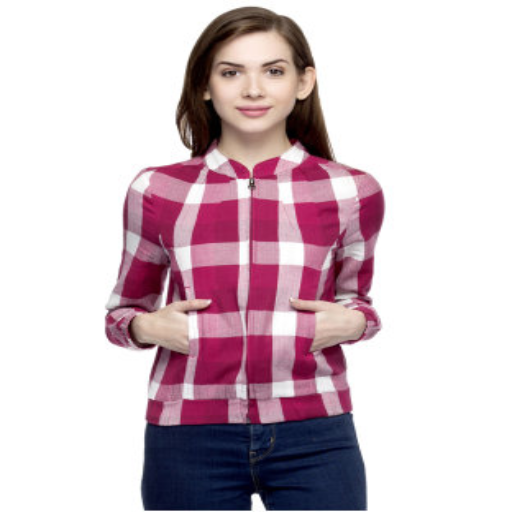

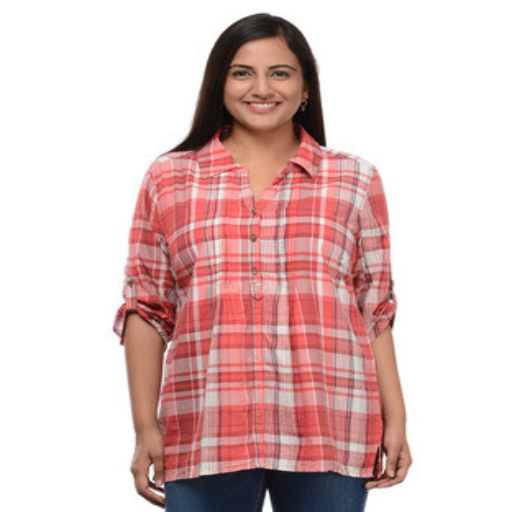

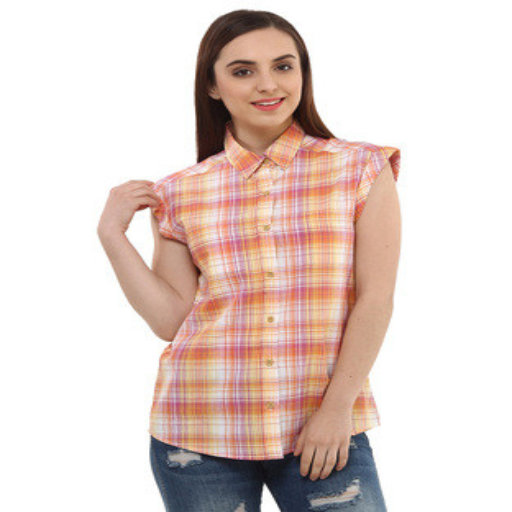

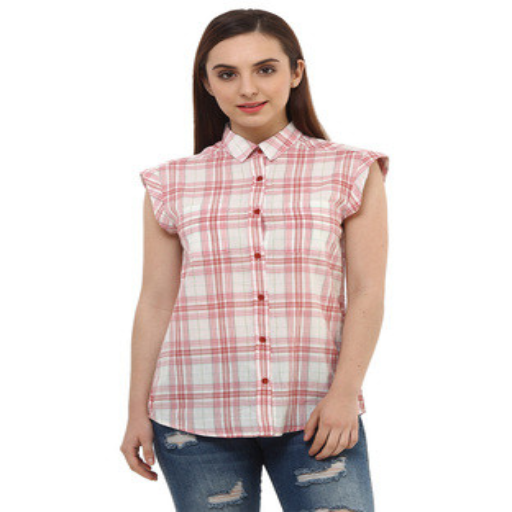

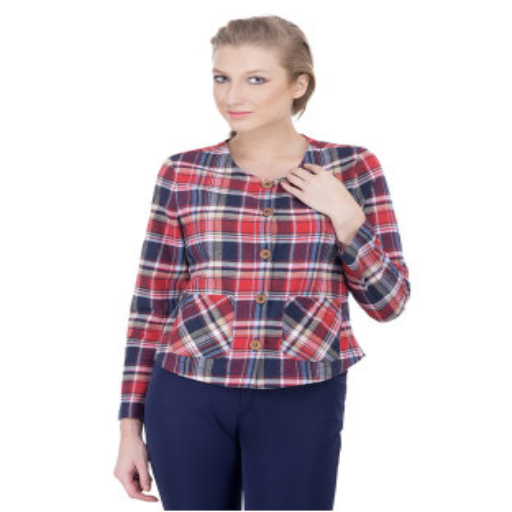

In [69]:
from google.colab.patches import cv2_imshow

for file in indices[0]:
  temp_img=cv2.imread(filenames[file])
  cv2_imshow(cv2.resize(temp_img, (512,512)))
  cv2.waitKey(0)

**To Test the Model for a Floral Pattern dress**

In [71]:
img=image.load_img('floral.jpg',target_size=(224,224,3))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step


In [72]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [73]:
neighbors.fit(feature_list)
distances,indices=neighbors.kneighbors([normalized_result])

In [74]:
print(indices)

[[  8 344 230 327 149]]


In [75]:
for filename in indices[0]:
  print(filenames[filename])

basicpattern_3800/floral/imgg_119.jpg
basicpattern_3800/floral/imgg_64.jpg
basicpattern_3800/floral/imgg_217.jpg
basicpattern_3800/floral/imgg_28 (2).jpg
basicpattern_3800/floral/imgg_150.jpg


**Displaying The Model Prediction Result**

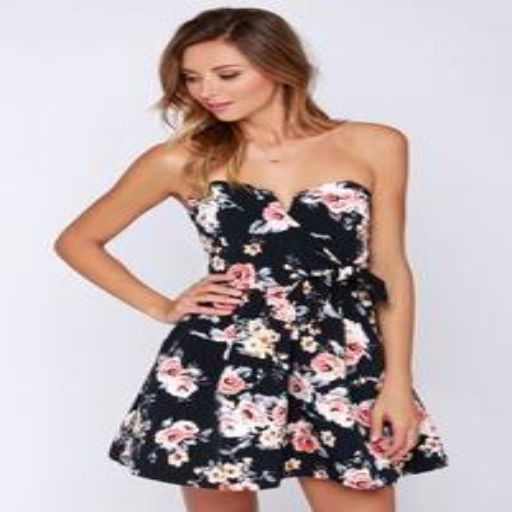

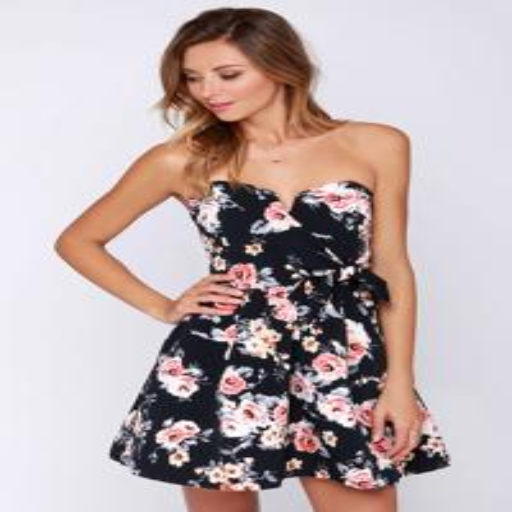

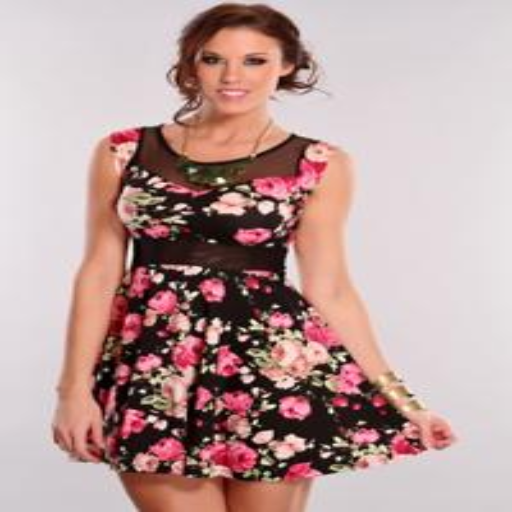

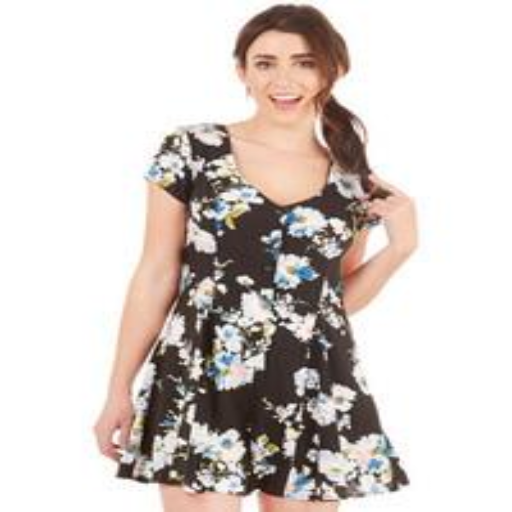

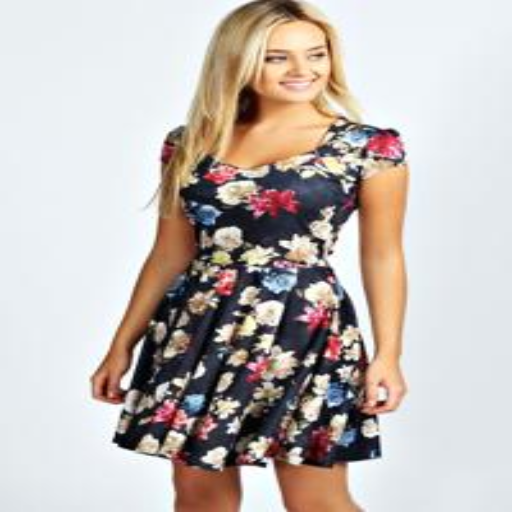

In [76]:
from google.colab.patches import cv2_imshow

for file in indices[0]:
  temp_img=cv2.imread(filenames[file])
  cv2_imshow(cv2.resize(temp_img, (512,512)))
  cv2.waitKey(0)

**To Test the Model for a Polka Dot Pattern dress**

In [77]:
img=image.load_img('polka.jpg',target_size=(224,224,3))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 425ms/step


In [78]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [79]:
neighbors.fit(feature_list)
distances,indices=neighbors.kneighbors([normalized_result])

In [80]:
print(indices)

[[ 929 1724 3104  271 1022]]


In [82]:
for filename in indices[0]:
  print(filenames[filename])

basicpattern_3800/polka dots/imgg_39.jpg
basicpattern_3800/heart/jmgg_17.jpg
basicpattern_3800/paisley/imgg_214.jpg
basicpattern_3800/floral/imgg_132.jpg
basicpattern_3800/polka dots/imgg_4 (2).jpg


**Displaying The Model Prediction Result**

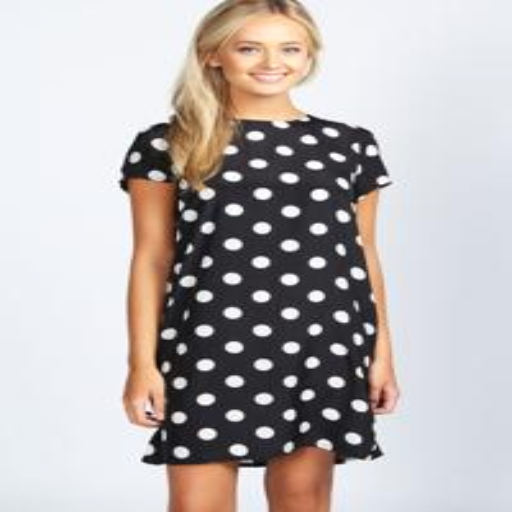

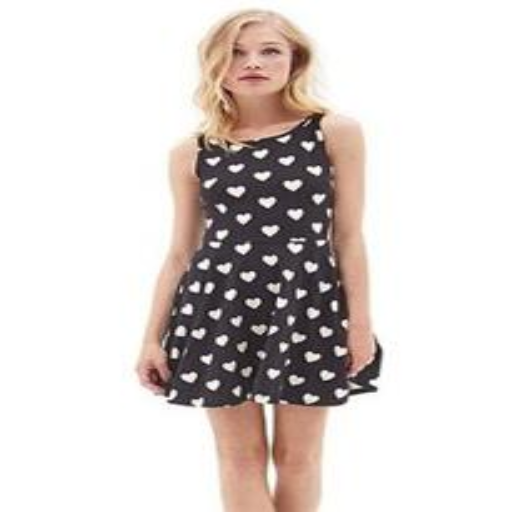

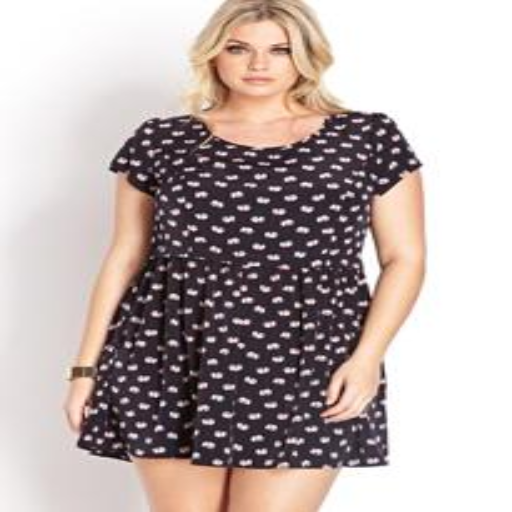

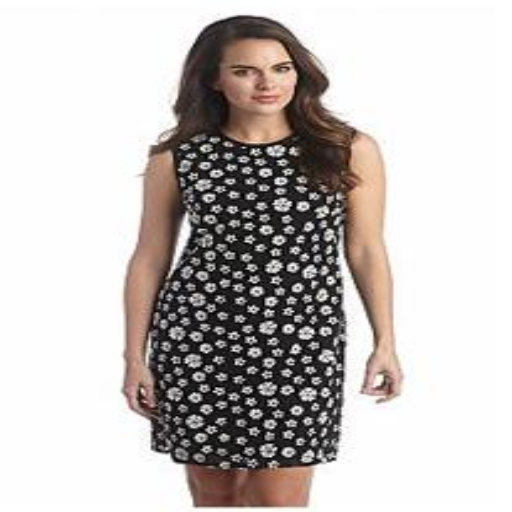

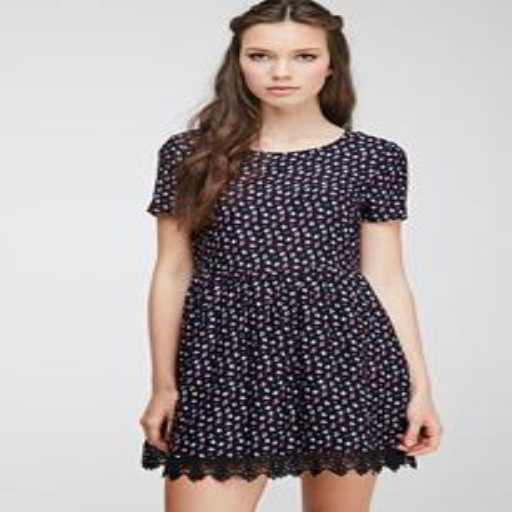

In [83]:
from google.colab.patches import cv2_imshow

for file in indices[0]:
  temp_img=cv2.imread(filenames[file])
  cv2_imshow(cv2.resize(temp_img, (512,512)))
  cv2.waitKey(0)

**To Test the Model for a  Halter Neck  dress**

In [84]:
img=image.load_img('halter_neck.jpg',target_size=(224,224,3))
img_array=image.img_to_array(img)
expanded_img_array=np.expand_dims(img_array,axis=0)
preprocessed_img=preprocess_input(expanded_img_array)
result=model.predict(preprocessed_img).flatten()
normalized_result=result/norm(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [85]:
neighbors=NearestNeighbors(n_neighbors=5,algorithm='brute',metric='euclidean')

In [86]:
neighbors.fit(feature_list)
distances,indices=neighbors.kneighbors([normalized_result])

In [87]:
print(indices)

[[3645 3192  141 3787 3568]]


In [88]:
for filename in indices[0]:
  print(filenames[filename])

basicpattern_3800/leaf/imgg_18.jpg
basicpattern_3800/paisley/imgg_58.jpg
basicpattern_3800/floral/imgg_54.jpg
basicpattern_3800/leaf/imgg_13 (2).jpg
basicpattern_3800/leaf/jmgg_24.jpg


**Displaying The Model Prediction Result**

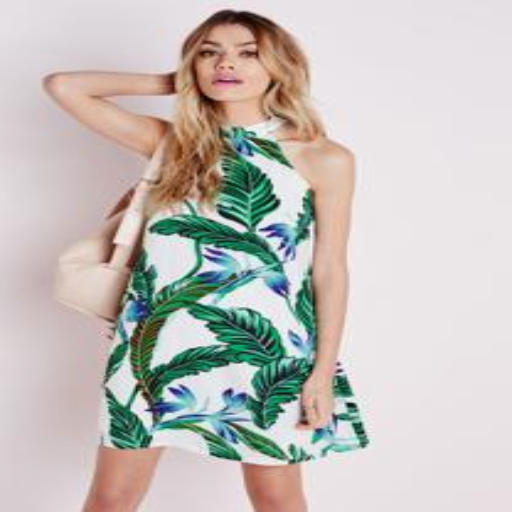

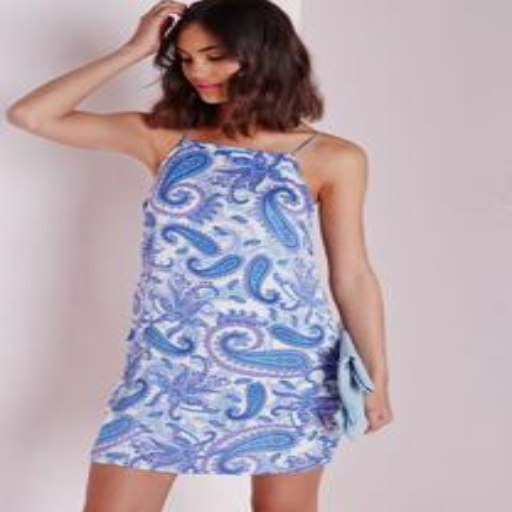

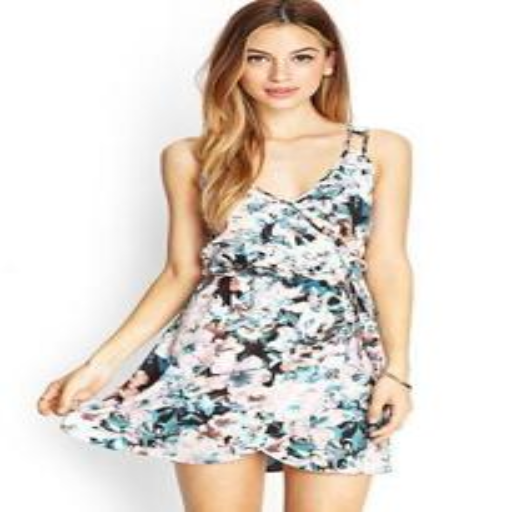

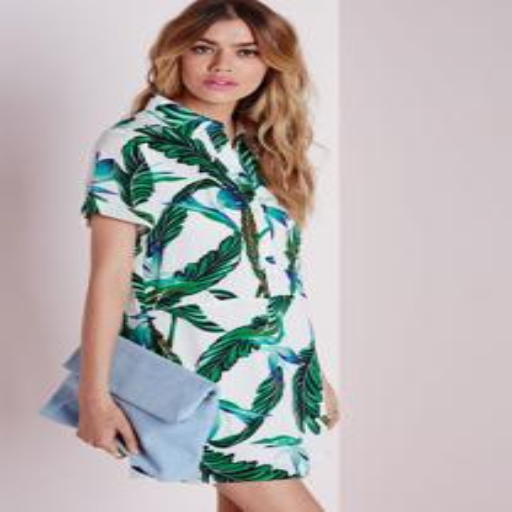

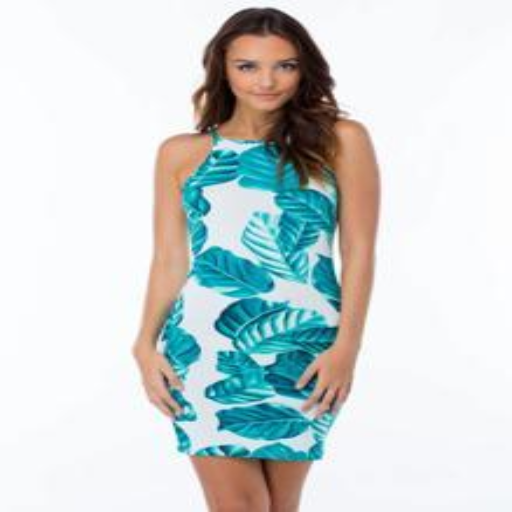

In [89]:
from google.colab.patches import cv2_imshow

for file in indices[0]:
  temp_img=cv2.imread(filenames[file])
  cv2_imshow(cv2.resize(temp_img, (512,512)))
  cv2.waitKey(0)

**Conclusion**

The Women’s Clothing Recommender System effectively utilizes Convolutional Neural Networks (CNN) for image feature extraction and similarity-based recommendation. By employing transfer learning with pre-trained models such as ResNet50, the system efficiently captures detailed visual patterns and fabric characteristics from clothing images. These extracted features are then used to compute similarity scores, enabling accurate and visually coherent outfit recommendations. Overall, the project demonstrates the potential of deep learning and computer vision techniques in building intelligent, data-driven fashion recommendation systems.